In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Model import *

In [3]:
model = Model.Initialize('vae', None, pretrained_path='./Models/vae.pt')

Loading the pretrained model...


In [4]:
# sys.path.insert(0, "../Code/")
# from load_scvis import load_vae

path = './ELDR/Housing/Data/'


data_file = path + 'X.tsv'
target_file = path + 'y.tsv'
input_dim = 13
#model_file = "Model/model/perplexity_10_regularizer_0.001_batch_size_505_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_3000.ckpt"
num_clusters = 6

x = pd.read_csv(data_file, sep="\t").values
y = pd.read_csv(target_file, sep="\t").values



data_rep = model.Encode(x)

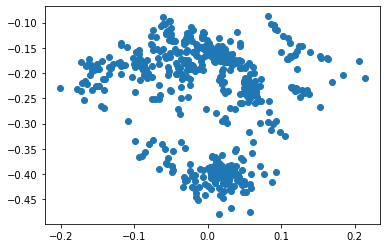

In [5]:
plt.scatter(data_rep[:,0], data_rep[:,1])

In [6]:
from sklearn.cluster import KMeans
num_clusters = 6

# rep = model.Encode(x)
kmeans = KMeans(n_clusters = num_clusters).fit(data_rep)

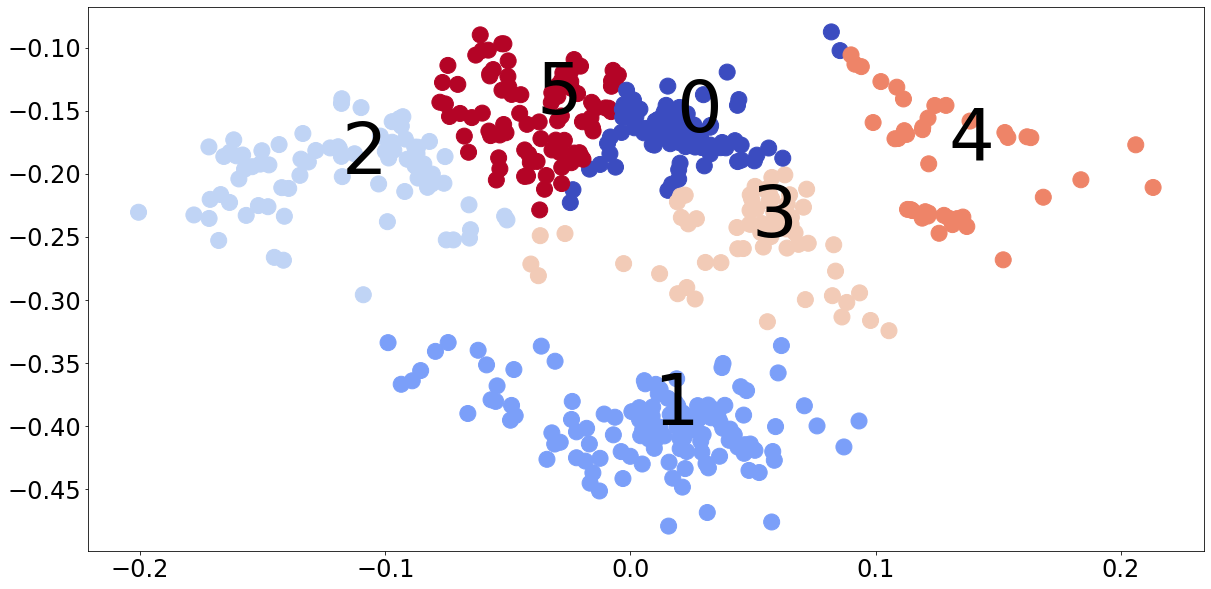

In [7]:
from eldr.plotter.myplot import *
means, centers, indices = plot_groups(x, data_rep.numpy(), num_clusters, kmeans.labels_, name = "./synth-rep.png")

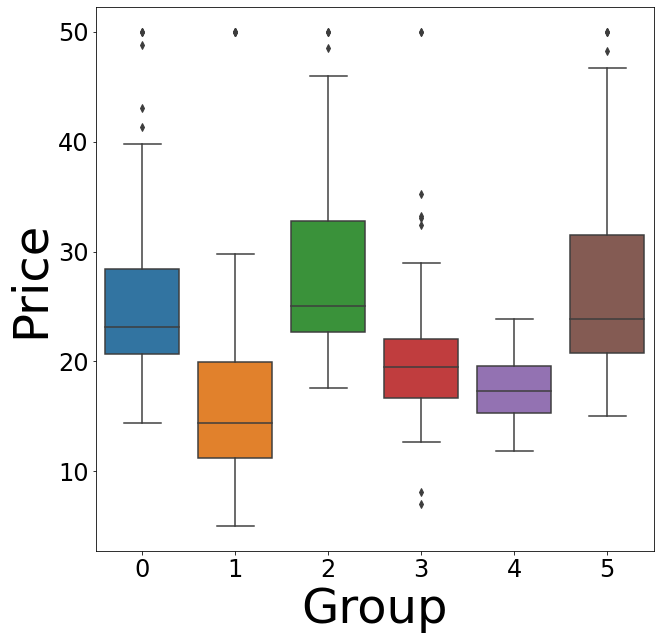

In [8]:
# See what signal is enocded in the clusters
import matplotlib.pyplot as plt
import seaborn as sns

labels = kmeans.labels_

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax = ax, x = labels, y = np.squeeze(y))
ax.set(xlabel = "Group", ylabel = "Price")
ax.get_figure().savefig("housing-labels.png")


In [9]:
from eldr.explain.explain_cs import *
epsilon = 0.05

Explainer = Explain(model, means, centers)

if True:
    Explainer.eval_epsilon(torch.tensor(x), indices, epsilon)
    

In [10]:
with open('./epsilon.txt', 'r') as f:
    e = f.readlines()
    print(e)

['1.0 1.0 1.0']


In [10]:
run = True

# Initialize results 
# Columns are:  K, TGT-correctness, TGT-coverage, DBM-correctness, DBM-coverage
K = [1, 3, 5, 7, 9, 11, 13]
if run:
    os.system("rm *.npy")
    os.system("rm out.csv")
    
    out = np.zeros((len(K), 5))

    c = 0
    for k in K:
        out[c, 0] = k
        c += 1

In [11]:
import os
import json
from types import SimpleNamespace
best_val = 0.0
ntrials = 1
lg = 1.5
config = SimpleNamespace(**json.load(open('./configs/tgt.json', 'r')))


if run:
    c = 0
    for k in K:

        best_val = 0.0
        for lg in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
            for trial in range(5):
                config.learning_rate = 0.01
                config.lambda_global = lg
                config.consecutive_steps = 5
                print(config)
                Explainer = Explain(model, means, centers)
                deltas, _ = Explainer.explain(config)
                a, b = Explainer.metrics(x, indices, deltas, epsilon, k = k) 

                val = np.mean(a)

                if val > best_val:
                    best_val = val
                    out[c, 1] = best_val
                    out[c, 2] = np.mean(b)
                    np.save("deltas" + str(k) + ".npy", deltas)

                os.system("rm -rf explanation")
        c += 1

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.024575810879468918, initial 1, target 3
Retrieving the best deltas...
iter: 5, ema: 0.024460320036526283, initial 3, target 5
Retrieving the best deltas...
iter: 6, ema: 0.024354153839058285, initial 3, target 5
Retr

Retrieving the best deltas...
iter: 1169, ema: 0.013187665492304292, initial 4, target 3
Retrieving the best deltas...
iter: 1198, ema: 0.013077184049623717, initial 0, target 5
Retrieving the best deltas...
iter: 1199, ema: 0.012970752678517635, initial 0, target 5
Retrieving the best deltas...
iter: 1201, ema: 0.012846428060396287, initial 3, target 5
Retrieving the best deltas...
iter: 1203, ema: 0.012723943643472475, initial 3, target 5
Retrieving the best deltas...
iter: 1505, ema: 0.0126123203609001, initial 3, target 1
Retrieving the best deltas...
iter: 1507, ema: 0.012486062938383245, initial 3, target 1
Retrieving the best deltas...
iter: 1509, ema: 0.01236135640913347, initial 3, target 1
Retrieving the best deltas...
iter: 1517, ema: 0.012241370513524858, initial 3, target 1
Retrieving the best deltas...
iter: 1519, ema: 0.012117904504326453, initial 3, target 1
Retrieving the best deltas...
iter: 1521, ema: 0.011922169306139636, initial 4, target 3
Retrieving the best delt

Retrieving the best deltas...
iter: 4861, ema: 0.0016918305152110443, initial 5, target 2
Retrieving the best deltas...
iter: 5143, ema: 0.0015853403450389802, initial 2, target 0
Retrieving the best deltas...
iter: 5508, ema: 0.0014844311483268734, initial 3, target 4
Retrieving the best deltas...
iter: 5664, ema: 0.0013740109388577146, initial 1, target 3
Retrieving the best deltas...
iter: 5814, ema: 0.0012732085118324923, initial 2, target 5
Retrieving the best deltas...
iter: 6437, ema: 0.0011720243009261328, initial 5, target 0
Retrieving the best deltas...
iter: 6664, ema: 0.0010706412905443197, initial 3, target 4
Retrieving the best deltas...
iter: 6688, ema: 0.0009640338583846153, initial 2, target 5
Retrieving the best deltas...
iter: 6752, ema: 0.0008617663813394943, initial 4, target 3
Retrieving the best deltas...
iter: 6817, ema: 0.0007554792497842716, initial 4, target 3
Retrieving the best deltas...
iter: 8082, ema: 0.0006525683296874763, initial 4, target 3
Retrieving

Retrieving the best deltas...
iter: 101, ema: 0.03549372613856099, initial 4, target 3
Retrieving the best deltas...
iter: 102, ema: 0.03522105819743984, initial 4, target 3
Retrieving the best deltas...
iter: 103, ema: 0.034950793189376515, initial 4, target 3
Retrieving the best deltas...
iter: 104, ema: 0.03468291063337944, initial 4, target 3
Retrieving the best deltas...
iter: 133, ema: 0.03427014617824273, initial 5, target 0
Retrieving the best deltas...
iter: 134, ema: 0.033954926448418986, initial 5, target 0
Retrieving the best deltas...
iter: 152, ema: 0.03384073733812749, initial 5, target 3
Retrieving the best deltas...
iter: 153, ema: 0.03366289498712537, initial 5, target 3
Retrieving the best deltas...
iter: 154, ema: 0.03348645819532731, initial 5, target 3
Retrieving the best deltas...
iter: 179, ema: 0.033201853837920174, initial 5, target 0
Retrieving the best deltas...
iter: 206, ema: 0.03301405563377044, initial 3, target 0
Retrieving the best deltas...
iter: 207,

Retrieving the best deltas...
iter: 485, ema: 0.018082662893097613, initial 5, target 2
Retrieving the best deltas...
iter: 486, ema: 0.017970380902509794, initial 5, target 2
Retrieving the best deltas...
iter: 487, ema: 0.01785897673345476, initial 5, target 2
Retrieving the best deltas...
iter: 488, ema: 0.017748442431937666, initial 5, target 2
Retrieving the best deltas...
iter: 489, ema: 0.017638770235262315, initial 5, target 2
Retrieving the best deltas...
iter: 490, ema: 0.017530541636303246, initial 4, target 0
Retrieving the best deltas...
iter: 491, ema: 0.017423147726570696, initial 4, target 0
Retrieving the best deltas...
iter: 492, ema: 0.017316597141839543, initial 4, target 0
Retrieving the best deltas...
iter: 493, ema: 0.017210882328959606, initial 4, target 0
Retrieving the best deltas...
iter: 494, ema: 0.017105995735806404, initial 4, target 0
Retrieving the best deltas...
iter: 495, ema: 0.01698440996191835, initial 2, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 2655, ema: 0.005767312190617015, initial 4, target 3
Retrieving the best deltas...
iter: 2657, ema: 0.005663637912012918, initial 4, target 3
Retrieving the best deltas...
iter: 2659, ema: 0.0055619432487693694, initial 4, target 3
Retrieving the best deltas...
iter: 2667, ema: 0.005456592394179698, initial 1, target 3
Retrieving the best deltas...
iter: 2726, ema: 0.005348017179894485, initial 4, target 3
Retrieving the best deltas...
iter: 2729, ema: 0.005205244242423415, initial 4, target 3
Retrieving the best deltas...
iter: 2885, ema: 0.005087566218464147, initial 5, target 0
Retrieving the best deltas...
iter: 2888, ema: 0.004956499693048909, initial 5, target 0
Retrieving the best deltas...
iter: 2891, ema: 0.004838016564321105, initial 5, target 2
Retrieving the best deltas...
iter: 2894, ema: 0.004727066581056901, initial 5, target 2
Retrieving the best deltas...
iter: 2901, ema: 0.004619842396872837, initial 5, target 0
Retrieving the best 

Retrieving the best deltas...
iter: 683, ema: 0.016671414171405777, initial 0, target 3
Retrieving the best deltas...
iter: 1015, ema: 0.016530909301167934, initial 2, target 5
Retrieving the best deltas...
iter: 1016, ema: 0.01639353163853332, initial 2, target 5
Retrieving the best deltas...
iter: 1017, ema: 0.01625742256429686, initial 2, target 5
Retrieving the best deltas...
iter: 1018, ema: 0.01612256976976022, initial 2, target 5
Retrieving the best deltas...
iter: 1019, ema: 0.01598896111587817, initial 2, target 5
Retrieving the best deltas...
iter: 1046, ema: 0.015766598667460937, initial 3, target 4
Retrieving the best deltas...
iter: 1047, ema: 0.01563763418454744, initial 3, target 4
Retrieving the best deltas...
iter: 1048, ema: 0.015509832663309867, initial 3, target 4
Retrieving the best deltas...
iter: 1049, ema: 0.015383183023611776, initial 3, target 4
Retrieving the best deltas...
iter: 1077, ema: 0.015235052098295659, initial 5, target 3
Retrieving the best deltas.

Retrieving the best deltas...
iter: 3140, ema: 0.004383661041749503, initial 4, target 3
Retrieving the best deltas...
iter: 3143, ema: 0.0042557440502139, initial 4, target 3
Retrieving the best deltas...
iter: 3151, ema: 0.004154403031824972, initial 4, target 3
Retrieving the best deltas...
iter: 3154, ema: 0.004033243685837236, initial 4, target 3
Retrieving the best deltas...
iter: 3161, ema: 0.003916196159059106, initial 3, target 0
Retrieving the best deltas...
iter: 3328, ema: 0.003808129463962913, initial 3, target 5
Retrieving the best deltas...
iter: 3332, ema: 0.0036821732945594558, initial 2, target 5
Retrieving the best deltas...
iter: 3669, ema: 0.0035669077070372727, initial 2, target 5
Retrieving the best deltas...
iter: 3838, ema: 0.0034616072104973012, initial 5, target 2
Retrieving the best deltas...
iter: 3846, ema: 0.003348388814975083, initial 3, target 0
Retrieving the best deltas...
iter: 4025, ema: 0.0032372977984832176, initial 0, target 4
Retrieving the best

Retrieving the best deltas...
iter: 70, ema: 0.03827539611341317, initial 0, target 5
Retrieving the best deltas...
iter: 71, ema: 0.03792667388056161, initial 0, target 5
Retrieving the best deltas...
iter: 72, ema: 0.03758133696705076, initial 0, target 5
Retrieving the best deltas...
iter: 73, ema: 0.03723935187591809, initial 0, target 5
Retrieving the best deltas...
iter: 74, ema: 0.03690068539860458, initial 0, target 5
Retrieving the best deltas...
iter: 75, ema: 0.03664311912309413, initial 3, target 4
Retrieving the best deltas...
iter: 76, ema: 0.03638760874852311, initial 3, target 4
Retrieving the best deltas...
iter: 77, ema: 0.03613409149902983, initial 3, target 4
Retrieving the best deltas...
iter: 78, ema: 0.03588255021870478, initial 3, target 4
Retrieving the best deltas...
iter: 79, ema: 0.03563296809083562, initial 3, target 4
Retrieving the best deltas...
iter: 81, ema: 0.03546245717662863, initial 5, target 4
Retrieving the best deltas...
iter: 83, ema: 0.0352925

Retrieving the best deltas...
iter: 826, ema: 0.0180042313679346, initial 3, target 0
Retrieving the best deltas...
iter: 827, ema: 0.017869656580907174, initial 3, target 0
Retrieving the best deltas...
iter: 828, ema: 0.017736285491774327, initial 3, target 0
Retrieving the best deltas...
iter: 829, ema: 0.017604106561814693, initial 3, target 0
Retrieving the best deltas...
iter: 831, ema: 0.017415941794710947, initial 0, target 4
Retrieving the best deltas...
iter: 833, ema: 0.017230654449905347, initial 0, target 4
Retrieving the best deltas...
iter: 835, ema: 0.017114979572253077, initial 3, target 2
Retrieving the best deltas...
iter: 840, ema: 0.016898724866761337, initial 5, target 2
Retrieving the best deltas...
iter: 841, ema: 0.0167814513483023, initial 5, target 2
Retrieving the best deltas...
iter: 842, ema: 0.016665157432008942, initial 5, target 2
Retrieving the best deltas...
iter: 843, ema: 0.01654983402035154, initial 5, target 2
Retrieving the best deltas...
iter: 8

Retrieving the best deltas...
iter: 2162, ema: 0.005880382552156743, initial 4, target 0
Retrieving the best deltas...
iter: 2479, ema: 0.005763694229755438, initial 0, target 5
Retrieving the best deltas...
iter: 2487, ema: 0.00563495422101759, initial 3, target 4
Retrieving the best deltas...
iter: 2490, ema: 0.005502542982569521, initial 3, target 4
Retrieving the best deltas...
iter: 2493, ema: 0.005373628732449519, initial 3, target 4
Retrieving the best deltas...
iter: 2502, ema: 0.005256649837261441, initial 0, target 5
Retrieving the best deltas...
iter: 2506, ema: 0.005144158730764652, initial 1, target 3
Retrieving the best deltas...
iter: 2512, ema: 0.005036575431799383, initial 4, target 1
Retrieving the best deltas...
iter: 2525, ema: 0.004917574869741536, initial 5, target 0
Retrieving the best deltas...
iter: 2528, ema: 0.00480159061085906, initial 5, target 0
Retrieving the best deltas...
iter: 2533, ema: 0.004697769890537449, initial 3, target 1
Retrieving the best del

Retrieving the best deltas...
iter: 504, ema: 0.02207148181325364, initial 5, target 0
Retrieving the best deltas...
iter: 505, ema: 0.02189820393839882, initial 3, target 0
Retrieving the best deltas...
iter: 506, ema: 0.021726509695638836, initial 3, target 0
Retrieving the best deltas...
iter: 507, ema: 0.021556383760880156, initial 3, target 0
Retrieving the best deltas...
iter: 508, ema: 0.02138781090739083, initial 3, target 0
Retrieving the best deltas...
iter: 509, ema: 0.021220776125898805, initial 3, target 0
Retrieving the best deltas...
iter: 532, ema: 0.021120143563295373, initial 1, target 3
Retrieving the best deltas...
iter: 535, ema: 0.02083901616151366, initial 0, target 5
Retrieving the best deltas...
iter: 536, ema: 0.02065528555204427, initial 0, target 5
Retrieving the best deltas...
iter: 537, ema: 0.020473319398289485, initial 0, target 5
Retrieving the best deltas...
iter: 538, ema: 0.020293100309477556, initial 0, target 5
Retrieving the best deltas...
iter: 5

Retrieving the best deltas...
iter: 1849, ema: 0.008502428511557051, initial 0, target 5
Retrieving the best deltas...
iter: 1864, ema: 0.008387049499130238, initial 5, target 2
Retrieving the best deltas...
iter: 1867, ema: 0.008276899700558728, initial 1, target 3
Retrieving the best deltas...
iter: 1870, ema: 0.008176746661295439, initial 2, target 0
Retrieving the best deltas...
iter: 1874, ema: 0.008066338452553749, initial 2, target 0
Retrieving the best deltas...
iter: 1878, ema: 0.007957088573581328, initial 2, target 0
Retrieving the best deltas...
iter: 1967, ema: 0.007821084125937829, initial 0, target 4
Retrieving the best deltas...
iter: 1970, ema: 0.007665432231954344, initial 5, target 0
Retrieving the best deltas...
iter: 1972, ema: 0.0075287445230767655, initial 5, target 0
Retrieving the best deltas...
iter: 1974, ema: 0.007394675095658379, initial 5, target 0
Retrieving the best deltas...
iter: 1976, ema: 0.0072845337978239355, initial 3, target 4
Retrieving the best

Retrieving the best deltas...
iter: 36, ema: 0.050468277685154626, initial 2, target 3
Retrieving the best deltas...
iter: 37, ema: 0.05026292222592836, initial 2, target 3
Retrieving the best deltas...
iter: 38, ema: 0.0500592102413383, initial 2, target 3
Retrieving the best deltas...
iter: 39, ema: 0.04985766298641332, initial 2, target 3
Retrieving the best deltas...
iter: 40, ema: 0.049529365501789976, initial 5, target 3
Retrieving the best deltas...
iter: 41, ema: 0.04920429747821772, initial 5, target 3
Retrieving the best deltas...
iter: 42, ema: 0.04888250772065585, initial 5, target 3
Retrieving the best deltas...
iter: 43, ema: 0.04856386170876621, initial 5, target 3
Retrieving the best deltas...
iter: 44, ema: 0.048248588365631034, initial 5, target 3
Retrieving the best deltas...
iter: 54, ema: 0.04798602840697929, initial 4, target 5
Retrieving the best deltas...
iter: 55, ema: 0.047542473742778875, initial 0, target 5
Retrieving the best deltas...
iter: 56, ema: 0.0471

Retrieving the best deltas...
iter: 926, ema: 0.024709924341950316, initial 0, target 2
Retrieving the best deltas...
iter: 929, ema: 0.024577653629295357, initial 0, target 2
Retrieving the best deltas...
iter: 973, ema: 0.024453430889107335, initial 2, target 5
Retrieving the best deltas...
iter: 974, ema: 0.024293253124755592, initial 2, target 5
Retrieving the best deltas...
iter: 975, ema: 0.024151621043549926, initial 5, target 2
Retrieving the best deltas...
iter: 976, ema: 0.024011408701110164, initial 5, target 2
Retrieving the best deltas...
iter: 977, ema: 0.023872443184055483, initial 5, target 2
Retrieving the best deltas...
iter: 978, ema: 0.023735010447824615, initial 5, target 2
Retrieving the best deltas...
iter: 979, ema: 0.023598925095793973, initial 5, target 2
Retrieving the best deltas...
iter: 1908, ema: 0.023497406474088853, initial 5, target 2
Retrieving the best deltas...
iter: 1909, ema: 0.02336500933942385, initial 5, target 2
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 60, ema: 0.04626331633643089, initial 1, target 3
Retrieving the best deltas...
iter: 61, ema: 0.04604709853482862, initial 1, target 3
Retrieving the best deltas...
iter: 62, ema: 0.0458330137980987, initial 1, target 3
Retrieving the best deltas...
iter: 63, ema: 0.045621152647433605, initial 1, target 3
Retrieving the best deltas...
iter: 64, ema: 0.045411192178792706, initial 1, target 3
Retrieving the best deltas...
iter: 65, ema: 0.0451274372980657, initial 5, target 3
Retrieving the best deltas...
iter: 66, ema: 0.04484640243323705, initial 5, target 3
Retrieving the best deltas...
iter: 67, ema: 0.04456794842054785, initial 5, target 3
Retrieving the best deltas...
iter: 68, ema: 0.044292735649949684, initial 5, target 3
Retrieving the best deltas...
iter: 69, ema: 0.044019874035436224, initial 5, target 3
Retrieving the best deltas...
iter: 70, ema: 0.04367062605979753, initial 4, target 3
Retrieving the best deltas...
iter: 71, ema: 0.04332

Retrieving the best deltas...
iter: 683, ema: 0.02360630127281416, initial 4, target 0
Retrieving the best deltas...
iter: 684, ema: 0.023486995340044933, initial 4, target 0
Retrieving the best deltas...
iter: 685, ema: 0.023354047811154605, initial 5, target 2
Retrieving the best deltas...
iter: 686, ema: 0.023221777747931917, initial 5, target 2
Retrieving the best deltas...
iter: 687, ema: 0.0230908247229002, initial 5, target 2
Retrieving the best deltas...
iter: 688, ema: 0.022961154052126075, initial 5, target 2
Retrieving the best deltas...
iter: 689, ema: 0.022832699379645376, initial 5, target 2
Retrieving the best deltas...
iter: 739, ema: 0.022719205133787102, initial 0, target 5
Retrieving the best deltas...
iter: 740, ema: 0.02259348653497258, initial 5, target 2
Retrieving the best deltas...
iter: 741, ema: 0.02246912722304006, initial 5, target 2
Retrieving the best deltas...
iter: 742, ema: 0.022345775320821944, initial 5, target 2
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 125, ema: 0.03346304020538823, initial 0, target 2
Retrieving the best deltas...
iter: 126, ema: 0.033336442754093275, initial 0, target 2
Retrieving the best deltas...
iter: 127, ema: 0.03321109069508237, initial 0, target 2
Retrieving the best deltas...
iter: 128, ema: 0.0330866528944741, initial 0, target 2
Retrieving the best deltas...
iter: 129, ema: 0.0329638212348128, initial 0, target 2
Retrieving the best deltas...
iter: 130, ema: 0.03267020078915269, initial 0, target 5
Retrieving the best deltas...
iter: 131, ema: 0.03237988934473427, initial 0, target 5
Retrieving the best deltas...
iter: 132, ema: 0.032092061300271944, initial 0, target 5
Retrieving the best deltas...
iter: 133, ema: 0.031807352429823084, initial 0, target 5
Retrieving the best deltas...
iter: 134, ema: 0.03152537947610298, initial 0, target 5
Retrieving the best deltas...
iter: 135, ema: 0.03132697672243542, initial 4, target 0
Retrieving the best deltas...
iter: 136, e

Retrieving the best deltas...
iter: 65, ema: 0.050560359389455786, initial 5, target 4
Retrieving the best deltas...
iter: 66, ema: 0.05033669625204101, initial 5, target 4
Retrieving the best deltas...
iter: 67, ema: 0.05011464933615409, initial 5, target 4
Retrieving the best deltas...
iter: 68, ema: 0.04989485278488068, initial 5, target 4
Retrieving the best deltas...
iter: 69, ema: 0.04967777166056891, initial 5, target 4
Retrieving the best deltas...
iter: 70, ema: 0.04929891999207812, initial 4, target 0
Retrieving the best deltas...
iter: 71, ema: 0.048926846115653205, initial 4, target 0
Retrieving the best deltas...
iter: 72, ema: 0.04855608790263617, initial 4, target 0
Retrieving the best deltas...
iter: 73, ema: 0.04819050841682785, initial 4, target 0
Retrieving the best deltas...
iter: 74, ema: 0.047827973377799954, initial 4, target 0
Retrieving the best deltas...
iter: 75, ema: 0.04738745113524919, initial 0, target 5
Retrieving the best deltas...
iter: 76, ema: 0.0469

Retrieving the best deltas...
iter: 643, ema: 0.02572363536755626, initial 4, target 3
Retrieving the best deltas...
iter: 644, ema: 0.02555934237118444, initial 4, target 3
Retrieving the best deltas...
iter: 651, ema: 0.025413789089514704, initial 5, target 3
Retrieving the best deltas...
iter: 653, ema: 0.02525232521958412, initial 5, target 3
Retrieving the best deltas...
iter: 836, ema: 0.024966003633577386, initial 5, target 0
Retrieving the best deltas...
iter: 837, ema: 0.024749291845795635, initial 5, target 0
Retrieving the best deltas...
iter: 838, ema: 0.024535136769079417, initial 5, target 0
Retrieving the best deltas...
iter: 839, ema: 0.024323351342655338, initial 5, target 0
Retrieving the best deltas...
iter: 840, ema: 0.024119019231378134, initial 0, target 5
Retrieving the best deltas...
iter: 841, ema: 0.023916945970212225, initial 0, target 5
Retrieving the best deltas...
iter: 842, ema: 0.0237166635330389, initial 0, target 5
Retrieving the best deltas...
iter: 8

Retrieving the best deltas...
iter: 164, ema: 0.039420031419665345, initial 2, target 0
Retrieving the best deltas...
iter: 165, ema: 0.03923629048681063, initial 0, target 2
Retrieving the best deltas...
iter: 166, ema: 0.039056310870832646, initial 0, target 2
Retrieving the best deltas...
iter: 167, ema: 0.03887662135849454, initial 0, target 2
Retrieving the best deltas...
iter: 168, ema: 0.03869912170352695, initial 0, target 2
Retrieving the best deltas...
iter: 169, ema: 0.038523584687981366, initial 0, target 2
Retrieving the best deltas...
iter: 170, ema: 0.038252169554114965, initial 3, target 4
Retrieving the best deltas...
iter: 171, ema: 0.03798361953897657, initial 3, target 4
Retrieving the best deltas...
iter: 172, ema: 0.037718766319233654, initial 3, target 4
Retrieving the best deltas...
iter: 173, ema: 0.03745482520868748, initial 3, target 4
Retrieving the best deltas...
iter: 174, ema: 0.037195116368872586, initial 3, target 4
Retrieving the best deltas...
iter: 1

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.019143598154187202, initial 2, target 0
Retrieving the best deltas...
iter: 6, ema: 0.019029377161426848, initial 0, target 4
Retrieving the best deltas...
iter: 8, ema: 0.018913161661430082, initial 0, target 4
Retr

Retrieving the best deltas...
iter: 25, ema: 0.05125991405240447, initial 0, target 5
Retrieving the best deltas...
iter: 26, ema: 0.05078341135437124, initial 0, target 5
Retrieving the best deltas...
iter: 27, ema: 0.05032686090024098, initial 0, target 5
Retrieving the best deltas...
iter: 28, ema: 0.04986151033549275, initial 0, target 5
Retrieving the best deltas...
iter: 29, ema: 0.04941193690940418, initial 0, target 5
Retrieving the best deltas...
iter: 30, ema: 0.04920235433786344, initial 4, target 5
Retrieving the best deltas...
iter: 31, ema: 0.04899705901268263, initial 4, target 5
Retrieving the best deltas...
iter: 32, ema: 0.04879317587219584, initial 4, target 5
Retrieving the best deltas...
iter: 33, ema: 0.048592260706393706, initial 4, target 5
Retrieving the best deltas...
iter: 34, ema: 0.048391674493192725, initial 4, target 5
Retrieving the best deltas...
iter: 35, ema: 0.04802919853326648, initial 4, target 0
Retrieving the best deltas...
iter: 36, ema: 0.04767

Retrieving the best deltas...
iter: 1104, ema: 0.027635716883225688, initial 4, target 0
Retrieving the best deltas...
iter: 1217, ema: 0.02744427566555742, initial 5, target 2
Retrieving the best deltas...
iter: 1218, ema: 0.02727781209664372, initial 5, target 2
Retrieving the best deltas...
iter: 1219, ema: 0.027113337440626415, initial 5, target 2
Retrieving the best deltas...
iter: 1234, ema: 0.026791258763228257, initial 5, target 0
Retrieving the best deltas...
iter: 1395, ema: 0.02665987710591912, initial 0, target 5
Retrieving the best deltas...
iter: 1396, ema: 0.026441281624708494, initial 0, target 5
Retrieving the best deltas...
iter: 1397, ema: 0.026215797603135985, initial 0, target 5
Retrieving the best deltas...
iter: 1398, ema: 0.026002145966185258, initial 0, target 5
Retrieving the best deltas...
iter: 1399, ema: 0.025782067884010766, initial 0, target 5
Retrieving the best deltas...
iter: 1401, ema: 0.025667482756640554, initial 2, target 0
Retrieving the best delt

Retrieving the best deltas...
iter: 59, ema: 0.025923106544690076, initial 0, target 4
Retrieving the best deltas...
iter: 869, ema: 0.025780000659299845, initial 5, target 0
Retrieving the best deltas...
iter: 949, ema: 0.025639687176278726, initial 0, target 5
Retrieving the best deltas...
iter: 2740, ema: 0.02544204689145339, initial 5, target 2
Retrieving the best deltas...
iter: 2741, ema: 0.025301613423197963, initial 5, target 2
Retrieving the best deltas...
iter: 2742, ema: 0.025164659052803916, initial 5, target 2
Retrieving the best deltas...
iter: 2743, ema: 0.025026753575148834, initial 5, target 2
Retrieving the best deltas...
iter: 2744, ema: 0.024892609158766493, initial 5, target 2
Retrieving the best deltas...
iter: 2971, ema: 0.024774467338691465, initial 3, target 4
Retrieving the best deltas...
iter: 2972, ema: 0.024651888293573867, initial 3, target 4
Retrieving the best deltas...
iter: 2973, ema: 0.02453244517219475, initial 3, target 4
Retrieving the best deltas.

Retrieving the best deltas...
iter: 1077, ema: 0.025887291223548766, initial 0, target 5
Retrieving the best deltas...
iter: 1078, ema: 0.02569585887140084, initial 0, target 5
Retrieving the best deltas...
iter: 1079, ema: 0.025489281155249358, initial 0, target 5
Retrieving the best deltas...
iter: 1080, ema: 0.025378092106138735, initial 0, target 4
Retrieving the best deltas...
iter: 1082, ema: 0.02517496144382513, initial 0, target 4
Retrieving the best deltas...
iter: 1084, ema: 0.024977207404680547, initial 0, target 4
Retrieving the best deltas...
iter: 1304, ema: 0.02473156002115802, initial 5, target 0
Retrieving the best deltas...
iter: 1305, ema: 0.02461752873268803, initial 4, target 0
Retrieving the best deltas...
iter: 1306, ema: 0.02451606608160843, initial 4, target 0
Retrieving the best deltas...
iter: 1307, ema: 0.02440762567953492, initial 4, target 0
Retrieving the best deltas...
iter: 1308, ema: 0.024305632590769358, initial 4, target 0
Retrieving the best deltas.

Retrieving the best deltas...
iter: 259, ema: 0.03661230510902642, initial 5, target 2
Retrieving the best deltas...
iter: 438, ema: 0.03632241204257322, initial 0, target 4
Retrieving the best deltas...
iter: 439, ema: 0.0361119145425832, initial 0, target 4
Retrieving the best deltas...
iter: 440, ema: 0.03591300647630781, initial 3, target 5
Retrieving the best deltas...
iter: 441, ema: 0.035717087079214505, initial 3, target 5
Retrieving the best deltas...
iter: 442, ema: 0.03552090868923682, initial 3, target 5
Retrieving the best deltas...
iter: 443, ema: 0.03532939690468591, initial 3, target 5
Retrieving the best deltas...
iter: 444, ema: 0.035136446116980934, initial 3, target 5
Retrieving the best deltas...
iter: 447, ema: 0.03499040696581276, initial 4, target 5
Retrieving the best deltas...
iter: 450, ema: 0.03483537471504032, initial 3, target 2
Retrieving the best deltas...
iter: 452, ema: 0.03470928220190525, initial 3, target 2
Retrieving the best deltas...
iter: 454, e

Retrieving the best deltas...
iter: 47, ema: 0.05034415265309904, initial 5, target 0
Retrieving the best deltas...
iter: 48, ema: 0.04989527876907799, initial 5, target 0
Retrieving the best deltas...
iter: 49, ema: 0.04944904842241974, initial 5, target 0
Retrieving the best deltas...
iter: 50, ema: 0.049014074321530536, initial 0, target 5
Retrieving the best deltas...
iter: 51, ema: 0.048582971406201866, initial 0, target 5
Retrieving the best deltas...
iter: 52, ema: 0.048156228004679724, initial 0, target 5
Retrieving the best deltas...
iter: 53, ema: 0.04773507819860954, initial 0, target 5
Retrieving the best deltas...
iter: 54, ema: 0.047315968251247016, initial 0, target 5
Retrieving the best deltas...
iter: 64, ema: 0.04701721009294092, initial 1, target 3
Retrieving the best deltas...
iter: 65, ema: 0.04684149514449736, initial 3, target 2
Retrieving the best deltas...
iter: 66, ema: 0.046652129973272186, initial 3, target 2
Retrieving the best deltas...
iter: 67, ema: 0.04

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.008151499554514885, initial 2, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 84, ema: 0.042099757104263086, initial 4, target 0
Retrieving the best deltas...
iter: 85, ema: 0.04186815711041682, initial 3, target 5
Retrieving the best deltas...
iter: 86, ema: 0.041619884976581624, initial 3, target 5
Retrieving the best deltas...
iter: 87, ema: 0.041375881188857086, initial 3, target 5
Retrieving the best deltas...
iter: 88, ema: 0.04113846484195198, initial 3, target 5
Retrieving the best deltas...
iter: 89, ema: 0.04089317699260806, initial 3, target 5
Retrieving the best deltas...
iter: 90, ema: 0.040612251710766774, initial 4, target 3
Retrieving the best deltas...
iter: 91, ema: 0.040332282163555895, initial 4, target 3
Retrieving the best deltas...
iter: 92, ema: 0.040049047818608005, initial 4, target 3
Retrieving the best deltas...
iter: 93, ema: 0.03977885385758544, initial 4, target 3
Retrieving the best deltas...
iter: 94, ema: 0.03949753892300324, initial 4, target 3
Retrieving the best deltas...
iter: 95, ema: 0.0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.02782767079770565, initial 4, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)


Retrieving the best deltas...
iter: 199, ema: 0.038674325505601376, initial 5, target 0
Retrieving the best deltas...
iter: 209, ema: 0.038532569296347775, initial 0, target 5
Retrieving the best deltas...
iter: 210, ema: 0.038317743583833976, initial 0, target 4
Retrieving the best deltas...
iter: 211, ema: 0.03814536238871281, initial 0, target 4
Retrieving the best deltas...
iter: 212, ema: 0.03792750229920588, initial 0, target 4
Retrieving the best deltas...
iter: 213, ema: 0.03776444448486751, initial 0, target 4
Retrieving the best deltas...
iter: 214, ema: 0.03755085523099927, initial 0, target 4
Retrieving the best deltas...
iter: 215, ema: 0.03738703521956519, initial 3, target 5
Retrieving the best deltas...
iter: 216, ema: 0.03722839241540254, initial 3, target 5
Retrieving the best deltas...
iter: 217, ema: 0.03704031943989458, initial 3, target 5
Retrieving the best deltas...
iter: 218, ema: 0.03688371602014239, initial 3, target 5
Retrieving the best deltas...
iter: 219,

Retrieving the best deltas...
iter: 28, ema: 0.05581417548157904, initial 0, target 5
Retrieving the best deltas...
iter: 29, ema: 0.05533091811535907, initial 0, target 5
Retrieving the best deltas...
iter: 37, ema: 0.05490507449394639, initial 3, target 4
Retrieving the best deltas...
iter: 38, ema: 0.054521459905100995, initial 3, target 4
Retrieving the best deltas...
iter: 39, ema: 0.0541578120063893, initial 3, target 4
Retrieving the best deltas...
iter: 47, ema: 0.05379327297375064, initial 5, target 2
Retrieving the best deltas...
iter: 48, ema: 0.05341347319199449, initial 5, target 2
Retrieving the best deltas...
iter: 49, ema: 0.05304590442221034, initial 5, target 2
Retrieving the best deltas...
iter: 50, ema: 0.05267258162455024, initial 3, target 4
Retrieving the best deltas...
iter: 51, ema: 0.05233359615285893, initial 3, target 4
Retrieving the best deltas...
iter: 52, ema: 0.05196602522372606, initial 3, target 4
Retrieving the best deltas...
iter: 53, ema: 0.0516331

Retrieving the best deltas...
iter: 367, ema: 0.03147899826473871, initial 4, target 3
Retrieving the best deltas...
iter: 368, ema: 0.031320362653889364, initial 4, target 3
Retrieving the best deltas...
iter: 369, ema: 0.031154292794955296, initial 4, target 3
Retrieving the best deltas...
iter: 382, ema: 0.03105040215212958, initial 5, target 0
Retrieving the best deltas...
iter: 383, ema: 0.03081319171780118, initial 5, target 0
Retrieving the best deltas...
iter: 384, ema: 0.030613978590397346, initial 5, target 0
Retrieving the best deltas...
iter: 438, ema: 0.03046274772827058, initial 4, target 3
Retrieving the best deltas...
iter: 439, ema: 0.0303089123281716, initial 4, target 3
Retrieving the best deltas...
iter: 441, ema: 0.03017833366119637, initial 5, target 3
Retrieving the best deltas...
iter: 443, ema: 0.030037042743660123, initial 5, target 3
Retrieving the best deltas...
iter: 445, ema: 0.02980675063728078, initial 5, target 2
Retrieving the best deltas...
iter: 446,

Retrieving the best deltas...
iter: 45, ema: 0.05010629450841448, initial 5, target 3
Retrieving the best deltas...
iter: 46, ema: 0.04985962832230393, initial 5, target 3
Retrieving the best deltas...
iter: 47, ema: 0.04959700217113379, initial 5, target 3
Retrieving the best deltas...
iter: 48, ema: 0.04936052819751529, initial 5, target 3
Retrieving the best deltas...
iter: 49, ema: 0.04909942614342967, initial 5, target 3
Retrieving the best deltas...
iter: 50, ema: 0.04896639715019005, initial 4, target 5
Retrieving the best deltas...
iter: 51, ema: 0.04883446561623917, initial 4, target 5
Retrieving the best deltas...
iter: 52, ema: 0.04870481765176866, initial 4, target 5
Retrieving the best deltas...
iter: 53, ema: 0.0485685010492499, initial 4, target 5
Retrieving the best deltas...
iter: 54, ema: 0.04844527359727009, initial 4, target 5
Retrieving the best deltas...
iter: 62, ema: 0.04801621105708389, initial 5, target 0
Retrieving the best deltas...
iter: 63, ema: 0.04767660

Retrieving the best deltas...
iter: 10, ema: 0.05874680164199985, initial 5, target 2
Retrieving the best deltas...
iter: 11, ema: 0.058376583019042985, initial 5, target 2
Retrieving the best deltas...
iter: 12, ema: 0.05797431074311686, initial 5, target 2
Retrieving the best deltas...
iter: 13, ema: 0.05760011039751817, initial 5, target 2
Retrieving the best deltas...
iter: 14, ema: 0.05721587375255693, initial 5, target 2
Retrieving the best deltas...
iter: 35, ema: 0.05684451137393386, initial 0, target 3
Retrieving the best deltas...
iter: 36, ema: 0.05646139177844499, initial 0, target 3
Retrieving the best deltas...
iter: 37, ema: 0.05608536338045119, initial 0, target 3
Retrieving the best deltas...
iter: 38, ema: 0.05571060293546894, initial 0, target 3
Retrieving the best deltas...
iter: 39, ema: 0.05534028262640301, initial 0, target 3
Retrieving the best deltas...
iter: 40, ema: 0.05498169026139191, initial 0, target 4
Retrieving the best deltas...
iter: 41, ema: 0.054682

Retrieving the best deltas...
iter: 829, ema: 0.035396068121069525, initial 3, target 0
Retrieving the best deltas...
iter: 842, ema: 0.0351283143241625, initial 3, target 4
Retrieving the best deltas...
iter: 843, ema: 0.035010678631725585, initial 3, target 4
Retrieving the best deltas...
iter: 844, ema: 0.03484703126751984, initial 3, target 4
Retrieving the best deltas...
iter: 961, ema: 0.03471682616262018, initial 4, target 3
Retrieving the best deltas...
iter: 962, ema: 0.03455542870319382, initial 4, target 3
Retrieving the best deltas...
iter: 963, ema: 0.034396783406306614, initial 4, target 3
Retrieving the best deltas...
iter: 964, ema: 0.03423641719378195, initial 4, target 3
Retrieving the best deltas...
iter: 965, ema: 0.03405851341265032, initial 2, target 5
Retrieving the best deltas...
iter: 966, ema: 0.03390697886355533, initial 2, target 5
Retrieving the best deltas...
iter: 967, ema: 0.033735386727350304, initial 2, target 5
Retrieving the best deltas...
iter: 968,

Retrieving the best deltas...
iter: 2756, ema: 0.005936209526906561, initial 4, target 3
Retrieving the best deltas...
iter: 2758, ema: 0.005829255610090912, initial 4, target 3
Retrieving the best deltas...
iter: 2761, ema: 0.0057058894123695105, initial 4, target 0
Retrieving the best deltas...
iter: 2764, ema: 0.005602100720683092, initial 4, target 0
Retrieving the best deltas...
iter: 2767, ema: 0.005464374537375602, initial 5, target 2
Retrieving the best deltas...
iter: 2776, ema: 0.005348566668339365, initial 3, target 4
Retrieving the best deltas...
iter: 2779, ema: 0.005220495198561886, initial 3, target 4
Retrieving the best deltas...
iter: 3050, ema: 0.005108517861736563, initial 3, target 2
Retrieving the best deltas...
iter: 3056, ema: 0.004990229650133054, initial 3, target 0
Retrieving the best deltas...
iter: 3066, ema: 0.004853727221933184, initial 2, target 5
Retrieving the best deltas...
iter: 3069, ema: 0.00471619668964791, initial 2, target 5
Retrieving the best d

Retrieving the best deltas...
iter: 460, ema: 0.023000515169284894, initial 0, target 4
Retrieving the best deltas...
iter: 461, ema: 0.022863808776903485, initial 0, target 4
Retrieving the best deltas...
iter: 462, ema: 0.02272821696689591, initial 0, target 4
Retrieving the best deltas...
iter: 463, ema: 0.022593729357122942, initial 0, target 4
Retrieving the best deltas...
iter: 464, ema: 0.02246033558544772, initial 0, target 4
Retrieving the best deltas...
iter: 465, ema: 0.022288142840544724, initial 3, target 0
Retrieving the best deltas...
iter: 466, ema: 0.022117510736647288, initial 3, target 0
Retrieving the best deltas...
iter: 467, ema: 0.021948424165602932, initial 3, target 0
Retrieving the best deltas...
iter: 468, ema: 0.021780868202936992, initial 3, target 0
Retrieving the best deltas...
iter: 469, ema: 0.02161482804082326, initial 3, target 0
Retrieving the best deltas...
iter: 470, ema: 0.021426891302354555, initial 5, target 0
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 1624, ema: 0.00911695671603029, initial 5, target 0
Retrieving the best deltas...
iter: 1636, ema: 0.008977046201459418, initial 3, target 0
Retrieving the best deltas...
iter: 1638, ema: 0.008869492583101437, initial 3, target 0
Retrieving the best deltas...
iter: 1641, ema: 0.008745143560892333, initial 3, target 5
Retrieving the best deltas...
iter: 1644, ema: 0.008640111415088664, initial 3, target 5
Retrieving the best deltas...
iter: 1646, ema: 0.008512808757244193, initial 0, target 5
Retrieving the best deltas...
iter: 1648, ema: 0.00838777015607288, initial 0, target 5
Retrieving the best deltas...
iter: 1655, ema: 0.008253896760825618, initial 3, target 4
Retrieving the best deltas...
iter: 1657, ema: 0.008138241413637406, initial 3, target 4
Retrieving the best deltas...
iter: 1659, ema: 0.008024463919835821, initial 3, target 4
Retrieving the best deltas...
iter: 1662, ema: 0.007909467815110692, initial 0, target 4
Retrieving the best del

Retrieving the best deltas...
iter: 52, ema: 0.045964566226558, initial 3, target 4
Retrieving the best deltas...
iter: 53, ema: 0.04560987515158808, initial 3, target 4
Retrieving the best deltas...
iter: 54, ema: 0.04525822964711271, initial 3, target 4
Retrieving the best deltas...
iter: 55, ema: 0.044833565749487526, initial 5, target 0
Retrieving the best deltas...
iter: 56, ema: 0.04441307580111164, initial 5, target 0
Retrieving the best deltas...
iter: 57, ema: 0.04399671830230813, initial 5, target 0
Retrieving the best deltas...
iter: 58, ema: 0.04358445210786086, initial 5, target 0
Retrieving the best deltas...
iter: 59, ema: 0.043176236467707726, initial 5, target 0
Retrieving the best deltas...
iter: 60, ema: 0.0427720315305599, initial 5, target 0
Retrieving the best deltas...
iter: 61, ema: 0.04237179981106036, initial 5, target 0
Retrieving the best deltas...
iter: 62, ema: 0.041975501770282066, initial 5, target 0
Retrieving the best deltas...
iter: 63, ema: 0.0415830

Retrieving the best deltas...
iter: 435, ema: 0.022311578768792577, initial 5, target 2
Retrieving the best deltas...
iter: 436, ema: 0.022155199484608867, initial 5, target 2
Retrieving the best deltas...
iter: 437, ema: 0.02200014615210789, initial 5, target 2
Retrieving the best deltas...
iter: 438, ema: 0.02184640634530652, initial 5, target 2
Retrieving the best deltas...
iter: 439, ema: 0.021693967804390986, initial 5, target 2
Retrieving the best deltas...
iter: 440, ema: 0.0215450818459347, initial 3, target 4
Retrieving the best deltas...
iter: 441, ema: 0.021397357769020256, initial 3, target 4
Retrieving the best deltas...
iter: 442, ema: 0.021250785365785934, initial 3, target 4
Retrieving the best deltas...
iter: 443, ema: 0.021105354763279276, initial 3, target 4
Retrieving the best deltas...
iter: 444, ema: 0.020961056122084775, initial 3, target 4
Retrieving the best deltas...
iter: 445, ema: 0.02084403878744574, initial 0, target 4
Retrieving the best deltas...
iter: 4

Retrieving the best deltas...
iter: 2133, ema: 0.007950079643081686, initial 5, target 3
Retrieving the best deltas...
iter: 2177, ema: 0.007796321883344908, initial 2, target 5
Retrieving the best deltas...
iter: 2179, ema: 0.007663228340120102, initial 2, target 5
Retrieving the best deltas...
iter: 2182, ema: 0.007527094221175879, initial 3, target 0
Retrieving the best deltas...
iter: 2185, ema: 0.007369006170731225, initial 4, target 3
Retrieving the best deltas...
iter: 2187, ema: 0.0072327680456608714, initial 4, target 3
Retrieving the best deltas...
iter: 2189, ema: 0.007099141885416, initial 4, target 3
Retrieving the best deltas...
iter: 2198, ema: 0.006991989772211635, initial 0, target 4
Retrieving the best deltas...
iter: 2584, ema: 0.006883200752509286, initial 0, target 4
Retrieving the best deltas...
iter: 2589, ema: 0.006776899049868921, initial 0, target 3
Retrieving the best deltas...
iter: 2592, ema: 0.006652751126614522, initial 3, target 5
Retrieving the best del

Retrieving the best deltas...
iter: 68, ema: 0.04938875053464817, initial 2, target 3
Retrieving the best deltas...
iter: 69, ema: 0.04917367273318819, initial 2, target 3
Retrieving the best deltas...
iter: 76, ema: 0.04885683230621748, initial 3, target 2
Retrieving the best deltas...
iter: 77, ema: 0.048604160633857064, initial 3, target 2
Retrieving the best deltas...
iter: 78, ema: 0.04835318655898498, initial 3, target 2
Retrieving the best deltas...
iter: 79, ema: 0.04810389627212309, initial 3, target 2
Retrieving the best deltas...
iter: 80, ema: 0.047885917808384526, initial 5, target 4
Retrieving the best deltas...
iter: 81, ema: 0.04766940793411247, initial 5, target 4
Retrieving the best deltas...
iter: 82, ema: 0.047454353844683855, initial 5, target 4
Retrieving the best deltas...
iter: 83, ema: 0.04724074301253346, initial 5, target 4
Retrieving the best deltas...
iter: 84, ema: 0.047028562793227854, initial 5, target 4
Retrieving the best deltas...
iter: 91, ema: 0.046

Retrieving the best deltas...
iter: 318, ema: 0.025847227076009963, initial 0, target 5
Retrieving the best deltas...
iter: 319, ema: 0.025617271683623783, initial 0, target 5
Retrieving the best deltas...
iter: 322, ema: 0.02549526437534247, initial 3, target 1
Retrieving the best deltas...
iter: 325, ema: 0.025298309786428344, initial 5, target 3
Retrieving the best deltas...
iter: 326, ema: 0.025185222906297683, initial 5, target 3
Retrieving the best deltas...
iter: 327, ema: 0.025072929402293737, initial 5, target 3
Retrieving the best deltas...
iter: 328, ema: 0.024961422141592658, initial 5, target 3
Retrieving the best deltas...
iter: 329, ema: 0.024850694025445926, initial 5, target 3
Retrieving the best deltas...
iter: 346, ema: 0.02472329353859135, initial 4, target 0
Retrieving the best deltas...
iter: 347, ema: 0.024558462888393872, initial 4, target 0
Retrieving the best deltas...
iter: 348, ema: 0.02439496518956138, initial 4, target 0
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 1269, ema: 0.011441836134542105, initial 2, target 5
Retrieving the best deltas...
iter: 1395, ema: 0.01133373215231038, initial 5, target 2
Retrieving the best deltas...
iter: 1397, ema: 0.011163418165588385, initial 5, target 2
Retrieving the best deltas...
iter: 1399, ema: 0.010996065707996537, initial 5, target 2
Retrieving the best deltas...
iter: 1694, ema: 0.010845308141910127, initial 0, target 5
Retrieving the best deltas...
iter: 1764, ema: 0.010726351689467777, initial 3, target 0
Retrieving the best deltas...
iter: 1768, ema: 0.010612449383946442, initial 5, target 4
Retrieving the best deltas...
iter: 1772, ema: 0.010499394307747935, initial 3, target 1
Retrieving the best deltas...
iter: 1841, ema: 0.010327704990146914, initial 3, target 4
Retrieving the best deltas...
iter: 1843, ema: 0.010156820984027861, initial 3, target 4
Retrieving the best deltas...
iter: 1845, ema: 0.010034919835584575, initial 4, target 5
Retrieving the best de

Retrieving the best deltas...
iter: 9569, ema: 0.0003758880699252715, initial 3, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.05499938502907753, initial 1, target 0
Retrieving the best deltas...
iter: 5, ema: 0.05448403842093727, initial 0, target 5
Re

Retrieving the best deltas...
iter: 302, ema: 0.02691727476440501, initial 0, target 5
Retrieving the best deltas...
iter: 303, ema: 0.02668446467082481, initial 0, target 5
Retrieving the best deltas...
iter: 304, ema: 0.026453455149134473, initial 0, target 5
Retrieving the best deltas...
iter: 305, ema: 0.02630118775284337, initial 3, target 4
Retrieving the best deltas...
iter: 306, ema: 0.02615012799202787, initial 3, target 4
Retrieving the best deltas...
iter: 307, ema: 0.02600057372517281, initial 3, target 4
Retrieving the best deltas...
iter: 308, ema: 0.025852407191085062, initial 3, target 4
Retrieving the best deltas...
iter: 309, ema: 0.025705601064138977, initial 3, target 4
Retrieving the best deltas...
iter: 310, ema: 0.025539580922470127, initial 4, target 3
Retrieving the best deltas...
iter: 311, ema: 0.025375643197307167, initial 4, target 3
Retrieving the best deltas...
iter: 312, ema: 0.025212778754282083, initial 4, target 3
Retrieving the best deltas...
iter: 3

Retrieving the best deltas...
iter: 75, ema: 0.04635903348834615, initial 5, target 0
Retrieving the best deltas...
iter: 76, ema: 0.045926088809396456, initial 5, target 0
Retrieving the best deltas...
iter: 77, ema: 0.04549713144657525, initial 5, target 0
Retrieving the best deltas...
iter: 78, ema: 0.04507262651776088, initial 5, target 0
Retrieving the best deltas...
iter: 79, ema: 0.04465246318611766, initial 5, target 0
Retrieving the best deltas...
iter: 80, ema: 0.044334735008775515, initial 0, target 4
Retrieving the best deltas...
iter: 81, ema: 0.04402012481589847, initial 0, target 4
Retrieving the best deltas...
iter: 82, ema: 0.04370870656464731, initial 0, target 4
Retrieving the best deltas...
iter: 83, ema: 0.04340020051998191, initial 0, target 4
Retrieving the best deltas...
iter: 84, ema: 0.04309476064854135, initial 0, target 4
Retrieving the best deltas...
iter: 85, ema: 0.04296225536109147, initial 2, target 3
Retrieving the best deltas...
iter: 86, ema: 0.04283

Retrieving the best deltas...
iter: 401, ema: 0.02554222325279885, initial 3, target 4
Retrieving the best deltas...
iter: 402, ema: 0.025398435518732942, initial 3, target 4
Retrieving the best deltas...
iter: 403, ema: 0.025256055328831437, initial 3, target 4
Retrieving the best deltas...
iter: 404, ema: 0.025114985654750975, initial 3, target 4
Retrieving the best deltas...
iter: 1015, ema: 0.025011968226454545, initial 3, target 4
Retrieving the best deltas...
iter: 1016, ema: 0.02487336238981254, initial 3, target 4
Retrieving the best deltas...
iter: 1017, ema: 0.0247363313440567, initial 3, target 4
Retrieving the best deltas...
iter: 1018, ema: 0.024600484325617046, initial 3, target 4
Retrieving the best deltas...
iter: 1019, ema: 0.02446585448641399, initial 3, target 4
Retrieving the best deltas...
iter: 1031, ema: 0.024260541493103676, initial 3, target 0
Retrieving the best deltas...
iter: 1032, ema: 0.0240779987753299, initial 3, target 0
Retrieving the best deltas...
it

iter: 80, ema: 0.039488752886405874, initial 1, target 3
Retrieving the best deltas...
iter: 81, ema: 0.03934336637725808, initial 1, target 3
Retrieving the best deltas...
iter: 82, ema: 0.03919851552364899, initial 1, target 3
Retrieving the best deltas...
iter: 83, ema: 0.03905624579721189, initial 1, target 3
Retrieving the best deltas...
iter: 84, ema: 0.03891458171874445, initial 1, target 3
Retrieving the best deltas...
iter: 85, ema: 0.03855664088654602, initial 5, target 0
Retrieving the best deltas...
iter: 86, ema: 0.038206333472583974, initial 5, target 0
Retrieving the best deltas...
iter: 87, ema: 0.03785619381283645, initial 5, target 0
Retrieving the best deltas...
iter: 88, ema: 0.037512156871007375, initial 5, target 0
Retrieving the best deltas...
iter: 89, ema: 0.037169463032336064, initial 5, target 0
Retrieving the best deltas...
iter: 101, ema: 0.0369705644826921, initial 3, target 4
Retrieving the best deltas...
iter: 102, ema: 0.03671491000664968, initial 3, ta

Retrieving the best deltas...
iter: 180, ema: 0.024075913797148803, initial 0, target 3
Retrieving the best deltas...
iter: 181, ema: 0.02393010714004482, initial 0, target 3
Retrieving the best deltas...
iter: 182, ema: 0.02378495990315124, initial 0, target 3
Retrieving the best deltas...
iter: 183, ema: 0.023641490869107384, initial 0, target 3
Retrieving the best deltas...
iter: 184, ema: 0.023499317329931966, initial 0, target 3
Retrieving the best deltas...
iter: 186, ema: 0.023314999896408336, initial 3, target 5
Retrieving the best deltas...
iter: 188, ema: 0.023133735732803345, initial 3, target 5
Retrieving the best deltas...
iter: 190, ema: 0.02284650554768827, initial 5, target 0
Retrieving the best deltas...
iter: 191, ema: 0.022652695538395003, initial 5, target 0
Retrieving the best deltas...
iter: 192, ema: 0.022458119755288383, initial 5, target 0
Retrieving the best deltas...
iter: 193, ema: 0.02226822094987821, initial 5, target 0
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 190, ema: 0.032254467424427155, initial 3, target 4
Retrieving the best deltas...
iter: 191, ema: 0.03204759751223816, initial 3, target 4
Retrieving the best deltas...
iter: 192, ema: 0.03184071344279906, initial 3, target 4
Retrieving the best deltas...
iter: 193, ema: 0.031636491056752446, initial 3, target 4
Retrieving the best deltas...
iter: 194, ema: 0.031434389572697403, initial 3, target 4
Retrieving the best deltas...
iter: 208, ema: 0.03128092804535167, initial 5, target 3
Retrieving the best deltas...
iter: 209, ema: 0.031141843282124375, initial 5, target 3
Retrieving the best deltas...
iter: 211, ema: 0.031040170486515212, initial 3, target 1
Retrieving the best deltas...
iter: 213, ema: 0.030938076315708572, initial 3, target 1
Retrieving the best deltas...
iter: 215, ema: 0.03068364949919651, initial 5, target 2
Retrieving the best deltas...
iter: 216, ema: 0.030479969682583128, initial 5, target 2
Retrieving the best deltas...
iter: 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.026101144030690193, initial 3, target 2
Retrieving the best deltas...
iter: 476, ema: 0.025799200530769482, initial 5, target 0
Retrieving the best deltas...
iter: 477, ema: 0.02557540746805602, initial 5, target 0
R

Retrieving the best deltas...
iter: 136, ema: 0.036475648711422184, initial 5, target 2
Retrieving the best deltas...
iter: 137, ema: 0.03622034206352741, initial 5, target 2
Retrieving the best deltas...
iter: 138, ema: 0.03596580980500568, initial 5, target 2
Retrieving the best deltas...
iter: 139, ema: 0.03571542704426427, initial 5, target 2
Retrieving the best deltas...
iter: 140, ema: 0.03549404611964968, initial 0, target 4
Retrieving the best deltas...
iter: 141, ema: 0.03527495966612943, initial 0, target 4
Retrieving the best deltas...
iter: 142, ema: 0.03505940499538731, initial 0, target 4
Retrieving the best deltas...
iter: 143, ema: 0.03484399780949658, initial 0, target 4
Retrieving the best deltas...
iter: 144, ema: 0.03463246724175909, initial 0, target 4
Retrieving the best deltas...
iter: 145, ema: 0.034499631654777374, initial 0, target 2
Retrieving the best deltas...
iter: 146, ema: 0.03437378271122045, initial 0, target 2
Retrieving the best deltas...
iter: 147, 

Retrieving the best deltas...
iter: 155, ema: 0.027862626501902823, initial 5, target 2
Retrieving the best deltas...
iter: 156, ema: 0.027693180923879183, initial 5, target 2
Retrieving the best deltas...
iter: 157, ema: 0.027523443262644446, initial 5, target 2
Retrieving the best deltas...
iter: 158, ema: 0.02735761105071421, initial 5, target 2
Retrieving the best deltas...
iter: 159, ema: 0.027191515907624426, initial 5, target 2
Retrieving the best deltas...
iter: 161, ema: 0.02700500524640727, initial 5, target 3
Retrieving the best deltas...
iter: 163, ema: 0.0268224470736066, initial 5, target 3
Retrieving the best deltas...
iter: 178, ema: 0.02661590716723896, initial 0, target 3
Retrieving the best deltas...
iter: 179, ema: 0.026449027352104127, initial 0, target 3
Retrieving the best deltas...
iter: 180, ema: 0.02628286808110162, initial 0, target 3
Retrieving the best deltas...
iter: 181, ema: 0.026120127994771952, initial 0, target 3
Retrieving the best deltas...
iter: 18

Retrieving the best deltas...
iter: 99, ema: 0.03840478819788848, initial 0, target 5
Retrieving the best deltas...
iter: 118, ema: 0.038216504658558394, initial 3, target 4
Retrieving the best deltas...
iter: 119, ema: 0.037961883055786724, initial 3, target 4
Retrieving the best deltas...
iter: 120, ema: 0.03778582665999157, initial 2, target 0
Retrieving the best deltas...
iter: 121, ema: 0.03761678320807843, initial 2, target 0
Retrieving the best deltas...
iter: 122, ema: 0.03744623020357095, initial 2, target 0
Retrieving the best deltas...
iter: 123, ema: 0.037279235427732677, initial 2, target 0
Retrieving the best deltas...
iter: 124, ema: 0.037111369355622786, initial 2, target 0
Retrieving the best deltas...
iter: 148, ema: 0.03677288986371568, initial 3, target 0
Retrieving the best deltas...
iter: 149, ema: 0.03647631833577251, initial 3, target 0
Retrieving the best deltas...
iter: 164, ema: 0.03636583931700469, initial 5, target 3
Retrieving the best deltas...
iter: 165,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.019143598154187202, initial 2, target 0
Retrieving the best deltas...
iter: 10, ema: 0.018991808825104626, initial 5, target 2
Retrieving the best deltas...
iter: 12, ema: 0.018861497480881857, initial 5, target 2
Re

Retrieving the best deltas...
iter: 172, ema: 0.03230781197705573, initial 3, target 4
Retrieving the best deltas...
iter: 173, ema: 0.03211985879771032, initial 3, target 4
Retrieving the best deltas...
iter: 174, ema: 0.031932302968907325, initial 3, target 4
Retrieving the best deltas...
iter: 462, ema: 0.03181463180051254, initial 3, target 5
Retrieving the best deltas...
iter: 463, ema: 0.03166382468452401, initial 3, target 5
Retrieving the best deltas...
iter: 464, ema: 0.03150282944819076, initial 3, target 5
Retrieving the best deltas...
iter: 492, ema: 0.031291540463127605, initial 2, target 5
Retrieving the best deltas...
iter: 493, ema: 0.03108903046261701, initial 2, target 5
Retrieving the best deltas...
iter: 494, ema: 0.030876822427444845, initial 2, target 5
Retrieving the best deltas...
iter: 516, ema: 0.03067957953044712, initial 4, target 3
Retrieving the best deltas...
iter: 517, ema: 0.03048433056821078, initial 4, target 3
Retrieving the best deltas...
iter: 518,

Retrieving the best deltas...
iter: 13, ema: 0.02819207462996949, initial 0, target 5
Retrieving the best deltas...
iter: 14, ema: 0.02796696128246588, initial 0, target 5
Retrieving the best deltas...
iter: 34, ema: 0.02771700392894444, initial 0, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retr

Retrieving the best deltas...
iter: 151, ema: 0.038573979162246294, initial 4, target 5
Retrieving the best deltas...
iter: 153, ema: 0.038428462122744526, initial 4, target 5
Retrieving the best deltas...
iter: 155, ema: 0.03828520493342367, initial 4, target 5
Retrieving the best deltas...
iter: 157, ema: 0.03814554308155301, initial 4, target 5
Retrieving the best deltas...
iter: 159, ema: 0.03800962317347596, initial 4, target 5
Retrieving the best deltas...
iter: 160, ema: 0.03784639322635004, initial 2, target 0
Retrieving the best deltas...
iter: 161, ema: 0.03770410757673487, initial 2, target 0
Retrieving the best deltas...
iter: 162, ema: 0.03754306307930328, initial 2, target 0
Retrieving the best deltas...
iter: 163, ema: 0.037401542606786804, initial 2, target 0
Retrieving the best deltas...
iter: 164, ema: 0.037247374517130415, initial 2, target 0
Retrieving the best deltas...
iter: 175, ema: 0.03704201756580257, initial 5, target 3
Retrieving the best deltas...
iter: 176

Retrieving the best deltas...
iter: 11, ema: 0.055335739340355586, initial 3, target 2
Retrieving the best deltas...
iter: 12, ema: 0.055063071320564434, initial 3, target 2
Retrieving the best deltas...
iter: 13, ema: 0.054818874344636774, initial 3, target 2
Retrieving the best deltas...
iter: 14, ema: 0.05456095016296276, initial 3, target 2
Retrieving the best deltas...
iter: 27, ema: 0.05419497468104299, initial 2, target 5
Retrieving the best deltas...
iter: 28, ema: 0.05378093147277865, initial 2, target 5
Retrieving the best deltas...
iter: 29, ema: 0.05334643831610712, initial 2, target 5
Retrieving the best deltas...
iter: 30, ema: 0.05311512667837175, initial 3, target 2
Retrieving the best deltas...
iter: 31, ema: 0.052880869891131006, initial 3, target 2
Retrieving the best deltas...
iter: 32, ema: 0.052646393379842484, initial 3, target 2
Retrieving the best deltas...
iter: 33, ema: 0.05241311193457493, initial 3, target 2
Retrieving the best deltas...
iter: 34, ema: 0.05

Retrieving the best deltas...
iter: 347, ema: 0.032275093747808695, initial 3, target 0
Retrieving the best deltas...
iter: 348, ema: 0.03205184615239284, initial 3, target 0
Retrieving the best deltas...
iter: 349, ema: 0.03181861073964769, initial 3, target 0
Retrieving the best deltas...
iter: 350, ema: 0.031549554263621514, initial 5, target 0
Retrieving the best deltas...
iter: 351, ema: 0.0313129732031318, initial 5, target 0
Retrieving the best deltas...
iter: 352, ema: 0.03105065324564829, initial 5, target 0
Retrieving the best deltas...
iter: 353, ema: 0.030817073315242468, initial 5, target 0
Retrieving the best deltas...
iter: 354, ema: 0.030561420183378898, initial 5, target 0
Retrieving the best deltas...
iter: 519, ema: 0.030443378628814743, initial 5, target 2
Retrieving the best deltas...
iter: 629, ema: 0.030312919234812927, initial 5, target 0
Retrieving the best deltas...
iter: 928, ema: 0.030198449765008684, initial 2, target 0
Retrieving the best deltas...
iter: 1

Retrieving the best deltas...
iter: 251, ema: 0.040100149623157916, initial 4, target 3
Retrieving the best deltas...
iter: 252, ema: 0.03981916053318611, initial 4, target 3
Retrieving the best deltas...
iter: 253, ema: 0.03954953303601737, initial 4, target 3
Retrieving the best deltas...
iter: 254, ema: 0.03927425030901761, initial 4, target 3
Retrieving the best deltas...
iter: 263, ema: 0.03911842772843835, initial 0, target 3
Retrieving the best deltas...
iter: 264, ema: 0.03885177787554833, initial 0, target 3
Retrieving the best deltas...
iter: 266, ema: 0.038698602528482305, initial 4, target 5
Retrieving the best deltas...
iter: 268, ema: 0.03855206132148062, initial 4, target 5
Retrieving the best deltas...
iter: 270, ema: 0.03840726631666063, initial 4, target 5
Retrieving the best deltas...
iter: 272, ema: 0.038265179720828144, initial 4, target 5
Retrieving the best deltas...
iter: 274, ema: 0.038125756868844986, initial 4, target 5
Retrieving the best deltas...
iter: 291

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.0029539666138589382, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1

Retrieving the best deltas...
iter: 81, ema: 0.04931088462999243, initial 5, target 4
Retrieving the best deltas...
iter: 82, ema: 0.04914402616546026, initial 5, target 4
Retrieving the best deltas...
iter: 83, ema: 0.049001579033833904, initial 5, target 4
Retrieving the best deltas...
iter: 84, ema: 0.04884318165682469, initial 5, target 4
Retrieving the best deltas...
iter: 85, ema: 0.04853520141219782, initial 5, target 2
Retrieving the best deltas...
iter: 86, ema: 0.04821235114300182, initial 5, target 2
Retrieving the best deltas...
iter: 87, ema: 0.04788745542714289, initial 5, target 2
Retrieving the best deltas...
iter: 88, ema: 0.04757554015115696, initial 5, target 2
Retrieving the best deltas...
iter: 89, ema: 0.047254581336948674, initial 5, target 2
Retrieving the best deltas...
iter: 90, ema: 0.04695574251331455, initial 3, target 4
Retrieving the best deltas...
iter: 91, ema: 0.04665892627778044, initial 3, target 4
Retrieving the best deltas...
iter: 92, ema: 0.04636

Retrieving the best deltas...
iter: 1103, ema: 0.029806888359078774, initial 3, target 4
Retrieving the best deltas...
iter: 1104, ema: 0.02968359228940419, initial 3, target 4
Retrieving the best deltas...
iter: 1105, ema: 0.029532425256837365, initial 4, target 3
Retrieving the best deltas...
iter: 1106, ema: 0.029395703450586664, initial 4, target 3
Retrieving the best deltas...
iter: 1107, ema: 0.02924444296247145, initial 4, target 3
Retrieving the best deltas...
iter: 1108, ema: 0.02911214161022024, initial 4, target 3
Retrieving the best deltas...
iter: 1109, ema: 0.0289618670966226, initial 4, target 3
Retrieving the best deltas...
iter: 1174, ema: 0.028674024966525193, initial 3, target 0
Retrieving the best deltas...
iter: 1175, ema: 0.0284746318592583, initial 5, target 0
Retrieving the best deltas...
iter: 1176, ema: 0.028285172757492993, initial 5, target 0
Retrieving the best deltas...
iter: 1177, ema: 0.028087797126637566, initial 5, target 0
Retrieving the best deltas..

Retrieving the best deltas...
iter: 243, ema: 0.04159306684224931, initial 0, target 3
Retrieving the best deltas...
iter: 244, ema: 0.041312741499749187, initial 0, target 3
Retrieving the best deltas...
iter: 284, ema: 0.04110418540064398, initial 3, target 4
Retrieving the best deltas...
iter: 285, ema: 0.04082371302513444, initial 0, target 3
Retrieving the best deltas...
iter: 286, ema: 0.040590784107521, initial 0, target 3
Retrieving the best deltas...
iter: 287, ema: 0.04031352601903286, initial 0, target 3
Retrieving the best deltas...
iter: 288, ema: 0.04008291301313073, initial 0, target 3
Retrieving the best deltas...
iter: 289, ema: 0.03981414119587541, initial 0, target 3
Retrieving the best deltas...
iter: 290, ema: 0.03964898539964694, initial 0, target 2
Retrieving the best deltas...
iter: 292, ema: 0.03939970370764026, initial 0, target 2
Retrieving the best deltas...
iter: 294, ema: 0.039158212165526673, initial 0, target 2
Retrieving the best deltas...
iter: 295, em

Retrieving the best deltas...
iter: 1987, ema: 0.02554482558054755, initial 4, target 0
Retrieving the best deltas...
iter: 1989, ema: 0.025389440863512334, initial 4, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.005888377316296101, initial 3, target 0

Retrieving the best deltas...
iter: 579, ema: 0.03575134070770283, initial 5, target 3
Retrieving the best deltas...
iter: 580, ema: 0.03563555356498337, initial 2, target 0
Retrieving the best deltas...
iter: 582, ema: 0.03542891005134309, initial 2, target 0
Retrieving the best deltas...
iter: 584, ema: 0.035226064648380434, initial 2, target 0
Retrieving the best deltas...
iter: 618, ema: 0.03505349380507875, initial 0, target 5
Retrieving the best deltas...
iter: 619, ema: 0.03479076731212398, initial 0, target 5
Retrieving the best deltas...
iter: 620, ema: 0.034640649214907344, initial 3, target 5
Retrieving the best deltas...
iter: 621, ema: 0.03450540512225888, initial 3, target 5
Retrieving the best deltas...
iter: 622, ema: 0.03434788658050342, initial 3, target 5
Retrieving the best deltas...
iter: 623, ema: 0.03421705216506488, initial 3, target 5
Retrieving the best deltas...
iter: 624, ema: 0.03406182298770521, initial 3, target 5
Retrieving the best deltas...
iter: 909, 

Retrieving the best deltas...
iter: 0, ema: 0.0035190540365874767, initial 0, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.029889319092035294, initial 2, target 3
Retrieving the best deltas...
iter: 6, ema: 0.029660425706224586, initial 0, target 5
Ret

Retrieving the best deltas...
iter: 218, ema: 0.04361196397282433, initial 0, target 2
Retrieving the best deltas...
iter: 219, ema: 0.043500814816875996, initial 0, target 2
Retrieving the best deltas...
iter: 220, ema: 0.043263466697641716, initial 5, target 2
Retrieving the best deltas...
iter: 221, ema: 0.043036676000844855, initial 5, target 2
Retrieving the best deltas...
iter: 222, ema: 0.04279490498654893, initial 5, target 2
Retrieving the best deltas...
iter: 223, ema: 0.04256691256983401, initial 5, target 2
Retrieving the best deltas...
iter: 224, ema: 0.042335346826663504, initial 5, target 2
Retrieving the best deltas...
iter: 403, ema: 0.04216856384630856, initial 2, target 0
Retrieving the best deltas...
iter: 404, ema: 0.04200530126057365, initial 2, target 0
Retrieving the best deltas...
iter: 405, ema: 0.04188624060271854, initial 5, target 3
Retrieving the best deltas...
iter: 406, ema: 0.04173228575048336, initial 5, target 3
Retrieving the best deltas...
iter: 407

Retrieving the best deltas...
iter: 35, ema: 0.05154034226109733, initial 3, target 1
Retrieving the best deltas...
iter: 36, ema: 0.05136454501927344, initial 3, target 1
Retrieving the best deltas...
iter: 37, ema: 0.051205038181827894, initial 3, target 1
Retrieving the best deltas...
iter: 38, ema: 0.051048642754919896, initial 3, target 1
Retrieving the best deltas...
iter: 39, ema: 0.05088030382669358, initial 3, target 1
Retrieving the best deltas...
iter: 40, ema: 0.05060176072100426, initial 5, target 3
Retrieving the best deltas...
iter: 41, ema: 0.05039260149527419, initial 5, target 3
Retrieving the best deltas...
iter: 42, ema: 0.05012451044021587, initial 5, target 3
Retrieving the best deltas...
iter: 43, ema: 0.04991453928361888, initial 5, target 3
Retrieving the best deltas...
iter: 44, ema: 0.04965898604129205, initial 5, target 3
Retrieving the best deltas...
iter: 55, ema: 0.04932819160117991, initial 4, target 0
Retrieving the best deltas...
iter: 56, ema: 0.04907

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.009991318918764591, initial 5, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 178, ema: 0.03441130544483933, initial 3, target 4
Retrieving the best deltas...
iter: 179, ema: 0.03416689959896475, initial 3, target 4
Retrieving the best deltas...
iter: 197, ema: 0.03385661133582657, initial 4, target 0
Retrieving the best deltas...
iter: 198, ema: 0.03361888348505609, initial 4, target 0
Retrieving the best deltas...
iter: 199, ema: 0.03338314486792938, initial 4, target 0
Retrieving the best deltas...
iter: 200, ema: 0.0332333414933954, initial 0, target 2
Retrieving the best deltas...
iter: 201, ema: 0.03308445757777051, initial 0, target 2
Retrieving the best deltas...
iter: 202, ema: 0.032936485826363666, initial 0, target 2
Retrieving the best deltas...
iter: 203, ema: 0.03278941901743074, initial 0, target 2
Retrieving the best deltas...
iter: 204, ema: 0.032643249815180526, initial 0, target 2
Retrieving the best deltas...
iter: 206, ema: 0.032480907551332004, initial 4, target 5
Retrieving the best deltas...
iter: 208, 

Retrieving the best deltas...
iter: 804, ema: 0.01826605694400567, initial 2, target 5
Retrieving the best deltas...
iter: 809, ema: 0.018143827285252215, initial 3, target 2
Retrieving the best deltas...
iter: 810, ema: 0.018011348891604325, initial 5, target 2
Retrieving the best deltas...
iter: 811, ema: 0.01788001287771006, initial 5, target 2
Retrieving the best deltas...
iter: 812, ema: 0.01774980856948656, initial 5, target 2
Retrieving the best deltas...
iter: 813, ema: 0.017620725329742598, initial 5, target 2
Retrieving the best deltas...
iter: 814, ema: 0.01749275253918321, initial 5, target 2
Retrieving the best deltas...
iter: 816, ema: 0.01732208816273228, initial 3, target 5
Retrieving the best deltas...
iter: 818, ema: 0.017153937030032356, initial 3, target 5
Retrieving the best deltas...
iter: 851, ema: 0.017001571426254174, initial 1, target 3
Retrieving the best deltas...
iter: 853, ema: 0.01684822708996199, initial 1, target 3
Retrieving the best deltas...
iter: 85

Retrieving the best deltas...
iter: 2362, ema: 0.005543242323660368, initial 0, target 4
Retrieving the best deltas...
iter: 2376, ema: 0.005424136738928941, initial 3, target 1
Retrieving the best deltas...
iter: 2380, ema: 0.005285238190591415, initial 5, target 0
Retrieving the best deltas...
iter: 2383, ema: 0.005159585984528274, initial 5, target 0
Retrieving the best deltas...
iter: 2790, ema: 0.0050358084674984776, initial 5, target 0
Retrieving the best deltas...
iter: 2793, ema: 0.0049126112558975435, initial 5, target 0
Retrieving the best deltas...
iter: 2956, ema: 0.004804011602288609, initial 0, target 5
Retrieving the best deltas...
iter: 2960, ema: 0.004684224088441441, initial 3, target 4
Retrieving the best deltas...
iter: 2963, ema: 0.00456920209049049, initial 3, target 4
Retrieving the best deltas...
iter: 2971, ema: 0.004455654318026259, initial 5, target 2
Retrieving the best deltas...
iter: 2974, ema: 0.004353149198292342, initial 5, target 2
Retrieving the best 

Retrieving the best deltas...
iter: 61, ema: 0.04827465623811259, initial 0, target 3
Retrieving the best deltas...
iter: 62, ema: 0.04787717611311297, initial 0, target 3
Retrieving the best deltas...
iter: 63, ema: 0.04748341768382724, initial 0, target 3
Retrieving the best deltas...
iter: 64, ema: 0.047093344506296, initial 0, target 3
Retrieving the best deltas...
iter: 65, ema: 0.0467311910839436, initial 3, target 4
Retrieving the best deltas...
iter: 66, ema: 0.046372146055702564, initial 3, target 4
Retrieving the best deltas...
iter: 67, ema: 0.04601614320814426, initial 3, target 4
Retrieving the best deltas...
iter: 68, ema: 0.045663155043814754, initial 3, target 4
Retrieving the best deltas...
iter: 69, ema: 0.045313154088777535, initial 3, target 4
Retrieving the best deltas...
iter: 70, ema: 0.045059249564308936, initial 0, target 2
Retrieving the best deltas...
iter: 71, ema: 0.044807242664601434, initial 0, target 2
Retrieving the best deltas...
iter: 72, ema: 0.04455

Retrieving the best deltas...
iter: 432, ema: 0.025743001168111023, initial 4, target 3
Retrieving the best deltas...
iter: 433, ema: 0.02554263441747692, initial 4, target 3
Retrieving the best deltas...
iter: 434, ema: 0.025344022787637057, initial 4, target 3
Retrieving the best deltas...
iter: 436, ema: 0.02521215892965964, initial 3, target 1
Retrieving the best deltas...
iter: 438, ema: 0.02508030937382954, initial 3, target 1
Retrieving the best deltas...
iter: 440, ema: 0.02489904760008918, initial 2, target 0
Retrieving the best deltas...
iter: 441, ema: 0.024784341331685663, initial 2, target 0
Retrieving the best deltas...
iter: 442, ema: 0.024670260277987945, initial 2, target 0
Retrieving the best deltas...
iter: 443, ema: 0.024556800366143796, initial 2, target 0
Retrieving the best deltas...
iter: 444, ema: 0.024443957340512086, initial 2, target 0
Retrieving the best deltas...
iter: 457, ema: 0.0243161815106069, initial 4, target 0
Retrieving the best deltas...
iter: 45

Retrieving the best deltas...
iter: 1168, ema: 0.01265583041165233, initial 5, target 0
Retrieving the best deltas...
iter: 1169, ema: 0.012548471900995653, initial 5, target 0
Retrieving the best deltas...
iter: 1174, ema: 0.012446868249629126, initial 0, target 2
Retrieving the best deltas...
iter: 1421, ema: 0.012302807456388776, initial 5, target 2
Retrieving the best deltas...
iter: 1422, ema: 0.012202087924218038, initial 5, target 2
Retrieving the best deltas...
iter: 1424, ema: 0.012003384852186329, initial 5, target 2
Retrieving the best deltas...
iter: 1428, ema: 0.011896740106888296, initial 5, target 3
Retrieving the best deltas...
iter: 1431, ema: 0.011747450631463579, initial 0, target 4
Retrieving the best deltas...
iter: 1433, ema: 0.011626291522678864, initial 0, target 4
Retrieving the best deltas...
iter: 1435, ema: 0.01151577824824042, initial 0, target 3
Retrieving the best deltas...
iter: 1437, ema: 0.011415610349968443, initial 0, target 3
Retrieving the best del

Retrieving the best deltas...
iter: 5298, ema: 0.0016408380202563256, initial 3, target 5
Retrieving the best deltas...
iter: 5335, ema: 0.0015349743998177782, initial 4, target 1
Retrieving the best deltas...
iter: 5347, ema: 0.0014285679544246085, initial 5, target 2
Retrieving the best deltas...
iter: 5355, ema: 0.0013259776683427688, initial 5, target 2
Retrieving the best deltas...
iter: 5502, ema: 0.0012204514332527817, initial 4, target 1
Retrieving the best deltas...
iter: 6023, ema: 0.0011190517124535391, initial 4, target 1
Retrieving the best deltas...
iter: 6098, ema: 0.0010155478854541322, initial 3, target 4
Retrieving the best deltas...
iter: 6109, ema: 0.0009150278382332321, initial 4, target 3
Retrieving the best deltas...
iter: 6926, ema: 0.0008106744098776403, initial 3, target 4
Retrieving the best deltas...
iter: 7597, ema: 0.000709380432688355, initial 2, target 5
Retrieving the best deltas...
iter: 7638, ema: 0.0006050793203794384, initial 2, target 5
Retrieving 

Retrieving the best deltas...
iter: 3364, ema: 0.0038865318289619854, initial 3, target 4
Retrieving the best deltas...
iter: 3420, ema: 0.003783316083295836, initial 4, target 5
Retrieving the best deltas...
iter: 3428, ema: 0.003676729814244831, initial 0, target 4
Retrieving the best deltas...
iter: 3552, ema: 0.003554543954838145, initial 5, target 2
Retrieving the best deltas...
iter: 3571, ema: 0.0034500718091346467, initial 1, target 3
Retrieving the best deltas...
iter: 3801, ema: 0.003331544896681688, initial 5, target 2
Retrieving the best deltas...
iter: 3805, ema: 0.0032137560038405203, initial 2, target 5
Retrieving the best deltas...
iter: 3809, ema: 0.003090898419186347, initial 2, target 5
Retrieving the best deltas...
iter: 3819, ema: 0.002983378763427363, initial 3, target 1
Retrieving the best deltas...
iter: 4158, ema: 0.0028704511171205095, initial 1, target 3
Retrieving the best deltas...
iter: 4201, ema: 0.0027689772454041676, initial 4, target 5
Retrieving the b

Retrieving the best deltas...
iter: 2591, ema: 0.00474699050217872, initial 5, target 0
Retrieving the best deltas...
iter: 2594, ema: 0.004640222847060007, initial 5, target 0
Retrieving the best deltas...
iter: 2833, ema: 0.004505806898426364, initial 5, target 2
Retrieving the best deltas...
iter: 2848, ema: 0.004402292222811445, initial 2, target 0
Retrieving the best deltas...
iter: 2854, ema: 0.004295168502468902, initial 3, target 0
Retrieving the best deltas...
iter: 3014, ema: 0.004189452130645753, initial 3, target 0
Retrieving the best deltas...
iter: 3083, ema: 0.004078726320039899, initial 4, target 3
Retrieving the best deltas...
iter: 3193, ema: 0.003967126778825615, initial 3, target 5
Retrieving the best deltas...
iter: 3199, ema: 0.0038568156652205145, initial 3, target 0
Retrieving the best deltas...
iter: 3202, ema: 0.003748697870093887, initial 4, target 3
Retrieving the best deltas...
iter: 3216, ema: 0.0036342144671720066, initial 3, target 0
Retrieving the best 

Retrieving the best deltas...
iter: 2816, ema: 0.004639180311249118, initial 5, target 2
Retrieving the best deltas...
iter: 2819, ema: 0.004527025636238768, initial 5, target 2
Retrieving the best deltas...
iter: 2824, ema: 0.0044232240681817015, initial 4, target 0
Retrieving the best deltas...
iter: 2948, ema: 0.004307876444777674, initial 5, target 0
Retrieving the best deltas...
iter: 3165, ema: 0.004193430945319868, initial 4, target 3
Retrieving the best deltas...
iter: 3168, ema: 0.004081367448809968, initial 4, target 3
Retrieving the best deltas...
iter: 3186, ema: 0.0039748881920752535, initial 3, target 1
Retrieving the best deltas...
iter: 3243, ema: 0.0038683150231049795, initial 5, target 0
Retrieving the best deltas...
iter: 3451, ema: 0.003765701260432765, initial 4, target 5
Retrieving the best deltas...
iter: 3468, ema: 0.003655525782709705, initial 3, target 5
Retrieving the best deltas...
iter: 3481, ema: 0.0035548903048976885, initial 0, target 4
Retrieving the be

Retrieving the best deltas...
iter: 69, ema: 0.04574925594122962, initial 3, target 0
Retrieving the best deltas...
iter: 80, ema: 0.04551489720767784, initial 1, target 3
Retrieving the best deltas...
iter: 81, ema: 0.04530604751731741, initial 1, target 3
Retrieving the best deltas...
iter: 82, ema: 0.04509943799905509, initial 1, target 3
Retrieving the best deltas...
iter: 83, ema: 0.044894814016572686, initial 1, target 3
Retrieving the best deltas...
iter: 84, ema: 0.0446922536337679, initial 1, target 3
Retrieving the best deltas...
iter: 85, ema: 0.0443621023055526, initial 4, target 0
Retrieving the best deltas...
iter: 86, ema: 0.044035404221693296, initial 4, target 0
Retrieving the best deltas...
iter: 87, ema: 0.043711720106268746, initial 4, target 0
Retrieving the best deltas...
iter: 88, ema: 0.04339132169849393, initial 4, target 0
Retrieving the best deltas...
iter: 89, ema: 0.043073936167404556, initial 4, target 0
Retrieving the best deltas...
iter: 112, ema: 0.0429

Retrieving the best deltas...
iter: 809, ema: 0.024849536808982147, initial 0, target 3
Retrieving the best deltas...
iter: 810, ema: 0.02469493795097183, initial 4, target 3
Retrieving the best deltas...
iter: 811, ema: 0.02454135603443988, initial 4, target 3
Retrieving the best deltas...
iter: 812, ema: 0.024389343939660444, initial 4, target 3
Retrieving the best deltas...
iter: 813, ema: 0.02423871741765645, initial 4, target 3
Retrieving the best deltas...
iter: 814, ema: 0.024089290373903192, initial 4, target 3
Retrieving the best deltas...
iter: 1137, ema: 0.023941939151203937, initial 3, target 5
Retrieving the best deltas...
iter: 1138, ema: 0.023841880494884792, initial 3, target 5
Retrieving the best deltas...
iter: 1609, ema: 0.02365413416229066, initial 0, target 5
Retrieving the best deltas...
iter: 2956, ema: 0.02346699827574318, initial 3, target 5
Retrieving the best deltas...
iter: 2958, ema: 0.0232772899704115, initial 3, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 156, ema: 0.03930109854170342, initial 0, target 5
Retrieving the best deltas...
iter: 157, ema: 0.03894408462665849, initial 0, target 5
Retrieving the best deltas...
iter: 158, ema: 0.038590681032676495, initial 0, target 5
Retrieving the best deltas...
iter: 159, ema: 0.03824097649568132, initial 0, target 5
Retrieving the best deltas...
iter: 160, ema: 0.03795100282456153, initial 4, target 3
Retrieving the best deltas...
iter: 161, ema: 0.03766308901414192, initial 4, target 3
Retrieving the best deltas...
iter: 162, ema: 0.03737800090253718, initial 4, target 3
Retrieving the best deltas...
iter: 163, ema: 0.03709606243101719, initial 4, target 3
Retrieving the best deltas...
iter: 164, ema: 0.03681675739634716, initial 4, target 3
Retrieving the best deltas...
iter: 165, ema: 0.03653250510628717, initial 2, target 5
Retrieving the best deltas...
iter: 166, ema: 0.03625078556261301, initial 2, target 5
Retrieving the best deltas...
iter: 167, e

Retrieving the best deltas...
iter: 21, ema: 0.05546833115887159, initial 0, target 2
Retrieving the best deltas...
iter: 22, ema: 0.055122178496825686, initial 0, target 2
Retrieving the best deltas...
iter: 23, ema: 0.05477935095989596, initial 0, target 2
Retrieving the best deltas...
iter: 24, ema: 0.05443985931113613, initial 0, target 2
Retrieving the best deltas...
iter: 25, ema: 0.0539321526854227, initial 0, target 5
Retrieving the best deltas...
iter: 26, ema: 0.05342925666992119, initial 0, target 5
Retrieving the best deltas...
iter: 27, ema: 0.05293115362907582, initial 0, target 5
Retrieving the best deltas...
iter: 28, ema: 0.05243781257622597, initial 0, target 5
Retrieving the best deltas...
iter: 29, ema: 0.05194973115757605, initial 0, target 5
Retrieving the best deltas...
iter: 30, ema: 0.05156943725287066, initial 3, target 5
Retrieving the best deltas...
iter: 31, ema: 0.051193175364626, initial 3, target 5
Retrieving the best deltas...
iter: 32, ema: 0.050820344

Retrieving the best deltas...
iter: 305, ema: 0.02926612234927638, initial 5, target 3
Retrieving the best deltas...
iter: 306, ema: 0.029143972710512573, initial 5, target 3
Retrieving the best deltas...
iter: 307, ema: 0.02902255264355249, initial 5, target 3
Retrieving the best deltas...
iter: 308, ema: 0.02890278665954045, initial 5, target 3
Retrieving the best deltas...
iter: 309, ema: 0.028784188048758406, initial 5, target 3
Retrieving the best deltas...
iter: 312, ema: 0.028664011711570098, initial 1, target 3
Retrieving the best deltas...
iter: 351, ema: 0.02836988970757054, initial 3, target 0
Retrieving the best deltas...
iter: 352, ema: 0.02814584799117666, initial 3, target 0
Retrieving the best deltas...
iter: 353, ema: 0.02792413858554515, initial 3, target 0
Retrieving the best deltas...
iter: 354, ema: 0.02770487068545754, initial 3, target 0
Retrieving the best deltas...
iter: 360, ema: 0.027517496226849115, initial 5, target 2
Retrieving the best deltas...
iter: 361

Retrieving the best deltas...
iter: 41, ema: 0.04688044606176998, initial 0, target 3
Retrieving the best deltas...
iter: 42, ema: 0.04650310966899202, initial 0, target 3
Retrieving the best deltas...
iter: 43, ema: 0.046129371337293626, initial 0, target 3
Retrieving the best deltas...
iter: 44, ema: 0.045759794857802044, initial 0, target 3
Retrieving the best deltas...
iter: 45, ema: 0.045384638961886395, initial 2, target 5
Retrieving the best deltas...
iter: 46, ema: 0.045013051396526574, initial 2, target 5
Retrieving the best deltas...
iter: 47, ema: 0.04464509844892572, initial 2, target 5
Retrieving the best deltas...
iter: 48, ema: 0.04428122771605568, initial 2, target 5
Retrieving the best deltas...
iter: 49, ema: 0.04392052637844254, initial 2, target 5
Retrieving the best deltas...
iter: 50, ema: 0.04356367353683591, initial 2, target 5
Retrieving the best deltas...
iter: 51, ema: 0.04321044679800691, initial 2, target 5
Retrieving the best deltas...
iter: 52, ema: 0.042

Retrieving the best deltas...
iter: 491, ema: 0.024216289888236153, initial 3, target 5
Retrieving the best deltas...
iter: 492, ema: 0.024113152681250468, initial 3, target 5
Retrieving the best deltas...
iter: 493, ema: 0.024011523292337363, initial 3, target 5
Retrieving the best deltas...
iter: 494, ema: 0.02391051580082949, initial 3, target 5
Retrieving the best deltas...
iter: 505, ema: 0.023783925442976403, initial 0, target 5
Retrieving the best deltas...
iter: 506, ema: 0.023582281337260525, initial 0, target 5
Retrieving the best deltas...
iter: 507, ema: 0.023382638727202792, initial 0, target 5
Retrieving the best deltas...
iter: 508, ema: 0.0231849582379786, initial 0, target 5
Retrieving the best deltas...
iter: 509, ema: 0.02298908284337526, initial 0, target 5
Retrieving the best deltas...
iter: 514, ema: 0.022871626318407563, initial 0, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_ite

Retrieving the best deltas...
iter: 901, ema: 0.02261903427208844, initial 3, target 0
Retrieving the best deltas...
iter: 902, ema: 0.022455296796063378, initial 3, target 0
Retrieving the best deltas...
iter: 903, ema: 0.02229316318581233, initial 3, target 0
Retrieving the best deltas...
iter: 904, ema: 0.022133312630322893, initial 3, target 0
Retrieving the best deltas...
iter: 905, ema: 0.02194396881861304, initial 5, target 0
Retrieving the best deltas...
iter: 906, ema: 0.02175915495403644, initial 5, target 0
Retrieving the best deltas...
iter: 907, ema: 0.02157386664464629, initial 5, target 0
Retrieving the best deltas...
iter: 908, ema: 0.02139231833865653, initial 5, target 0
Retrieving the best deltas...
iter: 909, ema: 0.02121113869679378, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0.

Retrieving the best deltas...
iter: 98, ema: 0.03576026997459618, initial 3, target 2
Retrieving the best deltas...
iter: 110, ema: 0.035541134287295516, initial 5, target 3
Retrieving the best deltas...
iter: 111, ema: 0.03535815135864814, initial 5, target 3
Retrieving the best deltas...
iter: 112, ema: 0.03517772545457995, initial 5, target 3
Retrieving the best deltas...
iter: 113, ema: 0.034999566825883635, initial 5, target 3
Retrieving the best deltas...
iter: 114, ema: 0.03482197677307375, initial 5, target 3
Retrieving the best deltas...
iter: 115, ema: 0.03455965053015368, initial 2, target 5
Retrieving the best deltas...
iter: 116, ema: 0.0342991245305904, initial 2, target 5
Retrieving the best deltas...
iter: 117, ema: 0.034042087662712196, initial 2, target 5
Retrieving the best deltas...
iter: 118, ema: 0.03378621400960834, initial 2, target 5
Retrieving the best deltas...
iter: 119, ema: 0.03353388039037948, initial 2, target 5
Retrieving the best deltas...
iter: 120, e

Retrieving the best deltas...
iter: 5, ema: 0.024439047089209503, initial 2, target 5
Retrieving the best deltas...
iter: 6, ema: 0.024277864767616432, initial 2, target 5
Retrieving the best deltas...
iter: 7, ema: 0.024131217822825297, initial 2, target 5
Retrieving the best deltas...
iter: 8, ema: 0.023976513009534708, initial 2, target 5
Retrieving the best deltas...
iter: 9, ema: 0.02382868329426027, initial 2, target 5
Retrieving the best deltas...
iter: 862, ema: 0.023706722987842824, initial 5, target 3
Retrieving the best deltas...
iter: 864, ema: 0.023589243914733368, initial 5, target 3
Retrieving the best deltas...
iter: 913, ema: 0.023373378687541968, initial 5, target 0
Retrieving the best deltas...
iter: 914, ema: 0.023177929113017394, initial 5, target 0
Retrieving the best deltas...
iter: 921, ema: 0.0230535432336865, initial 2, target 5
Retrieving the best deltas...
iter: 922, ema: 0.022912439066718693, initial 2, target 5
Retrieving the best deltas...
iter: 923, ema:

Retrieving the best deltas...
iter: 238, ema: 0.035306020454559994, initial 1, target 3
Retrieving the best deltas...
iter: 240, ema: 0.03511831886667707, initial 3, target 1
Retrieving the best deltas...
iter: 242, ema: 0.034946067963149995, initial 3, target 1
Retrieving the best deltas...
iter: 244, ema: 0.0347762631601921, initial 3, target 1
Retrieving the best deltas...
iter: 265, ema: 0.03467405840169298, initial 5, target 2
Retrieving the best deltas...
iter: 266, ema: 0.03443619609491823, initial 5, target 2
Retrieving the best deltas...
iter: 267, ema: 0.03419884349826107, initial 5, target 2
Retrieving the best deltas...
iter: 268, ema: 0.03396676757423975, initial 5, target 2
Retrieving the best deltas...
iter: 269, ema: 0.03373427291479219, initial 5, target 2
Retrieving the best deltas...
iter: 279, ema: 0.03350040574693481, initial 3, target 0
Retrieving the best deltas...
iter: 293, ema: 0.033278394817236524, initial 5, target 3
Retrieving the best deltas...
iter: 294, 

Retrieving the best deltas...
iter: 3274, ema: 0.019635650809354775, initial 5, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.05499938502907753, initial 1, target 0
Retrieving the best deltas...
iter: 10, ema: 0.054715298796772754, initial 0, target 3
R

Retrieving the best deltas...
iter: 254, ema: 0.0335948600715493, initial 5, target 2
Retrieving the best deltas...
iter: 267, ema: 0.03334543893954807, initial 3, target 4
Retrieving the best deltas...
iter: 268, ema: 0.03313006309302585, initial 3, target 4
Retrieving the best deltas...
iter: 269, ema: 0.03291758583951113, initial 3, target 4
Retrieving the best deltas...
iter: 274, ema: 0.032809517006821096, initial 2, target 3
Retrieving the best deltas...
iter: 277, ema: 0.03268614299093672, initial 5, target 4
Retrieving the best deltas...
iter: 280, ema: 0.03232089792181217, initial 0, target 5
Retrieving the best deltas...
iter: 281, ema: 0.03204352763388824, initial 0, target 5
Retrieving the best deltas...
iter: 282, ema: 0.03176505696113734, initial 0, target 5
Retrieving the best deltas...
iter: 283, ema: 0.03149278664393942, initial 0, target 5
Retrieving the best deltas...
iter: 284, ema: 0.0312200850920447, initial 0, target 5
Retrieving the best deltas...
iter: 285, ema

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.05996920168399811, initial 1, target 4
Retrieving the best deltas...
iter: 5, ema: 0.05949059043615863, initial 4, target 3
Retrieving the best deltas...
iter: 6, ema: 0.05899716615201938, initial 4, target 3
Retriev

Retrieving the best deltas...
iter: 366, ema: 0.03365068150316816, initial 2, target 5
Retrieving the best deltas...
iter: 367, ema: 0.03340270103392591, initial 2, target 5
Retrieving the best deltas...
iter: 368, ema: 0.033159621724251055, initial 2, target 5
Retrieving the best deltas...
iter: 369, ema: 0.03291758114119422, initial 2, target 5
Retrieving the best deltas...
iter: 370, ema: 0.032733775731224324, initial 3, target 5
Retrieving the best deltas...
iter: 371, ema: 0.032554186013947446, initial 3, target 5
Retrieving the best deltas...
iter: 372, ema: 0.03237492421526156, initial 3, target 5
Retrieving the best deltas...
iter: 373, ema: 0.03219910225548702, initial 3, target 5
Retrieving the best deltas...
iter: 374, ema: 0.03202269438570315, initial 3, target 5
Retrieving the best deltas...
iter: 375, ema: 0.031881608587045654, initial 5, target 3
Retrieving the best deltas...
iter: 376, ema: 0.03173922733473161, initial 5, target 3
Retrieving the best deltas...
iter: 377

Retrieving the best deltas...
iter: 7, ema: 0.02066250672686696, initial 3, target 5
Retrieving the best deltas...
iter: 9, ema: 0.020554886363594014, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.05996920168399811, initial 1, target 4
Retrie

Retrieving the best deltas...
iter: 248, ema: 0.03345523788846863, initial 4, target 0
Retrieving the best deltas...
iter: 249, ema: 0.033248970835647575, initial 4, target 0
Retrieving the best deltas...
iter: 251, ema: 0.03311159816815176, initial 1, target 3
Retrieving the best deltas...
iter: 253, ema: 0.03297153668269055, initial 1, target 3
Retrieving the best deltas...
iter: 255, ema: 0.03283478458076132, initial 1, target 3
Retrieving the best deltas...
iter: 257, ema: 0.03270016198401759, initial 1, target 3
Retrieving the best deltas...
iter: 259, ema: 0.03256788937830887, initial 1, target 3
Retrieving the best deltas...
iter: 260, ema: 0.03235191890545808, initial 4, target 3
Retrieving the best deltas...
iter: 261, ema: 0.03213680331715585, initial 4, target 3
Retrieving the best deltas...
iter: 262, ema: 0.031916349803264486, initial 4, target 3
Retrieving the best deltas...
iter: 263, ema: 0.03170617282078365, initial 4, target 3
Retrieving the best deltas...
iter: 264, 

Retrieving the best deltas...
iter: 14, ema: 0.05200867261390822, initial 0, target 4
Retrieving the best deltas...
iter: 15, ema: 0.051579712206790126, initial 2, target 5
Retrieving the best deltas...
iter: 16, ema: 0.051182580779912654, initial 2, target 5
Retrieving the best deltas...
iter: 17, ema: 0.05076561477707163, initial 2, target 5
Retrieving the best deltas...
iter: 18, ema: 0.05037157482387694, initial 2, target 5
Retrieving the best deltas...
iter: 19, ema: 0.04996734719057631, initial 2, target 5
Retrieving the best deltas...
iter: 27, ema: 0.04974977444715322, initial 1, target 3
Retrieving the best deltas...
iter: 28, ema: 0.04951942499996176, initial 1, target 3
Retrieving the best deltas...
iter: 29, ema: 0.04929797193562727, initial 1, target 3
Retrieving the best deltas...
iter: 30, ema: 0.049108814692687824, initial 5, target 4
Retrieving the best deltas...
iter: 31, ema: 0.048916363622973275, initial 5, target 4
Retrieving the best deltas...
iter: 32, ema: 0.048

Retrieving the best deltas...
iter: 557, ema: 0.029459414436625846, initial 0, target 5
Retrieving the best deltas...
iter: 558, ema: 0.029223885743173795, initial 0, target 5
Retrieving the best deltas...
iter: 559, ema: 0.028991728227977267, initial 0, target 5
Retrieving the best deltas...
iter: 560, ema: 0.02875408489437438, initial 5, target 0
Retrieving the best deltas...
iter: 561, ema: 0.028521298832555327, initial 5, target 0
Retrieving the best deltas...
iter: 562, ema: 0.0282885439666024, initial 5, target 0
Retrieving the best deltas...
iter: 563, ema: 0.02806001027956029, initial 5, target 0
Retrieving the best deltas...
iter: 564, ema: 0.0278319539528745, initial 5, target 0
Retrieving the best deltas...
iter: 571, ema: 0.027614718539847163, initial 5, target 0
Retrieving the best deltas...
iter: 572, ema: 0.027393688626289263, initial 5, target 0
Retrieving the best deltas...
iter: 573, ema: 0.02717125845119645, initial 5, target 0
Retrieving the best deltas...
iter: 574

Retrieving the best deltas...
iter: 184, ema: 0.037625050988655644, initial 0, target 5
Retrieving the best deltas...
iter: 185, ema: 0.03730790263776257, initial 5, target 0
Retrieving the best deltas...
iter: 186, ema: 0.03698370731305958, initial 5, target 0
Retrieving the best deltas...
iter: 187, ema: 0.036671860325262574, initial 5, target 0
Retrieving the best deltas...
iter: 188, ema: 0.03635482353919136, initial 5, target 0
Retrieving the best deltas...
iter: 189, ema: 0.03604815716183537, initial 5, target 0
Retrieving the best deltas...
iter: 191, ema: 0.03586953616639068, initial 1, target 3
Retrieving the best deltas...
iter: 193, ema: 0.0356913309632489, initial 1, target 3
Retrieving the best deltas...
iter: 195, ema: 0.03540589530687609, initial 0, target 4
Retrieving the best deltas...
iter: 196, ema: 0.03519675773669648, initial 0, target 4
Retrieving the best deltas...
iter: 197, ema: 0.03500305945293579, initial 0, target 4
Retrieving the best deltas...
iter: 198, e

Retrieving the best deltas...
iter: 1164, ema: 0.020077260706506506, initial 3, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.013846160843968391, initial 3, target 5
Retrieving the best deltas...
iter: 8, ema: 0.013712455921540313, initial 3, target 0
R

Retrieving the best deltas...
iter: 161, ema: 0.039580678990588695, initial 1, target 3
Retrieving the best deltas...
iter: 162, ema: 0.03946263137270515, initial 1, target 3
Retrieving the best deltas...
iter: 163, ema: 0.03934996620944549, initial 1, target 3
Retrieving the best deltas...
iter: 164, ema: 0.03923465617666737, initial 1, target 3
Retrieving the best deltas...
iter: 165, ema: 0.03889296324390565, initial 5, target 0
Retrieving the best deltas...
iter: 166, ema: 0.03858247327742488, initial 5, target 0
Retrieving the best deltas...
iter: 167, ema: 0.03824567210769291, initial 5, target 0
Retrieving the best deltas...
iter: 168, ema: 0.037942976329224096, initial 5, target 0
Retrieving the best deltas...
iter: 169, ema: 0.03761158143692892, initial 5, target 0
Retrieving the best deltas...
iter: 170, ema: 0.03746533730538234, initial 0, target 2
Retrieving the best deltas...
iter: 171, ema: 0.03734194282340436, initial 0, target 2
Retrieving the best deltas...
iter: 172, 

Retrieving the best deltas...
iter: 37, ema: 0.048559955782739195, initial 0, target 4
Retrieving the best deltas...
iter: 38, ema: 0.04823446510412037, initial 0, target 4
Retrieving the best deltas...
iter: 39, ema: 0.04791758780847949, initial 0, target 4
Retrieving the best deltas...
iter: 49, ema: 0.047750777757471545, initial 4, target 5
Retrieving the best deltas...
iter: 50, ema: 0.04758476681509881, initial 5, target 4
Retrieving the best deltas...
iter: 51, ema: 0.047421521517925225, initial 5, target 4
Retrieving the best deltas...
iter: 52, ema: 0.04726078936960284, initial 5, target 4
Retrieving the best deltas...
iter: 53, ema: 0.04709642302206084, initial 5, target 4
Retrieving the best deltas...
iter: 54, ema: 0.04694440030305401, initial 5, target 4
Retrieving the best deltas...
iter: 69, ema: 0.04657149671815625, initial 0, target 3
Retrieving the best deltas...
iter: 105, ema: 0.0462322843578961, initial 4, target 3
Retrieving the best deltas...
iter: 106, ema: 0.045

Retrieving the best deltas...
iter: 1061, ema: 0.027227721302806356, initial 2, target 5
Retrieving the best deltas...
iter: 1062, ema: 0.027065568532504664, initial 2, target 5
Retrieving the best deltas...
iter: 1063, ema: 0.026919023063454475, initial 2, target 5
Retrieving the best deltas...
iter: 1064, ema: 0.02675617357269596, initial 2, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containi

Retrieving the best deltas...
iter: 72, ema: 0.042576186714092586, initial 0, target 3
Retrieving the best deltas...
iter: 73, ema: 0.04230627070883363, initial 0, target 3
Retrieving the best deltas...
iter: 74, ema: 0.04200374927815552, initial 0, target 3
Retrieving the best deltas...
iter: 83, ema: 0.04186888721706823, initial 5, target 2
Retrieving the best deltas...
iter: 84, ema: 0.0416011012308412, initial 5, target 2
Retrieving the best deltas...
iter: 85, ema: 0.041323812485534656, initial 5, target 2
Retrieving the best deltas...
iter: 86, ema: 0.04106875070829265, initial 5, target 2
Retrieving the best deltas...
iter: 87, ema: 0.04079138559473139, initial 5, target 2
Retrieving the best deltas...
iter: 88, ema: 0.04054550219723439, initial 5, target 2
Retrieving the best deltas...
iter: 89, ema: 0.040270140123937204, initial 5, target 2
Retrieving the best deltas...
iter: 90, ema: 0.039931412527633645, initial 0, target 5
Retrieving the best deltas...
iter: 91, ema: 0.0396

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.008972367271780968, initial 4, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 261, ema: 0.03547880201901475, initial 4, target 3
Retrieving the best deltas...
iter: 262, ema: 0.03527783690700258, initial 4, target 3
Retrieving the best deltas...
iter: 263, ema: 0.03507066472231082, initial 4, target 3
Retrieving the best deltas...
iter: 264, ema: 0.0348764756440634, initial 4, target 3
Retrieving the best deltas...
iter: 281, ema: 0.034659873649881795, initial 5, target 2
Retrieving the best deltas...
iter: 282, ema: 0.0344876529396598, initial 5, target 2
Retrieving the best deltas...
iter: 283, ema: 0.03429167400037887, initial 5, target 2
Retrieving the best deltas...
iter: 284, ema: 0.034123614321731395, initial 5, target 2
Retrieving the best deltas...
iter: 285, ema: 0.03386378633273347, initial 0, target 5
Retrieving the best deltas...
iter: 286, ema: 0.03363639630136169, initial 0, target 5
Retrieving the best deltas...
iter: 287, ema: 0.033382129065913, initial 0, target 5
Retrieving the best deltas...
iter: 288, ema:

Retrieving the best deltas...
iter: 118, ema: 0.04259139533736378, initial 4, target 0
Retrieving the best deltas...
iter: 119, ema: 0.042329280945550295, initial 4, target 0
Retrieving the best deltas...
iter: 120, ema: 0.04196525506467818, initial 5, target 0
Retrieving the best deltas...
iter: 121, ema: 0.04166752672064589, initial 5, target 0
Retrieving the best deltas...
iter: 122, ema: 0.04131148317471994, initial 5, target 0
Retrieving the best deltas...
iter: 123, ema: 0.041018620806939354, initial 5, target 0
Retrieving the best deltas...
iter: 124, ema: 0.04067043037710277, initial 5, target 0
Retrieving the best deltas...
iter: 125, ema: 0.04038230924402884, initial 5, target 0
Retrieving the best deltas...
iter: 126, ema: 0.04004184522774576, initial 5, target 0
Retrieving the best deltas...
iter: 127, ema: 0.039760870255393696, initial 5, target 0
Retrieving the best deltas...
iter: 128, ema: 0.03942663410523462, initial 5, target 0
Retrieving the best deltas...
iter: 129,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.029889319092035294, initial 2, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 184, ema: 0.03749637552302001, initial 5, target 3
Retrieving the best deltas...
iter: 196, ema: 0.03724718668033635, initial 0, target 3
Retrieving the best deltas...
iter: 197, ema: 0.037067117172631184, initial 0, target 3
Retrieving the best deltas...
iter: 198, ema: 0.03684245774832471, initial 0, target 3
Retrieving the best deltas...
iter: 199, ema: 0.036663535670839076, initial 0, target 3
Retrieving the best deltas...
iter: 200, ema: 0.0364885658666872, initial 3, target 4
Retrieving the best deltas...
iter: 201, ema: 0.03631863303124201, initial 3, target 4
Retrieving the best deltas...
iter: 202, ema: 0.03613704236540098, initial 3, target 4
Retrieving the best deltas...
iter: 203, ema: 0.03596985977660587, initial 3, target 4
Retrieving the best deltas...
iter: 204, ema: 0.035790783071053635, initial 3, target 4
Retrieving the best deltas...
iter: 248, ema: 0.03563123525310229, initial 2, target 5
Retrieving the best deltas...
iter: 249, 

Retrieving the best deltas...
iter: 23, ema: 0.056648527274113895, initial 0, target 4
Retrieving the best deltas...
iter: 24, ema: 0.05626532162744421, initial 0, target 4
Retrieving the best deltas...
iter: 25, ema: 0.055737858951535636, initial 0, target 5
Retrieving the best deltas...
iter: 26, ema: 0.05521893552561461, initial 0, target 5
Retrieving the best deltas...
iter: 27, ema: 0.05489073100043993, initial 0, target 5
Retrieving the best deltas...
iter: 28, ema: 0.05438690876481557, initial 0, target 5
Retrieving the best deltas...
iter: 29, ema: 0.054059967354560375, initial 0, target 5
Retrieving the best deltas...
iter: 30, ema: 0.05360939274834418, initial 3, target 0
Retrieving the best deltas...
iter: 31, ema: 0.05329507544786488, initial 3, target 0
Retrieving the best deltas...
iter: 32, ema: 0.05284367927945403, initial 3, target 0
Retrieving the best deltas...
iter: 33, ema: 0.05254480646050354, initial 3, target 0
Retrieving the best deltas...
iter: 34, ema: 0.0520

Retrieving the best deltas...
iter: 377, ema: 0.03415886865864601, initial 5, target 0
Retrieving the best deltas...
iter: 378, ema: 0.033917504157794535, initial 5, target 0
Retrieving the best deltas...
iter: 379, ema: 0.03372702933113902, initial 5, target 0
Retrieving the best deltas...
iter: 382, ema: 0.03359808562796077, initial 0, target 2
Retrieving the best deltas...
iter: 996, ema: 0.03347104516417281, initial 5, target 0
Retrieving the best deltas...
iter: 997, ema: 0.03326303957487237, initial 5, target 0
Retrieving the best deltas...
iter: 998, ema: 0.033055655264350184, initial 5, target 0
Retrieving the best deltas...
iter: 999, ema: 0.03284913202867655, initial 5, target 0
Retrieving the best deltas...
iter: 1012, ema: 0.03267022244469312, initial 5, target 2
Retrieving the best deltas...
iter: 1013, ema: 0.03250684266525137, initial 5, target 2
Retrieving the best deltas...
iter: 1020, ema: 0.03229501105491218, initial 3, target 0
Retrieving the best deltas...
iter: 10

Retrieving the best deltas...
iter: 67, ema: 0.043901919521005174, initial 0, target 3
Retrieving the best deltas...
iter: 68, ema: 0.04364271971597285, initial 0, target 3
Retrieving the best deltas...
iter: 69, ema: 0.04340151944889496, initial 0, target 3
Retrieving the best deltas...
iter: 94, ema: 0.043235925148365245, initial 2, target 5
Retrieving the best deltas...
iter: 107, ema: 0.04309274597903748, initial 4, target 5
Retrieving the best deltas...
iter: 109, ema: 0.04297823247284929, initial 4, target 5
Retrieving the best deltas...
iter: 110, ema: 0.04272850940974085, initial 0, target 3
Retrieving the best deltas...
iter: 111, ema: 0.04249518036293996, initial 0, target 3
Retrieving the best deltas...
iter: 112, ema: 0.042252867249186164, initial 0, target 3
Retrieving the best deltas...
iter: 113, ema: 0.04202067673381167, initial 0, target 3
Retrieving the best deltas...
iter: 114, ema: 0.04178568204963443, initial 0, target 3
Retrieving the best deltas...
iter: 115, ema

Retrieving the best deltas...
iter: 273, ema: 0.022482129015774514, initial 0, target 3
Retrieving the best deltas...
iter: 274, ema: 0.022340727080249267, initial 0, target 3
Retrieving the best deltas...
iter: 275, ema: 0.022185439657593807, initial 4, target 3
Retrieving the best deltas...
iter: 276, ema: 0.02203142242482383, initial 4, target 3
Retrieving the best deltas...
iter: 277, ema: 0.021878663918699505, initial 4, target 3
Retrieving the best deltas...
iter: 278, ema: 0.021727152753360495, initial 4, target 3
Retrieving the best deltas...
iter: 279, ema: 0.02157687762886539, initial 4, target 3
Retrieving the best deltas...
iter: 280, ema: 0.021447401644688373, initial 5, target 2
Retrieving the best deltas...
iter: 281, ema: 0.02131891188249738, initial 5, target 2
Retrieving the best deltas...
iter: 282, ema: 0.021191399579033193, initial 5, target 2
Retrieving the best deltas...
iter: 283, ema: 0.021064856040042726, initial 5, target 2
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 1962, ema: 0.009044613605748566, initial 0, target 2
Retrieving the best deltas...
iter: 2108, ema: 0.008885385147477382, initial 3, target 4
Retrieving the best deltas...
iter: 2111, ema: 0.008768340384915871, initial 1, target 3
Retrieving the best deltas...
iter: 2116, ema: 0.008635306657725631, initial 0, target 3
Retrieving the best deltas...
iter: 2120, ema: 0.00851653497237894, initial 1, target 3
Retrieving the best deltas...
iter: 2125, ema: 0.008414383363303926, initial 5, target 3
Retrieving the best deltas...
iter: 2130, ema: 0.008312494156988015, initial 2, target 3
Retrieving the best deltas...
iter: 2152, ema: 0.008206162823962877, initial 3, target 5
Retrieving the best deltas...
iter: 2155, ema: 0.00807551718869848, initial 2, target 0
Retrieving the best deltas...
iter: 2158, ema: 0.00795265951542285, initial 2, target 0
Retrieving the best deltas...
iter: 2160, ema: 0.007847889044396242, initial 5, target 2
Retrieving the best delt

Retrieving the best deltas...
iter: 18, ema: 0.05280363255660769, initial 5, target 0
Retrieving the best deltas...
iter: 19, ema: 0.05230468480876288, initial 5, target 0
Retrieving the best deltas...
iter: 31, ema: 0.052192241828046826, initial 1, target 3
Retrieving the best deltas...
iter: 32, ema: 0.051909910915144845, initial 1, target 3
Retrieving the best deltas...
iter: 33, ema: 0.05162953228262075, initial 1, target 3
Retrieving the best deltas...
iter: 34, ema: 0.051351089853564284, initial 1, target 3
Retrieving the best deltas...
iter: 35, ema: 0.05092446719754158, initial 4, target 3
Retrieving the best deltas...
iter: 36, ema: 0.0505017680227452, initial 4, target 3
Retrieving the best deltas...
iter: 37, ema: 0.05008295441684092, initial 4, target 3
Retrieving the best deltas...
iter: 38, ema: 0.04966798897700305, initial 4, target 3
Retrieving the best deltas...
iter: 39, ema: 0.04925683464649446, initial 4, target 3
Retrieving the best deltas...
iter: 40, ema: 0.04884

Retrieving the best deltas...
iter: 282, ema: 0.030503694667296598, initial 5, target 3
Retrieving the best deltas...
iter: 283, ema: 0.030341127340955752, initial 5, target 3
Retrieving the best deltas...
iter: 284, ema: 0.03017983242791254, initial 5, target 3
Retrieving the best deltas...
iter: 297, ema: 0.030006309652953506, initial 5, target 4
Retrieving the best deltas...
iter: 299, ema: 0.029839708719655415, initial 5, target 4
Retrieving the best deltas...
iter: 300, ema: 0.02962640109992474, initial 4, target 0
Retrieving the best deltas...
iter: 301, ema: 0.029414885636449704, initial 4, target 0
Retrieving the best deltas...
iter: 302, ema: 0.02920514595366323, initial 4, target 0
Retrieving the best deltas...
iter: 303, ema: 0.028997165616236487, initial 4, target 0
Retrieving the best deltas...
iter: 304, ema: 0.02879092845563942, initial 4, target 0
Retrieving the best deltas...
iter: 306, ema: 0.028621111604685893, initial 3, target 2
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 629, ema: 0.014801472473210994, initial 4, target 3
Retrieving the best deltas...
iter: 630, ema: 0.014697228736019368, initial 2, target 5
Retrieving the best deltas...
iter: 631, ema: 0.014593854880753035, initial 2, target 5
Retrieving the best deltas...
iter: 632, ema: 0.014491342930367733, initial 2, target 5
Retrieving the best deltas...
iter: 633, ema: 0.014389684927053684, initial 2, target 5
Retrieving the best deltas...
iter: 634, ema: 0.014288873001892428, initial 2, target 5
Retrieving the best deltas...
iter: 1319, ema: 0.014180202474814508, initial 0, target 3
Retrieving the best deltas...
iter: 1347, ema: 0.014052408775874848, initial 3, target 4
Retrieving the best deltas...
iter: 1348, ema: 0.013947465294315899, initial 3, target 4
Retrieving the best deltas...
iter: 1349, ema: 0.01384341126032406, initial 3, target 4
Retrieving the best deltas...
iter: 1358, ema: 0.013724623450341976, initial 0, target 3
Retrieving the best deltas..

Retrieving the best deltas...
iter: 3413, ema: 0.0033281081986522225, initial 4, target 3
Retrieving the best deltas...
iter: 3776, ema: 0.0032086886061079424, initial 4, target 3
Retrieving the best deltas...
iter: 3780, ema: 0.0030965356032296733, initial 3, target 5
Retrieving the best deltas...
iter: 3951, ema: 0.002973578840807448, initial 4, target 1
Retrieving the best deltas...
iter: 3972, ema: 0.0028641220613280305, initial 3, target 1
Retrieving the best deltas...
iter: 3990, ema: 0.002743073510764502, initial 4, target 3
Retrieving the best deltas...
iter: 3994, ema: 0.002638024711017979, initial 4, target 3
Retrieving the best deltas...
iter: 4254, ema: 0.0025256943295683173, initial 5, target 0
Retrieving the best deltas...
iter: 4284, ema: 0.002420330943302971, initial 1, target 3
Retrieving the best deltas...
iter: 4342, ema: 0.002304584468816463, initial 3, target 4
Retrieving the best deltas...
iter: 4392, ema: 0.0021875981368537716, initial 4, target 1
Retrieving the 

Retrieving the best deltas...
iter: 1437, ema: 0.009355201981437128, initial 3, target 0
Retrieving the best deltas...
iter: 1439, ema: 0.009247904131106965, initial 3, target 0
Retrieving the best deltas...
iter: 1455, ema: 0.009118183429714427, initial 4, target 0
Retrieving the best deltas...
iter: 1457, ema: 0.009016299468913228, initial 4, target 0
Retrieving the best deltas...
iter: 1459, ema: 0.00891601576247741, initial 4, target 0
Retrieving the best deltas...
iter: 1461, ema: 0.008764335090297462, initial 5, target 0
Retrieving the best deltas...
iter: 1463, ema: 0.008615512024597486, initial 5, target 0
Retrieving the best deltas...
iter: 1465, ema: 0.008492154017801054, initial 5, target 2
Retrieving the best deltas...
iter: 1468, ema: 0.00834437415448645, initial 5, target 2
Retrieving the best deltas...
iter: 1980, ema: 0.008233861042457031, initial 3, target 1
Retrieving the best deltas...
iter: 1985, ema: 0.00811913798646958, initial 3, target 1
Retrieving the best delt

Retrieving the best deltas...
iter: 1472, ema: 0.012084711940686185, initial 0, target 4
Retrieving the best deltas...
iter: 1474, ema: 0.011936998955520799, initial 0, target 4
Retrieving the best deltas...
iter: 1475, ema: 0.011836010146672956, initial 5, target 0
Retrieving the best deltas...
iter: 1476, ema: 0.011735968992610849, initial 5, target 0
Retrieving the best deltas...
iter: 1478, ema: 0.011538692802291363, initial 5, target 0
Retrieving the best deltas...
iter: 1485, ema: 0.011382230220489134, initial 3, target 0
Retrieving the best deltas...
iter: 1487, ema: 0.011235882721968946, initial 3, target 0
Retrieving the best deltas...
iter: 1489, ema: 0.011091941958475014, initial 3, target 0
Retrieving the best deltas...
iter: 1518, ema: 0.010946074074428968, initial 2, target 0
Retrieving the best deltas...
iter: 1520, ema: 0.010801166283129132, initial 5, target 0
Retrieving the best deltas...
iter: 1522, ema: 0.01062092758960743, initial 5, target 0
Retrieving the best de

Retrieving the best deltas...
iter: 7727, ema: 0.0007210687775540779, initial 5, target 2
Retrieving the best deltas...
iter: 8272, ema: 0.0006188322651753675, initial 3, target 1
Retrieving the best deltas...
iter: 8644, ema: 0.0005159450616468771, initial 3, target 5
Retrieving the best deltas...
iter: 8671, ema: 0.0004126734404179973, initial 1, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter con

Retrieving the best deltas...
iter: 137, ema: 0.03932473510204978, initial 0, target 4
Retrieving the best deltas...
iter: 138, ema: 0.03905997304136291, initial 0, target 4
Retrieving the best deltas...
iter: 139, ema: 0.03879770819268711, initial 0, target 4
Retrieving the best deltas...
iter: 140, ema: 0.038656840866633915, initial 1, target 3
Retrieving the best deltas...
iter: 141, ema: 0.038517254287372404, initial 1, target 3
Retrieving the best deltas...
iter: 142, ema: 0.038379039247757867, initial 1, target 3
Retrieving the best deltas...
iter: 143, ema: 0.03824209189899505, initial 1, target 3
Retrieving the best deltas...
iter: 144, ema: 0.038106426516650756, initial 1, target 3
Retrieving the best deltas...
iter: 157, ema: 0.03786474988411705, initial 5, target 3
Retrieving the best deltas...
iter: 158, ema: 0.03765643312578729, initial 5, target 3
Retrieving the best deltas...
iter: 159, ema: 0.037450375107972604, initial 5, target 3
Retrieving the best deltas...
iter: 16

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.009060068987309933, initial 0, target 3
Retrieving the best deltas...
iter: 6, ema: 0.00895284811068263, initial 0, target 5
Retrieving the best deltas...
iter: 8, ema: 0.008846773593428704, initial 0, target 5
names

Retrieving the best deltas...
iter: 100, ema: 0.04341483556462803, initial 0, target 5
Retrieving the best deltas...
iter: 101, ema: 0.04302104417285466, initial 0, target 5
Retrieving the best deltas...
iter: 102, ema: 0.042628445528578085, initial 0, target 5
Retrieving the best deltas...
iter: 103, ema: 0.04224252448191743, initial 0, target 5
Retrieving the best deltas...
iter: 104, ema: 0.041857754029056886, initial 0, target 5
Retrieving the best deltas...
iter: 115, ema: 0.041576342103082815, initial 0, target 3
Retrieving the best deltas...
iter: 116, ema: 0.04125499663032779, initial 0, target 3
Retrieving the best deltas...
iter: 117, ema: 0.04093670251560621, initial 0, target 3
Retrieving the best deltas...
iter: 118, ema: 0.04062170647212851, initial 0, target 3
Retrieving the best deltas...
iter: 119, ema: 0.04030950051672953, initial 0, target 3
Retrieving the best deltas...
iter: 140, ema: 0.04018166995388796, initial 4, target 3
Retrieving the best deltas...
iter: 141,

Retrieving the best deltas...
iter: 2271, ema: 0.023593447764372794, initial 3, target 0
Retrieving the best deltas...
iter: 2272, ema: 0.02341921968906811, initial 3, target 0
Retrieving the best deltas...
iter: 2273, ema: 0.023248047958072962, initial 3, target 0
Retrieving the best deltas...
iter: 2274, ema: 0.02307829796313432, initial 3, target 0
Retrieving the best deltas...
iter: 2275, ema: 0.02296708255284821, initial 4, target 0
Retrieving the best deltas...
iter: 2276, ema: 0.022856754680286417, initial 4, target 0
Retrieving the best deltas...
iter: 2277, ema: 0.02274832005288448, initial 4, target 0
Retrieving the best deltas...
iter: 2278, ema: 0.02263962704674784, initial 4, target 0
Retrieving the best deltas...
iter: 2279, ema: 0.022533160220325192, initial 4, target 0
Retrieving the best deltas...
iter: 2280, ema: 0.022346303104331392, initial 0, target 5
Retrieving the best deltas...
iter: 2281, ema: 0.022162240852930244, initial 0, target 5
Retrieving the best deltas

Retrieving the best deltas...
iter: 154, ema: 0.03861884736717096, initial 5, target 2
Retrieving the best deltas...
iter: 155, ema: 0.038483554997179384, initial 1, target 3
Retrieving the best deltas...
iter: 156, ema: 0.038348160992664235, initial 1, target 3
Retrieving the best deltas...
iter: 157, ema: 0.03821344318613024, initial 1, target 3
Retrieving the best deltas...
iter: 158, ema: 0.03808044797379142, initial 1, target 3
Retrieving the best deltas...
iter: 159, ema: 0.03794935398684325, initial 1, target 3
Retrieving the best deltas...
iter: 160, ema: 0.03767411681242305, initial 5, target 2
Retrieving the best deltas...
iter: 161, ema: 0.03740083696760479, initial 5, target 2
Retrieving the best deltas...
iter: 162, ema: 0.0371300549764888, initial 5, target 2
Retrieving the best deltas...
iter: 163, ema: 0.036862976258731084, initial 5, target 2
Retrieving the best deltas...
iter: 164, ema: 0.03659752809671445, initial 5, target 2
Retrieving the best deltas...
iter: 166, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.0029539666138589382, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1

Retrieving the best deltas...
iter: 152, ema: 0.038174703979452156, initial 0, target 2
Retrieving the best deltas...
iter: 153, ema: 0.038007774277349415, initial 0, target 2
Retrieving the best deltas...
iter: 154, ema: 0.03784453229043076, initial 0, target 2
Retrieving the best deltas...
iter: 155, ema: 0.03750242084139445, initial 5, target 0
Retrieving the best deltas...
iter: 156, ema: 0.03716739550798009, initial 5, target 0
Retrieving the best deltas...
iter: 157, ema: 0.0368321698164635, initial 5, target 0
Retrieving the best deltas...
iter: 158, ema: 0.036503632849642254, initial 5, target 0
Retrieving the best deltas...
iter: 159, ema: 0.0361749373706199, initial 5, target 0
Retrieving the best deltas...
iter: 160, ema: 0.035964730887730625, initial 3, target 5
Retrieving the best deltas...
iter: 161, ema: 0.03575211262854786, initial 3, target 5
Retrieving the best deltas...
iter: 162, ema: 0.03554049910919192, initial 3, target 5
Retrieving the best deltas...
iter: 163, 

Retrieving the best deltas...
iter: 16, ema: 0.050785037478854704, initial 1, target 3
Retrieving the best deltas...
iter: 17, ema: 0.05053141626222923, initial 1, target 3
Retrieving the best deltas...
iter: 18, ema: 0.05029075361419672, initial 1, target 3
Retrieving the best deltas...
iter: 19, ema: 0.05004833581008181, initial 1, target 3
Retrieving the best deltas...
iter: 20, ema: 0.04964452414500801, initial 2, target 5
Retrieving the best deltas...
iter: 21, ema: 0.04924317592568901, initial 2, target 5
Retrieving the best deltas...
iter: 22, ema: 0.048850375239385464, initial 2, target 5
Retrieving the best deltas...
iter: 23, ema: 0.04845486005069312, initial 2, target 5
Retrieving the best deltas...
iter: 24, ema: 0.04807142143544835, initial 2, target 5
Retrieving the best deltas...
iter: 25, ema: 0.04780415219909259, initial 0, target 2
Retrieving the best deltas...
iter: 26, ema: 0.047557709050604156, initial 0, target 2
Retrieving the best deltas...
iter: 27, ema: 0.0472

Retrieving the best deltas...
iter: 691, ema: 0.027447522118750654, initial 4, target 0
Retrieving the best deltas...
iter: 692, ema: 0.02730117200820427, initial 4, target 0
Retrieving the best deltas...
iter: 693, ema: 0.02716235723079436, initial 4, target 0
Retrieving the best deltas...
iter: 694, ema: 0.02701859201971572, initial 4, target 0
Retrieving the best deltas...
iter: 695, ema: 0.0268251815618852, initial 3, target 0
Retrieving the best deltas...
iter: 696, ema: 0.02662986564039801, initial 3, target 0
Retrieving the best deltas...
iter: 697, ema: 0.02643811101144173, initial 3, target 0
Retrieving the best deltas...
iter: 698, ema: 0.02624857978442174, initial 3, target 0
Retrieving the best deltas...
iter: 699, ema: 0.02605831217559351, initial 3, target 0
Retrieving the best deltas...
iter: 700, ema: 0.02593184686203054, initial 4, target 0
Retrieving the best deltas...
iter: 701, ema: 0.025800159931026485, initial 4, target 0
Retrieving the best deltas...
iter: 702, e

Retrieving the best deltas...
iter: 79, ema: 0.040954978767763724, initial 3, target 4
Retrieving the best deltas...
iter: 81, ema: 0.040769775647354026, initial 2, target 3
Retrieving the best deltas...
iter: 83, ema: 0.040580348712237785, initial 2, target 3
Retrieving the best deltas...
iter: 102, ema: 0.04027484684771953, initial 0, target 5
Retrieving the best deltas...
iter: 103, ema: 0.039927958809244546, initial 0, target 5
Retrieving the best deltas...
iter: 104, ema: 0.03957499143409613, initial 0, target 5
Retrieving the best deltas...
iter: 105, ema: 0.03937055560979847, initial 5, target 3
Retrieving the best deltas...
iter: 106, ema: 0.039159646789017, initial 5, target 3
Retrieving the best deltas...
iter: 107, ema: 0.03895545591109479, initial 5, target 3
Retrieving the best deltas...
iter: 108, ema: 0.03874661302369386, initial 5, target 3
Retrieving the best deltas...
iter: 109, ema: 0.03854764602376554, initial 5, target 3
Retrieving the best deltas...
iter: 200, ema

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.06423242390155792, initial 1, target 5
Retrieving the best deltas...
iter: 5, ema: 0.06385386334557122, initial 5, target 3
Retrieving the best deltas...
iter: 6, ema: 0.06342054497556684, initial 5, target 3
Retriev

Retrieving the best deltas...
iter: 149, ema: 0.03437404056190602, initial 0, target 3
Retrieving the best deltas...
iter: 150, ema: 0.034239214678368574, initial 2, target 0
Retrieving the best deltas...
iter: 151, ema: 0.03411958200192848, initial 2, target 0
Retrieving the best deltas...
iter: 152, ema: 0.03398667923243677, initial 2, target 0
Retrieving the best deltas...
iter: 153, ema: 0.033867177591875366, initial 2, target 0
Retrieving the best deltas...
iter: 154, ema: 0.033740893612448, initial 2, target 0
Retrieving the best deltas...
iter: 155, ema: 0.03361881157784878, initial 2, target 0
Retrieving the best deltas...
iter: 156, ema: 0.03349947965114243, initial 2, target 0
Retrieving the best deltas...
iter: 157, ema: 0.0333777146598621, initial 2, target 0
Retrieving the best deltas...
iter: 158, ema: 0.03326108155551697, initial 2, target 0
Retrieving the best deltas...
iter: 159, ema: 0.03313966806405896, initial 2, target 0
Retrieving the best deltas...
iter: 252, ema

Retrieving the best deltas...
iter: 52, ema: 0.048818263793406765, initial 3, target 1
Retrieving the best deltas...
iter: 53, ema: 0.04860448434385031, initial 3, target 1
Retrieving the best deltas...
iter: 54, ema: 0.04840062889941579, initial 3, target 1
Retrieving the best deltas...
iter: 55, ema: 0.048015627490015485, initial 2, target 5
Retrieving the best deltas...
iter: 56, ema: 0.04764764036724105, initial 2, target 5
Retrieving the best deltas...
iter: 57, ema: 0.04727109712962551, initial 2, target 5
Retrieving the best deltas...
iter: 58, ema: 0.046908260252234345, initial 2, target 5
Retrieving the best deltas...
iter: 59, ema: 0.046540344399085075, initial 2, target 5
Retrieving the best deltas...
iter: 84, ema: 0.046272182068990246, initial 0, target 4
Retrieving the best deltas...
iter: 85, ema: 0.046078907627114564, initial 1, target 3
Retrieving the best deltas...
iter: 86, ema: 0.04588901257163924, initial 1, target 3
Retrieving the best deltas...
iter: 87, ema: 0.0

Retrieving the best deltas...
iter: 625, ema: 0.02613380645354637, initial 3, target 5
Retrieving the best deltas...
iter: 627, ema: 0.02593709612489205, initial 3, target 5
Retrieving the best deltas...
iter: 629, ema: 0.025744169111966222, initial 3, target 5
Retrieving the best deltas...
iter: 630, ema: 0.02553245910317693, initial 5, target 0
Retrieving the best deltas...
iter: 631, ema: 0.025337803630683657, initial 5, target 0
Retrieving the best deltas...
iter: 632, ema: 0.02513108517201473, initial 5, target 0
Retrieving the best deltas...
iter: 633, ema: 0.024940186431055392, initial 5, target 0
Retrieving the best deltas...
iter: 634, ema: 0.024737929135270093, initial 5, target 0
Retrieving the best deltas...
iter: 641, ema: 0.024594761826547632, initial 3, target 0
Retrieving the best deltas...
iter: 642, ema: 0.02442815769485943, initial 3, target 0
Retrieving the best deltas...
iter: 643, ema: 0.02426965493171999, initial 3, target 0
Retrieving the best deltas...
iter: 64

Retrieving the best deltas...
iter: 164, ema: 0.0338231707349726, initial 3, target 4
Retrieving the best deltas...
iter: 174, ema: 0.03370201634037936, initial 3, target 0
Retrieving the best deltas...
iter: 175, ema: 0.0334970559299167, initial 4, target 0
Retrieving the best deltas...
iter: 176, ema: 0.033308255386995694, initial 4, target 0
Retrieving the best deltas...
iter: 177, ema: 0.033108488781895186, initial 4, target 0
Retrieving the best deltas...
iter: 178, ema: 0.03292188884058047, initial 4, target 0
Retrieving the best deltas...
iter: 179, ema: 0.032726731573676705, initial 4, target 0
Retrieving the best deltas...
iter: 180, ema: 0.032609771386667374, initial 2, target 0
Retrieving the best deltas...
iter: 181, ema: 0.032504329266821785, initial 2, target 0
Retrieving the best deltas...
iter: 182, ema: 0.032387903907248064, initial 2, target 0
Retrieving the best deltas...
iter: 183, ema: 0.03228536058844646, initial 2, target 0
Retrieving the best deltas...
iter: 184

Retrieving the best deltas...
iter: 191, ema: 0.040411676638645554, initial 4, target 5
Retrieving the best deltas...
iter: 193, ema: 0.0402090659453705, initial 4, target 5
Retrieving the best deltas...
iter: 195, ema: 0.03975899152654128, initial 0, target 5
Retrieving the best deltas...
iter: 196, ema: 0.03942893420466025, initial 0, target 5
Retrieving the best deltas...
iter: 197, ema: 0.03908563147669193, initial 0, target 5
Retrieving the best deltas...
iter: 198, ema: 0.038761633934113436, initial 0, target 5
Retrieving the best deltas...
iter: 199, ema: 0.038425692409667096, initial 0, target 5
Retrieving the best deltas...
iter: 200, ema: 0.03814549477384865, initial 0, target 3
Retrieving the best deltas...
iter: 201, ema: 0.037888896907210506, initial 0, target 3
Retrieving the best deltas...
iter: 202, ema: 0.03761396452016309, initial 0, target 3
Retrieving the best deltas...
iter: 203, ema: 0.03736175903401681, initial 0, target 3
Retrieving the best deltas...
iter: 204,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.01277368888258934, initial 0, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)


Retrieving the best deltas...
iter: 212, ema: 0.03710865577626275, initial 0, target 2
Retrieving the best deltas...
iter: 213, ema: 0.036986760815604196, initial 0, target 2
Retrieving the best deltas...
iter: 214, ema: 0.03685505040155593, initial 0, target 2
Retrieving the best deltas...
iter: 215, ema: 0.03664147320330218, initial 5, target 2
Retrieving the best deltas...
iter: 216, ema: 0.03640352022708133, initial 5, target 2
Retrieving the best deltas...
iter: 217, ema: 0.03618041729234226, initial 5, target 2
Retrieving the best deltas...
iter: 218, ema: 0.03594697621091745, initial 5, target 2
Retrieving the best deltas...
iter: 219, ema: 0.03572712477851208, initial 5, target 2
Retrieving the best deltas...
iter: 220, ema: 0.035503914518929654, initial 4, target 0
Retrieving the best deltas...
iter: 221, ema: 0.03531534317447678, initial 4, target 0
Retrieving the best deltas...
iter: 222, ema: 0.0350996365820944, initial 4, target 0
Retrieving the best deltas...
iter: 223, e

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.013846160843968391, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 255, ema: 0.03728867407024835, initial 4, target 3
Retrieving the best deltas...
iter: 256, ema: 0.037052048427632704, initial 4, target 3
Retrieving the best deltas...
iter: 257, ema: 0.03681722300220881, initial 4, target 3
Retrieving the best deltas...
iter: 258, ema: 0.0365883154973354, initial 4, target 3
Retrieving the best deltas...
iter: 259, ema: 0.03635571684968138, initial 4, target 3
Retrieving the best deltas...
iter: 298, ema: 0.036088089119182654, initial 3, target 0
Retrieving the best deltas...
iter: 299, ema: 0.03583624009895201, initial 3, target 0
Retrieving the best deltas...
iter: 448, ema: 0.035471817897791004, initial 5, target 0
Retrieving the best deltas...
iter: 449, ema: 0.03519985326162377, initial 5, target 0
Retrieving the best deltas...
iter: 450, ema: 0.035067751835297395, initial 5, target 3
Retrieving the best deltas...
iter: 451, ema: 0.03493715187629634, initial 5, target 3
Retrieving the best deltas...
iter: 452,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.013846160843968391, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 121, ema: 0.037115080520377645, initial 4, target 3
Retrieving the best deltas...
iter: 122, ema: 0.03689576127873602, initial 4, target 3
Retrieving the best deltas...
iter: 123, ema: 0.036679120653463154, initial 4, target 3
Retrieving the best deltas...
iter: 124, ema: 0.03646059730465891, initial 4, target 3
Retrieving the best deltas...
iter: 126, ema: 0.03635413637289652, initial 1, target 3
Retrieving the best deltas...
iter: 128, ema: 0.03624506355847137, initial 1, target 3
Retrieving the best deltas...
iter: 130, ema: 0.03606487791427339, initial 2, target 0
Retrieving the best deltas...
iter: 132, ema: 0.035848474619452314, initial 2, target 0
Retrieving the best deltas...
iter: 134, ema: 0.03563819115390146, initial 2, target 0
Retrieving the best deltas...
iter: 135, ema: 0.035417800191710064, initial 0, target 3
Retrieving the best deltas...
iter: 136, ema: 0.03523295976791081, initial 0, target 3
Retrieving the best deltas...
iter: 137

Retrieving the best deltas...
iter: 11, ema: 0.06388843585572325, initial 0, target 2
Retrieving the best deltas...
iter: 12, ema: 0.06349401231086717, initial 0, target 2
Retrieving the best deltas...
iter: 13, ema: 0.06318096763066153, initial 0, target 2
Retrieving the best deltas...
iter: 14, ema: 0.0628085098337132, initial 0, target 2
Retrieving the best deltas...
iter: 15, ema: 0.06231909335819763, initial 3, target 4
Retrieving the best deltas...
iter: 16, ema: 0.06193153029562238, initial 3, target 4
Retrieving the best deltas...
iter: 17, ema: 0.06145909185493877, initial 3, target 4
Retrieving the best deltas...
iter: 18, ema: 0.06106982778367442, initial 3, target 4
Retrieving the best deltas...
iter: 19, ema: 0.060620294076437466, initial 3, target 4
Retrieving the best deltas...
iter: 26, ema: 0.06017377333189623, initial 0, target 5
Retrieving the best deltas...
iter: 27, ema: 0.05964766220935554, initial 0, target 5
Retrieving the best deltas...
iter: 28, ema: 0.0592016

Retrieving the best deltas...
iter: 532, ema: 0.03586720028605596, initial 1, target 3
Retrieving the best deltas...
iter: 549, ema: 0.0356656192382888, initial 4, target 0
Retrieving the best deltas...
iter: 550, ema: 0.03548353745086082, initial 4, target 3
Retrieving the best deltas...
iter: 551, ema: 0.035292130263722514, initial 4, target 3
Retrieving the best deltas...
iter: 552, ema: 0.03510637426655075, initial 4, target 3
Retrieving the best deltas...
iter: 553, ema: 0.034924744661527625, initial 4, target 3
Retrieving the best deltas...
iter: 554, ema: 0.034736792375563555, initial 4, target 3
Retrieving the best deltas...
iter: 560, ema: 0.034580264206183806, initial 4, target 3
Retrieving the best deltas...
iter: 561, ema: 0.03441351875990463, initial 4, target 3
Retrieving the best deltas...
iter: 562, ema: 0.03422780273434057, initial 4, target 3
Retrieving the best deltas...
iter: 563, ema: 0.034058479169465784, initial 4, target 3
Retrieving the best deltas...
iter: 564

Retrieving the best deltas...
iter: 92, ema: 0.045637990085511795, initial 0, target 2
Retrieving the best deltas...
iter: 93, ema: 0.045484873439120346, initial 0, target 2
Retrieving the best deltas...
iter: 94, ema: 0.04530300837123853, initial 0, target 2
Retrieving the best deltas...
iter: 95, ema: 0.045096824721255084, initial 5, target 3
Retrieving the best deltas...
iter: 96, ema: 0.04489115175277054, initial 5, target 3
Retrieving the best deltas...
iter: 97, ema: 0.0446892450124359, initial 5, target 3
Retrieving the best deltas...
iter: 98, ema: 0.044486588405731574, initial 5, target 3
Retrieving the best deltas...
iter: 99, ema: 0.04429101540942155, initial 5, target 3
Retrieving the best deltas...
iter: 100, ema: 0.04393988612648021, initial 3, target 0
Retrieving the best deltas...
iter: 101, ema: 0.043683239148036734, initial 3, target 0
Retrieving the best deltas...
iter: 102, ema: 0.04333885052449141, initial 3, target 0
Retrieving the best deltas...
iter: 103, ema: 0

Retrieving the best deltas...
iter: 2510, ema: 0.026925551834339284, initial 0, target 4
Retrieving the best deltas...
iter: 2512, ema: 0.02679918379778759, initial 0, target 4
Retrieving the best deltas...
iter: 2514, ema: 0.02667476250393504, initial 0, target 4
Retrieving the best deltas...
iter: 2644, ema: 0.02646280669732522, initial 0, target 5
Retrieving the best deltas...
iter: 2646, ema: 0.02631039869762177, initial 5, target 2
Retrieving the best deltas...
iter: 2648, ema: 0.02614150695087888, initial 5, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 

Retrieving the best deltas...
iter: 454, ema: 0.03793202214038502, initial 0, target 4
Retrieving the best deltas...
iter: 456, ema: 0.03776035721271205, initial 5, target 3
Retrieving the best deltas...
iter: 457, ema: 0.03762657139467476, initial 5, target 3
Retrieving the best deltas...
iter: 459, ema: 0.03740846840657353, initial 5, target 3
Retrieving the best deltas...
iter: 461, ema: 0.03723638113088181, initial 2, target 0
Retrieving the best deltas...
iter: 463, ema: 0.03705966262362808, initial 2, target 0
Retrieving the best deltas...
iter: 465, ema: 0.03687582065914468, initial 4, target 0
Retrieving the best deltas...
iter: 466, ema: 0.0366758555236146, initial 4, target 0
Retrieving the best deltas...
iter: 467, ema: 0.036562468825485146, initial 4, target 0
Retrieving the best deltas...
iter: 468, ema: 0.036367989598729986, initial 4, target 0
Retrieving the best deltas...
iter: 469, ema: 0.036258203622031804, initial 4, target 0
Retrieving the best deltas...
iter: 487, 

Retrieving the best deltas...
iter: 90, ema: 0.048277200386175834, initial 2, target 5
Retrieving the best deltas...
iter: 91, ema: 0.047997739862895836, initial 2, target 5
Retrieving the best deltas...
iter: 92, ema: 0.047667045044508444, initial 2, target 5
Retrieving the best deltas...
iter: 93, ema: 0.04739585434261044, initial 2, target 5
Retrieving the best deltas...
iter: 94, ema: 0.04706903342246462, initial 2, target 5
Retrieving the best deltas...
iter: 106, ema: 0.04671192511472301, initial 0, target 5
Retrieving the best deltas...
iter: 107, ema: 0.046336471371801344, initial 0, target 5
Retrieving the best deltas...
iter: 108, ema: 0.0460426086518885, initial 0, target 5
Retrieving the best deltas...
iter: 109, ema: 0.045676571437754644, initial 0, target 5
Retrieving the best deltas...
iter: 110, ema: 0.04550743786463939, initial 5, target 3
Retrieving the best deltas...
iter: 111, ema: 0.04530799573749408, initial 5, target 3
Retrieving the best deltas...
iter: 112, ema

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.0029539666138589382, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1

iter: 184, ema: 0.032738715229701516, initial 0, target 5
Retrieving the best deltas...
iter: 234, ema: 0.03249687030969589, initial 0, target 3
Retrieving the best deltas...
iter: 254, ema: 0.03215182029653396, initial 2, target 5
Retrieving the best deltas...
iter: 255, ema: 0.03202331068778354, initial 1, target 3
Retrieving the best deltas...
iter: 256, ema: 0.03189538580191806, initial 1, target 3
Retrieving the best deltas...
iter: 257, ema: 0.031768042343532525, initial 1, target 3
Retrieving the best deltas...
iter: 258, ema: 0.03164127732957277, initial 1, target 3
Retrieving the best deltas...
iter: 259, ema: 0.031515087583297734, initial 1, target 3
Retrieving the best deltas...
iter: 269, ema: 0.031149045519981638, initial 5, target 0
Retrieving the best deltas...
iter: 280, ema: 0.031033221933818328, initial 0, target 2
Retrieving the best deltas...
iter: 281, ema: 0.030904885866285068, initial 0, target 2
Retrieving the best deltas...
iter: 282, ema: 0.030777257806966996,

Retrieving the best deltas...
iter: 1044, ema: 0.01656955346785665, initial 2, target 0
Retrieving the best deltas...
iter: 1051, ema: 0.01645575779071393, initial 2, target 0
Retrieving the best deltas...
iter: 1053, ema: 0.016331629308808472, initial 2, target 0
Retrieving the best deltas...
iter: 1059, ema: 0.016230701034464393, initial 2, target 3
Retrieving the best deltas...
iter: 1062, ema: 0.016123735542313822, initial 3, target 2
Retrieving the best deltas...
iter: 1065, ema: 0.015991580122204314, initial 2, target 0
Retrieving the best deltas...
iter: 1067, ema: 0.015870202225276783, initial 2, target 0
Retrieving the best deltas...
iter: 1069, ema: 0.01574965062571099, initial 2, target 0
Retrieving the best deltas...
iter: 1075, ema: 0.015567308919460034, initial 5, target 0
Retrieving the best deltas...
iter: 1076, ema: 0.015431475364335777, initial 5, target 0
Retrieving the best deltas...
iter: 1077, ema: 0.015296931459722883, initial 5, target 0
Retrieving the best delt

Retrieving the best deltas...
iter: 3129, ema: 0.004733577024866503, initial 1, target 3
Retrieving the best deltas...
iter: 3154, ema: 0.004606879020659961, initial 2, target 5
Retrieving the best deltas...
iter: 3159, ema: 0.004486600167507363, initial 3, target 1
Retrieving the best deltas...
iter: 3196, ema: 0.004382415415058726, initial 5, target 0
Retrieving the best deltas...
iter: 3199, ema: 0.004276310991130246, initial 5, target 0
Retrieving the best deltas...
iter: 3255, ema: 0.004163072401275845, initial 5, target 0
Retrieving the best deltas...
iter: 3258, ema: 0.004062999181548397, initial 5, target 0
Retrieving the best deltas...
iter: 3384, ema: 0.00395560447330908, initial 4, target 3
Retrieving the best deltas...
iter: 3391, ema: 0.0038543800362274136, initial 5, target 3
Retrieving the best deltas...
iter: 3418, ema: 0.003751468443855822, initial 3, target 1
Retrieving the best deltas...
iter: 3439, ema: 0.0036409351728926807, initial 5, target 0
Retrieving the best 

Retrieving the best deltas...
iter: 591, ema: 0.01967448300732346, initial 4, target 0
Retrieving the best deltas...
iter: 592, ema: 0.019538110762680968, initial 4, target 0
Retrieving the best deltas...
iter: 593, ema: 0.019402906550985522, initial 4, target 0
Retrieving the best deltas...
iter: 594, ema: 0.01926885943696571, initial 4, target 0
Retrieving the best deltas...
iter: 604, ema: 0.019070650738508204, initial 5, target 0
Retrieving the best deltas...
iter: 605, ema: 0.01893932682531366, initial 4, target 0
Retrieving the best deltas...
iter: 606, ema: 0.018809124852937623, initial 4, target 0
Retrieving the best deltas...
iter: 607, ema: 0.018680034295807228, initial 4, target 0
Retrieving the best deltas...
iter: 608, ema: 0.018552044761545008, initial 4, target 0
Retrieving the best deltas...
iter: 609, ema: 0.018425145761462928, initial 4, target 0
Retrieving the best deltas...
iter: 774, ema: 0.0181972184525607, initial 5, target 0
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 2384, ema: 0.006604839772480147, initial 5, target 0
Retrieving the best deltas...
iter: 2398, ema: 0.0064937210704916135, initial 4, target 1
Retrieving the best deltas...
iter: 2402, ema: 0.006372453568491992, initial 3, target 5
Retrieving the best deltas...
iter: 2412, ema: 0.006258673613230312, initial 0, target 5
Retrieving the best deltas...
iter: 2421, ema: 0.006133970598992281, initial 5, target 2
Retrieving the best deltas...
iter: 2424, ema: 0.006005825973131351, initial 5, target 2
Retrieving the best deltas...
iter: 2427, ema: 0.00590249598464519, initial 1, target 3
Retrieving the best deltas...
iter: 2512, ema: 0.005773876946179879, initial 3, target 4
Retrieving the best deltas...
iter: 2515, ema: 0.005642369756065342, initial 0, target 4
Retrieving the best deltas...
iter: 2519, ema: 0.005517367532391993, initial 0, target 4
Retrieving the best deltas...
iter: 2677, ema: 0.005393803276628538, initial 2, target 5
Retrieving the best d

Retrieving the best deltas...
iter: 1093, ema: 0.015031051296568685, initial 5, target 4
Retrieving the best deltas...
iter: 1095, ema: 0.014930489210917152, initial 3, target 5
Retrieving the best deltas...
iter: 1097, ema: 0.014786021001724065, initial 3, target 5
Retrieving the best deltas...
iter: 1099, ema: 0.014643688647363004, initial 3, target 5
Retrieving the best deltas...
iter: 1163, ema: 0.014455407065267913, initial 3, target 0
Retrieving the best deltas...
iter: 1165, ema: 0.014235151843921916, initial 0, target 5
Retrieving the best deltas...
iter: 1166, ema: 0.014115314904369028, initial 0, target 5
Retrieving the best deltas...
iter: 1167, ema: 0.013996606082221558, initial 0, target 5
Retrieving the best deltas...
iter: 1168, ema: 0.013879014331464403, initial 0, target 5
Retrieving the best deltas...
iter: 1169, ema: 0.013762528718870915, initial 0, target 5
Retrieving the best deltas...
iter: 1174, ema: 0.013657441766827259, initial 5, target 4
Retrieving the best d

Retrieving the best deltas...
iter: 3399, ema: 0.003161226946883426, initial 2, target 5
Retrieving the best deltas...
iter: 3832, ema: 0.0030594260371629126, initial 5, target 0
Retrieving the best deltas...
iter: 3836, ema: 0.002956711381755392, initial 3, target 4
Retrieving the best deltas...
iter: 3841, ema: 0.002853760229053628, initial 3, target 1
Retrieving the best deltas...
iter: 4065, ema: 0.002746615351676778, initial 3, target 4
Retrieving the best deltas...
iter: 4070, ema: 0.0026336146147436013, initial 4, target 1
Retrieving the best deltas...
iter: 4076, ema: 0.0025269146852841826, initial 5, target 0
Retrieving the best deltas...
iter: 4085, ema: 0.0024243965574723826, initial 4, target 3
Retrieving the best deltas...
iter: 4214, ema: 0.002321641436373668, initial 4, target 1
Retrieving the best deltas...
iter: 4887, ema: 0.0022157279407539806, initial 3, target 5
Retrieving the best deltas...
iter: 4932, ema: 0.002107321915991847, initial 4, target 5
Retrieving the b

Retrieving the best deltas...
iter: 120, ema: 0.037019563844632855, initial 4, target 3
Retrieving the best deltas...
iter: 121, ema: 0.036732082652075525, initial 4, target 3
Retrieving the best deltas...
iter: 122, ema: 0.03644716018056194, initial 4, target 3
Retrieving the best deltas...
iter: 123, ema: 0.03616477609554099, initial 4, target 3
Retrieving the best deltas...
iter: 124, ema: 0.035884906316999345, initial 4, target 3
Retrieving the best deltas...
iter: 125, ema: 0.035686683445475216, initial 5, target 3
Retrieving the best deltas...
iter: 126, ema: 0.035490076196848054, initial 5, target 3
Retrieving the best deltas...
iter: 127, ema: 0.03529506923445276, initial 5, target 3
Retrieving the best deltas...
iter: 128, ema: 0.035101647207352815, initial 5, target 3
Retrieving the best deltas...
iter: 129, ema: 0.03490979534652945, initial 5, target 3
Retrieving the best deltas...
iter: 145, ema: 0.03467363572712155, initial 0, target 5
Retrieving the best deltas...
iter: 1

Retrieving the best deltas...
iter: 731, ema: 0.01894827563208889, initial 2, target 5
Retrieving the best deltas...
iter: 732, ema: 0.018789914705292635, initial 2, target 5
Retrieving the best deltas...
iter: 733, ema: 0.018633016099297146, initial 2, target 5
Retrieving the best deltas...
iter: 734, ema: 0.01847756571476336, initial 2, target 5
Retrieving the best deltas...
iter: 764, ema: 0.018249770647112647, initial 0, target 5
Retrieving the best deltas...
iter: 765, ema: 0.018141522549083706, initial 0, target 3
Retrieving the best deltas...
iter: 766, ema: 0.018034137079371477, initial 0, target 3
Retrieving the best deltas...
iter: 767, ema: 0.01792760617048634, initial 0, target 3
Retrieving the best deltas...
iter: 768, ema: 0.01782192199859502, initial 0, target 3
Retrieving the best deltas...
iter: 769, ema: 0.017717076743596766, initial 0, target 3
Retrieving the best deltas...
iter: 770, ema: 0.01756997510383967, initial 0, target 5
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 2587, ema: 0.006198734366828216, initial 3, target 1
Retrieving the best deltas...
iter: 2591, ema: 0.006082929134126185, initial 3, target 1
Retrieving the best deltas...
iter: 2595, ema: 0.005945040511781627, initial 4, target 3
Retrieving the best deltas...
iter: 2597, ema: 0.00584080373258898, initial 4, target 3
Retrieving the best deltas...
iter: 2599, ema: 0.005738520526652991, initial 4, target 3
Retrieving the best deltas...
iter: 2604, ema: 0.005615821839168048, initial 3, target 0
Retrieving the best deltas...
iter: 2717, ema: 0.005506991324036437, initial 4, target 5
Retrieving the best deltas...
iter: 2722, ema: 0.005400535198688216, initial 2, target 0
Retrieving the best deltas...
iter: 2729, ema: 0.0052904153709737835, initial 4, target 5
Retrieving the best deltas...
iter: 2742, ema: 0.00516671995666558, initial 0, target 5
Retrieving the best deltas...
iter: 2746, ema: 0.005059760223799678, initial 2, target 0
Retrieving the best de

Retrieving the best deltas...
iter: 85, ema: 0.04026450321906884, initial 2, target 5
Retrieving the best deltas...
iter: 86, ema: 0.0399375267863347, initial 2, target 5
Retrieving the best deltas...
iter: 87, ema: 0.03961349379646759, initial 2, target 5
Retrieving the best deltas...
iter: 88, ema: 0.039292376277215296, initial 2, target 5
Retrieving the best deltas...
iter: 89, ema: 0.038974146405662935, initial 2, target 5
Retrieving the best deltas...
iter: 114, ema: 0.03873699852973917, initial 3, target 5
Retrieving the best deltas...
iter: 115, ema: 0.03860886380358728, initial 5, target 4
Retrieving the best deltas...
iter: 116, ema: 0.038481306363456945, initial 5, target 4
Retrieving the best deltas...
iter: 117, ema: 0.03835432255990343, initial 5, target 4
Retrieving the best deltas...
iter: 118, ema: 0.038227908500579666, initial 5, target 4
Retrieving the best deltas...
iter: 119, ema: 0.0381020604624472, initial 5, target 4
Retrieving the best deltas...
iter: 138, ema: 

Retrieving the best deltas...
iter: 879, ema: 0.01753974596779355, initial 4, target 3
Retrieving the best deltas...
iter: 923, ema: 0.0173933915251518, initial 4, target 0
Retrieving the best deltas...
iter: 924, ema: 0.017267614102312374, initial 4, target 0
Retrieving the best deltas...
iter: 927, ema: 0.017150942836661735, initial 3, target 2
Retrieving the best deltas...
iter: 930, ema: 0.01697847839600684, initial 0, target 3
Retrieving the best deltas...
iter: 932, ema: 0.016790902156080756, initial 0, target 3
Retrieving the best deltas...
iter: 934, ema: 0.01660616919720819, initial 0, target 3
Retrieving the best deltas...
iter: 947, ema: 0.01650269746431794, initial 5, target 2
Retrieving the best deltas...
iter: 948, ema: 0.01638662480888362, initial 5, target 2
Retrieving the best deltas...
iter: 949, ema: 0.016271529930997085, initial 5, target 2
Retrieving the best deltas...
iter: 950, ema: 0.016144373854720603, initial 4, target 3
Retrieving the best deltas...
iter: 951

Retrieving the best deltas...
iter: 3456, ema: 0.003749979776906608, initial 3, target 1
Retrieving the best deltas...
iter: 3540, ema: 0.0036469281923628334, initial 0, target 4
Retrieving the best deltas...
iter: 3546, ema: 0.0035372585642432074, initial 3, target 4
Retrieving the best deltas...
iter: 3551, ema: 0.0034291170738481548, initial 3, target 0
Retrieving the best deltas...
iter: 3778, ema: 0.0033237740288619535, initial 4, target 3
Retrieving the best deltas...
iter: 3782, ema: 0.003211738654810845, initial 5, target 0
Retrieving the best deltas...
iter: 3787, ema: 0.0030901832382303034, initial 3, target 1
Retrieving the best deltas...
iter: 4050, ema: 0.0029837682062167606, initial 0, target 4
Retrieving the best deltas...
iter: 4058, ema: 0.0028641111981699747, initial 5, target 2
Retrieving the best deltas...
iter: 4108, ema: 0.0027506927355140805, initial 5, target 0
Retrieving the best deltas...
iter: 4120, ema: 0.002645967774522569, initial 3, target 4
Retrieving th

Retrieving the best deltas...
iter: 126, ema: 0.03985632798956372, initial 1, target 3
Retrieving the best deltas...
iter: 127, ema: 0.039704418583141485, initial 1, target 3
Retrieving the best deltas...
iter: 128, ema: 0.03955382915401703, initial 1, target 3
Retrieving the best deltas...
iter: 129, ema: 0.039404784380829366, initial 1, target 3
Retrieving the best deltas...
iter: 138, ema: 0.03923362854460673, initial 3, target 5
Retrieving the best deltas...
iter: 139, ema: 0.03898079550533392, initial 3, target 5
Retrieving the best deltas...
iter: 163, ema: 0.038797193870368236, initial 3, target 0
Retrieving the best deltas...
iter: 164, ema: 0.038468838557904866, initial 3, target 0
Retrieving the best deltas...
iter: 209, ema: 0.03815830925310269, initial 5, target 3
Retrieving the best deltas...
iter: 218, ema: 0.037994063148397206, initial 3, target 4
Retrieving the best deltas...
iter: 219, ema: 0.037726279505966125, initial 3, target 4
Retrieving the best deltas...
iter: 2

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.013846160843968391, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 104, ema: 0.03414618101584066, initial 2, target 5
Retrieving the best deltas...
iter: 150, ema: 0.0340327626198556, initial 4, target 5
Retrieving the best deltas...
iter: 152, ema: 0.03390626713860764, initial 4, target 5
Retrieving the best deltas...
iter: 154, ema: 0.03378194272229752, initial 4, target 5
Retrieving the best deltas...
iter: 168, ema: 0.033517932614360056, initial 4, target 0
Retrieving the best deltas...
iter: 169, ema: 0.033299380364857176, initial 4, target 0
Retrieving the best deltas...
iter: 170, ema: 0.03309486388873421, initial 0, target 4
Retrieving the best deltas...
iter: 171, ema: 0.032892529304839664, initial 0, target 4
Retrieving the best deltas...
iter: 172, ema: 0.032692226616325294, initial 0, target 4
Retrieving the best deltas...
iter: 173, ema: 0.032493510327542316, initial 0, target 4
Retrieving the best deltas...
iter: 174, ema: 0.03229722734241331, initial 0, target 4
Retrieving the best deltas...
iter: 175

Retrieving the best deltas...
iter: 46, ema: 0.045046779145425035, initial 4, target 0
Retrieving the best deltas...
iter: 47, ema: 0.04471318280034186, initial 4, target 0
Retrieving the best deltas...
iter: 48, ema: 0.044382491840343596, initial 4, target 0
Retrieving the best deltas...
iter: 49, ema: 0.044055300555091804, initial 4, target 0
Retrieving the best deltas...
iter: 50, ema: 0.04369760969387699, initial 2, target 5
Retrieving the best deltas...
iter: 51, ema: 0.043343077810268964, initial 2, target 5
Retrieving the best deltas...
iter: 52, ema: 0.04299199745200053, initial 2, target 5
Retrieving the best deltas...
iter: 53, ema: 0.042644424805323836, initial 2, target 5
Retrieving the best deltas...
iter: 54, ema: 0.04230010040957506, initial 2, target 5
Retrieving the best deltas...
iter: 55, ema: 0.04201650599899578, initial 3, target 5
Retrieving the best deltas...
iter: 56, ema: 0.04173597651680371, initial 3, target 5
Retrieving the best deltas...
iter: 57, ema: 0.04

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.019143598154187202, initial 2, target 0
Retrieving the best deltas...
iter: 14, ema: 0.019000903988465066, initial 3, target 5
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_glob

Retrieving the best deltas...
iter: 103, ema: 0.04011099948574196, initial 4, target 0
Retrieving the best deltas...
iter: 104, ema: 0.039829532031697035, initial 4, target 0
Retrieving the best deltas...
iter: 112, ema: 0.03954458976697579, initial 0, target 5
Retrieving the best deltas...
iter: 113, ema: 0.039188810010689384, initial 0, target 5
Retrieving the best deltas...
iter: 114, ema: 0.038835240747178354, initial 0, target 5
Retrieving the best deltas...
iter: 116, ema: 0.03866362672603769, initial 2, target 3
Retrieving the best deltas...
iter: 118, ema: 0.03849592497508392, initial 2, target 3
Retrieving the best deltas...
iter: 136, ema: 0.038073728532661034, initial 5, target 0
Retrieving the best deltas...
iter: 137, ema: 0.03772725205768729, initial 5, target 0
Retrieving the best deltas...
iter: 138, ema: 0.03738275887401739, initial 5, target 0
Retrieving the best deltas...
iter: 139, ema: 0.03704250984363651, initial 5, target 0
Retrieving the best deltas...
iter: 161

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.024575810879468918, initial 1, target 3
Retrieving the best deltas...
iter: 493, ema: 0.024439158469214246, initial 5, target 0
Retrieving the best deltas...
iter: 494, ema: 0.024231987980512494, initial 5, target 0


Retrieving the best deltas...
iter: 1472, ema: 0.02111317223357108, initial 5, target 2
Retrieving the best deltas...
iter: 1473, ema: 0.02100903066234268, initial 5, target 2
Retrieving the best deltas...
iter: 1475, ema: 0.020822969343018742, initial 4, target 0
Retrieving the best deltas...
iter: 1477, ema: 0.020655076800946137, initial 4, target 0
Retrieving the best deltas...
iter: 1479, ema: 0.02049115155284269, initial 4, target 0
Retrieving the best deltas...
iter: 1481, ema: 0.020354070728989287, initial 0, target 4
Retrieving the best deltas...
iter: 1483, ema: 0.020220803912696993, initial 0, target 4
Retrieving the best deltas...
iter: 1485, ema: 0.020078799878744304, initial 4, target 0
Retrieving the best deltas...
iter: 1487, ema: 0.019926186394173432, initial 4, target 0
Retrieving the best deltas...
iter: 1489, ema: 0.019776238333649294, initial 4, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.

Retrieving the best deltas...
iter: 168, ema: 0.0360302541458252, initial 5, target 3
Retrieving the best deltas...
iter: 169, ema: 0.035848473103404686, initial 5, target 3
Retrieving the best deltas...
iter: 234, ema: 0.03574805505283803, initial 5, target 3
Retrieving the best deltas...
iter: 235, ema: 0.03558696692671427, initial 2, target 0
Retrieving the best deltas...
iter: 236, ema: 0.03543310488642443, initial 2, target 0
Retrieving the best deltas...
iter: 237, ema: 0.035277068562829264, initial 2, target 0
Retrieving the best deltas...
iter: 238, ema: 0.035124836847731, initial 2, target 0
Retrieving the best deltas...
iter: 239, ema: 0.03497255366364424, initial 2, target 0
Retrieving the best deltas...
iter: 256, ema: 0.03482643332863347, initial 4, target 0
Retrieving the best deltas...
iter: 257, ema: 0.03460042071085822, initial 4, target 0
Retrieving the best deltas...
iter: 258, ema: 0.034380494297288205, initial 4, target 0
Retrieving the best deltas...
iter: 259, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.008972367271780968, initial 4, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 432, ema: 0.03055627363943873, initial 5, target 0
Retrieving the best deltas...
iter: 433, ema: 0.030293764865334628, initial 5, target 0
Retrieving the best deltas...
iter: 434, ema: 0.030036433785136978, initial 5, target 0
Retrieving the best deltas...
iter: 445, ema: 0.029889216648197818, initial 0, target 2
Retrieving the best deltas...
iter: 447, ema: 0.029738424227882105, initial 0, target 2
Retrieving the best deltas...
iter: 449, ema: 0.029592400117826295, initial 0, target 2
Retrieving the best deltas...
iter: 701, ema: 0.029420019760840566, initial 2, target 0
Retrieving the best deltas...
iter: 703, ema: 0.029244292479275336, initial 2, target 0
Retrieving the best deltas...
iter: 705, ema: 0.028996674781586677, initial 3, target 4
Retrieving the best deltas...
iter: 706, ema: 0.028829088430122028, initial 3, target 4
Retrieving the best deltas...
iter: 707, ema: 0.028669871366829015, initial 3, target 4
Retrieving the best deltas...
ite

Retrieving the best deltas...
iter: 73, ema: 0.04954009407762552, initial 3, target 5
Retrieving the best deltas...
iter: 74, ema: 0.04921066701997147, initial 3, target 5
Retrieving the best deltas...
iter: 75, ema: 0.048992966704646125, initial 3, target 2
Retrieving the best deltas...
iter: 76, ema: 0.04879600098197518, initial 3, target 2
Retrieving the best deltas...
iter: 77, ema: 0.04858711988414536, initial 3, target 2
Retrieving the best deltas...
iter: 78, ema: 0.04838786410171149, initial 3, target 2
Retrieving the best deltas...
iter: 79, ema: 0.0481887890449124, initial 3, target 2
Retrieving the best deltas...
iter: 80, ema: 0.04780826921852409, initial 2, target 5
Retrieving the best deltas...
iter: 81, ema: 0.047438936318318636, initial 2, target 5
Retrieving the best deltas...
iter: 82, ema: 0.04706650042994021, initial 2, target 5
Retrieving the best deltas...
iter: 83, ema: 0.046702916641469465, initial 2, target 5
Retrieving the best deltas...
iter: 84, ema: 0.04634

Retrieving the best deltas...
iter: 1328, ema: 0.02841638632777981, initial 5, target 0
Retrieving the best deltas...
iter: 1329, ema: 0.028178764253117296, initial 5, target 0
Retrieving the best deltas...
iter: 1330, ema: 0.028014927646085697, initial 2, target 5
Retrieving the best deltas...
iter: 1331, ema: 0.027837476390261875, initial 2, target 5
Retrieving the best deltas...
iter: 1332, ema: 0.02766682536163214, initial 2, target 5
Retrieving the best deltas...
iter: 1333, ema: 0.027494386083267135, initial 2, target 5
Retrieving the best deltas...
iter: 1334, ema: 0.02732429921643752, initial 2, target 5
Retrieving the best deltas...
iter: 1341, ema: 0.02708399106992832, initial 5, target 2
Retrieving the best deltas...
iter: 1342, ema: 0.02693707145089125, initial 5, target 2
Retrieving the best deltas...
iter: 1343, ema: 0.026792504322314, initial 5, target 2
Retrieving the best deltas...
iter: 1344, ema: 0.02664675737355242, initial 5, target 2
Retrieving the best deltas...


Retrieving the best deltas...
iter: 174, ema: 0.036997392653941655, initial 0, target 5
Retrieving the best deltas...
iter: 229, ema: 0.03681802740115761, initial 3, target 0
Retrieving the best deltas...
iter: 231, ema: 0.036636921899984326, initial 1, target 3
Retrieving the best deltas...
iter: 233, ema: 0.036442643299360464, initial 1, target 3
Retrieving the best deltas...
iter: 235, ema: 0.03617569911974734, initial 5, target 3
Retrieving the best deltas...
iter: 236, ema: 0.036015206096451334, initial 5, target 3
Retrieving the best deltas...
iter: 237, ema: 0.03584109920531714, initial 5, target 3
Retrieving the best deltas...
iter: 238, ema: 0.03568198479947946, initial 5, target 3
Retrieving the best deltas...
iter: 239, ema: 0.035513759616863, initial 5, target 3
Retrieving the best deltas...
iter: 240, ema: 0.03529557246512448, initial 3, target 4
Retrieving the best deltas...
iter: 241, ema: 0.03507813506224068, initial 3, target 4
Retrieving the best deltas...
iter: 242, 

Retrieving the best deltas...
iter: 72, ema: 0.03922478732658905, initial 0, target 5
Retrieving the best deltas...
iter: 73, ema: 0.03889587660149035, initial 0, target 5
Retrieving the best deltas...
iter: 74, ema: 0.038562844706030136, initial 0, target 5
Retrieving the best deltas...
iter: 113, ema: 0.038428662859911734, initial 0, target 3
Retrieving the best deltas...
iter: 114, ema: 0.03815796873304235, initial 0, target 3
Retrieving the best deltas...
iter: 115, ema: 0.0379011237975921, initial 5, target 2
Retrieving the best deltas...
iter: 116, ema: 0.037645038366406765, initial 5, target 2
Retrieving the best deltas...
iter: 117, ema: 0.03739465180644265, initial 5, target 2
Retrieving the best deltas...
iter: 118, ema: 0.03714089075299881, initial 5, target 2
Retrieving the best deltas...
iter: 119, ema: 0.036897325482488225, initial 5, target 2
Retrieving the best deltas...
iter: 172, ema: 0.0366595498745754, initial 2, target 5
Retrieving the best deltas...
iter: 173, ema

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.009991318918764591, initial 5, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 241, ema: 0.0367342711847491, initial 3, target 4
Retrieving the best deltas...
iter: 242, ema: 0.03650865483262661, initial 3, target 4
Retrieving the best deltas...
iter: 243, ema: 0.03628951920704283, initial 3, target 4
Retrieving the best deltas...
iter: 244, ema: 0.03607141404412562, initial 3, target 4
Retrieving the best deltas...
iter: 248, ema: 0.035960518543292186, initial 2, target 3
Retrieving the best deltas...
iter: 250, ema: 0.035805872197900365, initial 0, target 2
Retrieving the best deltas...
iter: 251, ema: 0.03570183815289995, initial 0, target 2
Retrieving the best deltas...
iter: 252, ema: 0.03557564497949845, initial 0, target 2
Retrieving the best deltas...
iter: 253, ema: 0.03547272688798651, initial 0, target 2
Retrieving the best deltas...
iter: 254, ema: 0.0353491813002628, initial 0, target 2
Retrieving the best deltas...
iter: 341, ema: 0.03499030257082214, initial 5, target 0
Retrieving the best deltas...
iter: 342, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.05554093420505524, initial 2, target 1
Retrieving the best deltas...
iter: 5, ema: 0.05544031702738033, initial 3, target 2
Retrieving the best deltas...
iter: 6, ema: 0.05521751278716739, initial 3, target 2
Retriev

Retrieving the best deltas...
iter: 702, ema: 0.03051720689266461, initial 5, target 0
Retrieving the best deltas...
iter: 703, ema: 0.030309603436283694, initial 5, target 0
Retrieving the best deltas...
iter: 704, ema: 0.030061537637010218, initial 5, target 0
Retrieving the best deltas...
iter: 717, ema: 0.029849704058325505, initial 3, target 0
Retrieving the best deltas...
iter: 718, ema: 0.029676223140798662, initial 3, target 0
Retrieving the best deltas...
iter: 719, ema: 0.02946636464911126, initial 3, target 0
Retrieving the best deltas...
iter: 720, ema: 0.029304661344490935, initial 5, target 2
Retrieving the best deltas...
iter: 721, ema: 0.0291731972047115, initial 5, target 2
Retrieving the best deltas...
iter: 722, ema: 0.029013471062028444, initial 5, target 2
Retrieving the best deltas...
iter: 723, ema: 0.028884490211798345, initial 5, target 2
Retrieving the best deltas...
iter: 724, ema: 0.02873080532371368, initial 5, target 2
Retrieving the best deltas...
iter: 7

Retrieving the best deltas...
iter: 63, ema: 0.04421265088516476, initial 0, target 4
Retrieving the best deltas...
iter: 64, ema: 0.04393672276405515, initial 0, target 4
Retrieving the best deltas...
iter: 65, ema: 0.04370763597343704, initial 5, target 3
Retrieving the best deltas...
iter: 66, ema: 0.043497131043223516, initial 5, target 3
Retrieving the best deltas...
iter: 67, ema: 0.04327021507254491, initial 5, target 3
Retrieving the best deltas...
iter: 68, ema: 0.04306073693586327, initial 5, target 3
Retrieving the best deltas...
iter: 69, ema: 0.04284000132055489, initial 5, target 3
Retrieving the best deltas...
iter: 70, ema: 0.04265693696822419, initial 2, target 0
Retrieving the best deltas...
iter: 71, ema: 0.042460301437833275, initial 2, target 0
Retrieving the best deltas...
iter: 72, ema: 0.042280590625772656, initial 2, target 0
Retrieving the best deltas...
iter: 73, ema: 0.042086893649149026, initial 2, target 0
Retrieving the best deltas...
iter: 74, ema: 0.041

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.0029539666138589382, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1

Retrieving the best deltas...
iter: 107, ema: 0.044539206556694425, initial 0, target 5
Retrieving the best deltas...
iter: 108, ema: 0.04422066012287592, initial 0, target 5
Retrieving the best deltas...
iter: 109, ema: 0.04387747386119575, initial 0, target 5
Retrieving the best deltas...
iter: 130, ema: 0.043666696007873755, initial 3, target 0
Retrieving the best deltas...
iter: 131, ema: 0.043334878386326506, initial 3, target 0
Retrieving the best deltas...
iter: 132, ema: 0.043067488174642315, initial 3, target 0
Retrieving the best deltas...
iter: 133, ema: 0.042747241682057714, initial 3, target 0
Retrieving the best deltas...
iter: 134, ema: 0.04248169632825522, initial 3, target 0
Retrieving the best deltas...
iter: 174, ema: 0.04225261681824352, initial 0, target 3
Retrieving the best deltas...
iter: 176, ema: 0.04212250431362085, initial 4, target 5
Retrieving the best deltas...
iter: 178, ema: 0.04199571197475617, initial 4, target 5
Retrieving the best deltas...
iter: 21

Retrieving the best deltas...
iter: 95, ema: 0.04790338120592005, initial 3, target 1
Retrieving the best deltas...
iter: 96, ema: 0.04775842993771079, initial 3, target 1
Retrieving the best deltas...
iter: 97, ema: 0.04760881110650194, initial 3, target 1
Retrieving the best deltas...
iter: 98, ema: 0.04747757125572039, initial 3, target 1
Retrieving the best deltas...
iter: 99, ema: 0.047319487053542504, initial 3, target 1
Retrieving the best deltas...
iter: 108, ema: 0.04696042692657323, initial 5, target 2
Retrieving the best deltas...
iter: 109, ema: 0.04667199602287065, initial 5, target 2
Retrieving the best deltas...
iter: 121, ema: 0.04630058143320094, initial 5, target 2
Retrieving the best deltas...
iter: 122, ema: 0.04600619283760177, initial 5, target 2
Retrieving the best deltas...
iter: 123, ema: 0.04573026647662263, initial 5, target 2
Retrieving the best deltas...
iter: 124, ema: 0.04544831704462756, initial 5, target 2
Retrieving the best deltas...
iter: 125, ema: 0

Retrieving the best deltas...
iter: 85, ema: 0.046751954806918586, initial 2, target 5
Retrieving the best deltas...
iter: 86, ema: 0.046429613854407206, initial 2, target 5
Retrieving the best deltas...
iter: 87, ema: 0.04613795849026217, initial 2, target 5
Retrieving the best deltas...
iter: 88, ema: 0.04582345313198928, initial 2, target 5
Retrieving the best deltas...
iter: 89, ema: 0.04553564923484016, initial 2, target 5
Retrieving the best deltas...
iter: 109, ema: 0.045314673096727744, initial 5, target 2
Retrieving the best deltas...
iter: 110, ema: 0.04520669295209993, initial 1, target 3
Retrieving the best deltas...
iter: 111, ema: 0.045069820823075035, initial 1, target 3
Retrieving the best deltas...
iter: 112, ema: 0.04495182445435091, initial 1, target 3
Retrieving the best deltas...
iter: 113, ema: 0.04481886495084048, initial 1, target 3
Retrieving the best deltas...
iter: 114, ema: 0.044698572851629814, initial 1, target 3
Retrieving the best deltas...
iter: 115, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=5.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.060330696403980255, initial 2, target 4
Retrieving the best deltas...
iter: 6, ema: 0.06022704752414018, initial 5, target 4
Retrieving the best deltas...
iter: 7, ema: 0.05994192393876418, initial 5, target 4
Retrie

Retrieving the best deltas...
iter: 453, ema: 0.038112894787147675, initial 4, target 3
Retrieving the best deltas...
iter: 454, ema: 0.037915504383859516, initial 4, target 3
Retrieving the best deltas...
iter: 457, ema: 0.03781340803982952, initial 1, target 3
Retrieving the best deltas...
iter: 639, ema: 0.037633467246515985, initial 5, target 0
Retrieving the best deltas...
iter: 644, ema: 0.03751676090184509, initial 3, target 1
Retrieving the best deltas...
iter: 646, ema: 0.03735384725781231, initial 5, target 3
Retrieving the best deltas...
iter: 648, ema: 0.03713881050056701, initial 5, target 3
Retrieving the best deltas...
iter: 649, ema: 0.037036750062171823, initial 5, target 3
Retrieving the best deltas...
iter: 650, ema: 0.036868943433389624, initial 2, target 5
Retrieving the best deltas...
iter: 651, ema: 0.03666715233159195, initial 2, target 5
Retrieving the best deltas...
iter: 652, ema: 0.036483592647272446, initial 2, target 5
Retrieving the best deltas...
iter: 6

iter: 181, ema: 0.04293064211239801, initial 5, target 2
Retrieving the best deltas...
iter: 182, ema: 0.04266531574314915, initial 5, target 2
Retrieving the best deltas...
iter: 183, ema: 0.04246224761764429, initial 5, target 2
Retrieving the best deltas...
iter: 184, ema: 0.04221022089573363, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.04206573196545691, initial 3, target 1
Retrieving the best deltas...
iter: 204, ema: 0.04193426298058514, initial 2, target 3
Retrieving the best deltas...
iter: 205, ema: 0.041669239830840824, initial 3, target 0
Retrieving the best deltas...
iter: 206, ema: 0.04140651014154206, initial 3, target 0
Retrieving the best deltas...
iter: 207, ema: 0.041150949474056564, initial 3, target 0
Retrieving the best deltas...
iter: 208, ema: 0.04088857391116143, initial 3, target 0
Retrieving the best deltas...
iter: 209, ema: 0.04064450727105885, initial 3, target 0
Retrieving the best deltas...
iter: 210, ema: 0.04049242256123565, init

Retrieving the best deltas...
iter: 90, ema: 0.04996001496900914, initial 3, target 2
Retrieving the best deltas...
iter: 91, ema: 0.04980682237436275, initial 3, target 2
Retrieving the best deltas...
iter: 92, ema: 0.04967081969683371, initial 3, target 2
Retrieving the best deltas...
iter: 93, ema: 0.049526913850982505, initial 3, target 2
Retrieving the best deltas...
iter: 94, ema: 0.04938967986711335, initial 3, target 2
Retrieving the best deltas...
iter: 95, ema: 0.04909211683815109, initial 2, target 5
Retrieving the best deltas...
iter: 96, ema: 0.04877472444161707, initial 2, target 5
Retrieving the best deltas...
iter: 97, ema: 0.04846579293829286, initial 2, target 5
Retrieving the best deltas...
iter: 98, ema: 0.04815553149400018, initial 2, target 5
Retrieving the best deltas...
iter: 99, ema: 0.04785494139402791, initial 2, target 5
Retrieving the best deltas...
iter: 108, ema: 0.047586871630931483, initial 4, target 3
Retrieving the best deltas...
iter: 109, ema: 0.047

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.011584083549678326, initial 4, target 0
Retrieving the best deltas...
iter: 1422, ema: 0.011403776273628265, initial 4, target 3
Retrieving the best deltas...
iter: 1424, ema: 0.011223275619332231, initial 4, target 

Retrieving the best deltas...
iter: 5820, ema: 0.0013554718632849412, initial 5, target 2
Retrieving the best deltas...
iter: 5829, ema: 0.0012447923327983863, initial 2, target 5
Retrieving the best deltas...
iter: 6694, ema: 0.001144134587510083, initial 3, target 2
Retrieving the best deltas...
iter: 6767, ema: 0.0010412029819135216, initial 1, target 3
Retrieving the best deltas...
iter: 6936, ema: 0.0009365785505980754, initial 5, target 2
Retrieving the best deltas...
iter: 6954, ema: 0.0008347375294474097, initial 2, target 0
Retrieving the best deltas...
iter: 7766, ema: 0.0007332452808401498, initial 2, target 5
Retrieving the best deltas...
iter: 8109, ema: 0.0006306193224390519, initial 5, target 4
Retrieving the best deltas...
iter: 8253, ema: 0.000530308356521171, initial 3, target 1
Retrieving the best deltas...
iter: 9826, ema: 0.00042843438014312526, initial 3, target 5
Retrieving the best deltas...
iter: 10323, ema: 0.0003270583457778709, initial 1, target 4
namespace(

Retrieving the best deltas...
iter: 5589, ema: 0.001127093854016701, initial 1, target 3
Retrieving the best deltas...
iter: 5928, ema: 0.0010226897119490538, initial 2, target 5
Retrieving the best deltas...
iter: 6887, ema: 0.0009209538876825166, initial 3, target 4
Retrieving the best deltas...
iter: 7068, ema: 0.0008204621742959292, initial 5, target 2
Retrieving the best deltas...
iter: 7779, ema: 0.0007159409715402285, initial 2, target 5
Retrieving the best deltas...
iter: 7815, ema: 0.0006116246284935319, initial 4, target 3
Retrieving the best deltas...
iter: 9423, ema: 0.0005103146935741956, initial 3, target 5
Retrieving the best deltas...
iter: 9642, ema: 0.0004095720328234289, initial 5, target 4
Retrieving the best deltas...
iter: 10769, ema: 0.00030858042344362796, initial 3, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parame

Retrieving the best deltas...
iter: 134, ema: 0.03193959432325537, initial 4, target 3
Retrieving the best deltas...
iter: 136, ema: 0.03176450694871085, initial 3, target 2
Retrieving the best deltas...
iter: 138, ema: 0.03158986978842042, initial 3, target 2
Retrieving the best deltas...
iter: 148, ema: 0.03128935662930359, initial 5, target 0
Retrieving the best deltas...
iter: 149, ema: 0.031003076997907445, initial 5, target 0
Retrieving the best deltas...
iter: 152, ema: 0.03085581810577621, initial 2, target 3
Retrieving the best deltas...
iter: 155, ema: 0.030705993404990882, initial 2, target 3
Retrieving the best deltas...
iter: 157, ema: 0.030604756804197452, initial 2, target 3
Retrieving the best deltas...
iter: 159, ema: 0.030502486513624413, initial 2, target 3
Retrieving the best deltas...
iter: 160, ema: 0.030299077127704147, initial 3, target 4
Retrieving the best deltas...
iter: 161, ema: 0.03009721538723591, initial 3, target 4
Retrieving the best deltas...
iter: 16

Retrieving the best deltas...
iter: 1118, ema: 0.014136402288245377, initial 1, target 3
Retrieving the best deltas...
iter: 1149, ema: 0.013946581569466246, initial 3, target 4
Retrieving the best deltas...
iter: 1352, ema: 0.013804036568535972, initial 3, target 0
Retrieving the best deltas...
iter: 1354, ema: 0.013617247891639948, initial 3, target 0
Retrieving the best deltas...
iter: 1356, ema: 0.013468918734423763, initial 3, target 1
Retrieving the best deltas...
iter: 1358, ema: 0.01332258586642398, initial 3, target 1
Retrieving the best deltas...
iter: 1391, ema: 0.013148010005592329, initial 3, target 5
Retrieving the best deltas...
iter: 1393, ema: 0.012999037378180766, initial 3, target 5
Retrieving the best deltas...
iter: 1395, ema: 0.01287693831800355, initial 2, target 0
Retrieving the best deltas...
iter: 1398, ema: 0.01273235942385184, initial 2, target 0
Retrieving the best deltas...
iter: 1400, ema: 0.012613964978644268, initial 3, target 5
Retrieving the best delt

Retrieving the best deltas...
iter: 4964, ema: 0.0021627969240900356, initial 5, target 4
Retrieving the best deltas...
iter: 4998, ema: 0.0020593396304373532, initial 3, target 4
Retrieving the best deltas...
iter: 5004, ema: 0.001954182223623912, initial 1, target 3
Retrieving the best deltas...
iter: 5252, ema: 0.0018412473932768571, initial 5, target 0
Retrieving the best deltas...
iter: 5281, ema: 0.0017327239871286417, initial 3, target 4
Retrieving the best deltas...
iter: 5292, ema: 0.0016314527600458984, initial 4, target 3
Retrieving the best deltas...
iter: 5502, ema: 0.0015185413617993186, initial 1, target 3
Retrieving the best deltas...
iter: 5702, ema: 0.0014117337134405472, initial 2, target 5
Retrieving the best deltas...
iter: 5844, ema: 0.0013072822019720173, initial 5, target 2
Retrieving the best deltas...
iter: 5897, ema: 0.001203770568532953, initial 3, target 4
Retrieving the best deltas...
iter: 6268, ema: 0.0010989492063859705, initial 4, target 1
Retrieving t

Retrieving the best deltas...
iter: 239, ema: 0.03199340434779093, initial 5, target 3
Retrieving the best deltas...
iter: 240, ema: 0.03184371957272561, initial 5, target 3
Retrieving the best deltas...
iter: 241, ema: 0.03169534292220442, initial 5, target 3
Retrieving the best deltas...
iter: 242, ema: 0.031548957907014834, initial 5, target 3
Retrieving the best deltas...
iter: 243, ema: 0.031403570037608554, initial 5, target 3
Retrieving the best deltas...
iter: 244, ema: 0.031259861091683265, initial 5, target 3
Retrieving the best deltas...
iter: 247, ema: 0.031152382480648538, initial 4, target 5
Retrieving the best deltas...
iter: 252, ema: 0.031037473790943036, initial 2, target 3
Retrieving the best deltas...
iter: 255, ema: 0.030868058972608914, initial 5, target 3
Retrieving the best deltas...
iter: 256, ema: 0.030729773421904794, initial 5, target 3
Retrieving the best deltas...
iter: 257, ema: 0.03059272251603319, initial 5, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 170, ema: 0.03918435585261445, initial 2, target 5
Retrieving the best deltas...
iter: 171, ema: 0.038875998387296495, initial 2, target 5
Retrieving the best deltas...
iter: 172, ema: 0.0385706077925999, initial 2, target 5
Retrieving the best deltas...
iter: 173, ema: 0.038268084299168253, initial 2, target 5
Retrieving the best deltas...
iter: 174, ema: 0.037968382211412244, initial 2, target 5
Retrieving the best deltas...
iter: 175, ema: 0.037705912320232786, initial 4, target 0
Retrieving the best deltas...
iter: 176, ema: 0.03744552269541446, initial 4, target 0
Retrieving the best deltas...
iter: 177, ema: 0.037188085179041735, initial 4, target 0
Retrieving the best deltas...
iter: 178, ema: 0.03693286930872083, initial 4, target 0
Retrieving the best deltas...
iter: 179, ema: 0.03668055488963474, initial 4, target 0
Retrieving the best deltas...
iter: 199, ema: 0.03644432378415897, initial 5, target 3
Retrieving the best deltas...
iter: 200

iter: 916, ema: 0.020965985352245357, initial 4, target 0
Retrieving the best deltas...
iter: 918, ema: 0.020782194971974075, initial 4, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.026101144030690193, initial 3, target 2
Retrieving the best deltas...


Retrieving the best deltas...
iter: 74, ema: 0.04208460761934009, initial 0, target 2
Retrieving the best deltas...
iter: 75, ema: 0.04194259860929044, initial 4, target 5
Retrieving the best deltas...
iter: 76, ema: 0.04180136979622672, initial 4, target 5
Retrieving the best deltas...
iter: 77, ema: 0.04166146753373742, initial 4, target 5
Retrieving the best deltas...
iter: 78, ema: 0.041522785070156755, initial 4, target 5
Retrieving the best deltas...
iter: 79, ema: 0.04138535584230179, initial 4, target 5
Retrieving the best deltas...
iter: 80, ema: 0.041228355741419045, initial 3, target 1
Retrieving the best deltas...
iter: 81, ema: 0.041072574532934496, initial 3, target 1
Retrieving the best deltas...
iter: 82, ema: 0.04091828437933264, initial 3, target 1
Retrieving the best deltas...
iter: 83, ema: 0.04076552928553073, initial 3, target 1
Retrieving the best deltas...
iter: 84, ema: 0.04061404188504207, initial 3, target 1
Retrieving the best deltas...
iter: 135, ema: 0.040

Retrieving the best deltas...
iter: 2166, ema: 0.022109874246081674, initial 5, target 2
Retrieving the best deltas...
iter: 2167, ema: 0.021992145398989672, initial 5, target 2
Retrieving the best deltas...
iter: 2168, ema: 0.021875295621566974, initial 5, target 2
Retrieving the best deltas...
iter: 2169, ema: 0.021759983732391273, initial 5, target 2
Retrieving the best deltas...
iter: 2170, ema: 0.02157328457739004, initial 5, target 0
Retrieving the best deltas...
iter: 2171, ema: 0.02138812859773624, initial 5, target 0
Retrieving the best deltas...
iter: 2172, ema: 0.021204729648637653, initial 5, target 0
Retrieving the best deltas...
iter: 2173, ema: 0.021023182144343407, initial 5, target 0
Retrieving the best deltas...
iter: 2174, ema: 0.020843397926103326, initial 5, target 0
Retrieving the best deltas...
iter: 2177, ema: 0.020730789697203968, initial 5, target 3
Retrieving the best deltas...
iter: 2180, ema: 0.02056762607325418, initial 4, target 0
Retrieving the best delt

Retrieving the best deltas...
iter: 200, ema: 0.03506575656885674, initial 3, target 5
Retrieving the best deltas...
iter: 201, ema: 0.03485741422884388, initial 3, target 5
Retrieving the best deltas...
iter: 202, ema: 0.03465081890920396, initial 3, target 5
Retrieving the best deltas...
iter: 203, ema: 0.03444627668119569, initial 3, target 5
Retrieving the best deltas...
iter: 204, ema: 0.034244514064992744, initial 3, target 5
Retrieving the best deltas...
iter: 242, ema: 0.03409225261596588, initial 0, target 2
Retrieving the best deltas...
iter: 243, ema: 0.03396292700716724, initial 0, target 2
Retrieving the best deltas...
iter: 244, ema: 0.03383496575162193, initial 0, target 2
Retrieving the best deltas...
iter: 255, ema: 0.033675328535655004, initial 2, target 5
Retrieving the best deltas...
iter: 256, ema: 0.03342389934586055, initial 2, target 5
Retrieving the best deltas...
iter: 257, ema: 0.03317454882182976, initial 2, target 5
Retrieving the best deltas...
iter: 258, 

Retrieving the best deltas...
iter: 531, ema: 0.020624603145426162, initial 5, target 0
Retrieving the best deltas...
iter: 532, ema: 0.020451607385780255, initial 5, target 0
Retrieving the best deltas...
iter: 533, ema: 0.020280942503323934, initial 5, target 0
Retrieving the best deltas...
iter: 534, ema: 0.020110689866355235, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:

Retrieving the best deltas...
iter: 145, ema: 0.029825971267127535, initial 5, target 3
Retrieving the best deltas...
iter: 146, ema: 0.02970076408519199, initial 5, target 3
Retrieving the best deltas...
iter: 147, ema: 0.029577408541922888, initial 5, target 3
Retrieving the best deltas...
iter: 148, ema: 0.029454279291469126, initial 5, target 3
Retrieving the best deltas...
iter: 149, ema: 0.029332561767955508, initial 5, target 3
Retrieving the best deltas...
iter: 155, ema: 0.029114578882682908, initial 5, target 0
Retrieving the best deltas...
iter: 156, ema: 0.028857420577331434, initial 5, target 0
Retrieving the best deltas...
iter: 157, ema: 0.028601913342785647, initial 5, target 0
Retrieving the best deltas...
iter: 158, ema: 0.028349168732805987, initial 5, target 0
Retrieving the best deltas...
iter: 159, ema: 0.028099430289684237, initial 5, target 0
Retrieving the best deltas...
iter: 180, ema: 0.02789877362471532, initial 3, target 0
Retrieving the best deltas...
iter

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.060330696403980255, initial 2, target 4
Retrieving the best deltas...
iter: 8, ema: 0.060227183307781706, initial 1, target 2
Retrieving the best deltas...
iter: 15, ema: 0.059939591873738325, initial 3, target 4
Ret

Retrieving the best deltas...
iter: 153, ema: 0.031917570965501324, initial 0, target 5
Retrieving the best deltas...
iter: 154, ema: 0.03163881007813417, initial 0, target 5
Retrieving the best deltas...
iter: 155, ema: 0.03142134762933525, initial 0, target 3
Retrieving the best deltas...
iter: 156, ema: 0.031207431140262545, initial 0, target 3
Retrieving the best deltas...
iter: 157, ema: 0.03099435870959508, initial 0, target 3
Retrieving the best deltas...
iter: 158, ema: 0.030782683400442264, initial 0, target 3
Retrieving the best deltas...
iter: 159, ema: 0.030575494175576926, initial 0, target 3
Retrieving the best deltas...
iter: 160, ema: 0.030449765955030444, initial 5, target 3
Retrieving the best deltas...
iter: 161, ema: 0.03032422088511122, initial 5, target 3
Retrieving the best deltas...
iter: 162, ema: 0.03019764952558338, initial 5, target 3
Retrieving the best deltas...
iter: 163, ema: 0.03007395942629455, initial 5, target 3
Retrieving the best deltas...
iter: 16

Retrieving the best deltas...
iter: 65, ema: 0.04686216249796042, initial 4, target 0
Retrieving the best deltas...
iter: 66, ema: 0.046518799419303404, initial 4, target 0
Retrieving the best deltas...
iter: 67, ema: 0.0461775636983898, initial 4, target 0
Retrieving the best deltas...
iter: 68, ema: 0.04584037714512217, initial 4, target 0
Retrieving the best deltas...
iter: 69, ema: 0.045505269446377526, initial 4, target 0
Retrieving the best deltas...
iter: 77, ema: 0.045096774998134796, initial 4, target 3
Retrieving the best deltas...
iter: 78, ema: 0.04474241381379282, initial 4, target 3
Retrieving the best deltas...
iter: 79, ema: 0.04439583419673038, initial 4, target 3
Retrieving the best deltas...
iter: 88, ema: 0.04427151181408927, initial 3, target 2
Retrieving the best deltas...
iter: 89, ema: 0.04409609691056682, initial 3, target 2
Retrieving the best deltas...
iter: 90, ema: 0.04394074852834684, initial 4, target 5
Retrieving the best deltas...
iter: 91, ema: 0.04378

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.005888377316296101, initial 3, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 459, ema: 0.03419021564607452, initial 3, target 2
Retrieving the best deltas...
iter: 461, ema: 0.03402994142193821, initial 1, target 3
Retrieving the best deltas...
iter: 463, ema: 0.033871957403498035, initial 1, target 3
Retrieving the best deltas...
iter: 465, ema: 0.0337181798449877, initial 1, target 3
Retrieving the best deltas...
iter: 467, ema: 0.03356462908437072, initial 1, target 3
Retrieving the best deltas...
iter: 469, ema: 0.033415624244364395, initial 1, target 3
Retrieving the best deltas...
iter: 470, ema: 0.033287948326189094, initial 2, target 0
Retrieving the best deltas...
iter: 471, ema: 0.03315975879267811, initial 2, target 0
Retrieving the best deltas...
iter: 472, ema: 0.033035998987551524, initial 2, target 0
Retrieving the best deltas...
iter: 473, ema: 0.0329127302695533, initial 2, target 0
Retrieving the best deltas...
iter: 474, ema: 0.03278696298797212, initial 2, target 0
Retrieving the best deltas...
iter: 476, 

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.020784465596079826, initial 0, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 190, ema: 0.039959455947210495, initial 4, target 3
Retrieving the best deltas...
iter: 191, ema: 0.0396853031252114, initial 4, target 3
Retrieving the best deltas...
iter: 192, ema: 0.03939059157485218, initial 4, target 3
Retrieving the best deltas...
iter: 193, ema: 0.039121387591176296, initial 4, target 3
Retrieving the best deltas...
iter: 194, ema: 0.03883518272905145, initial 4, target 3
Retrieving the best deltas...
iter: 195, ema: 0.03855864360879766, initial 5, target 2
Retrieving the best deltas...
iter: 196, ema: 0.038308274034672955, initial 5, target 2
Retrieving the best deltas...
iter: 197, ema: 0.03803784633606557, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.0377904453229714, initial 5, target 2
Retrieving the best deltas...
iter: 199, ema: 0.03752992218728268, initial 5, target 2
Retrieving the best deltas...
iter: 208, ema: 0.0372625160154223, initial 5, target 0
Retrieving the best deltas...
iter: 209, em

Retrieving the best deltas...
iter: 1741, ema: 0.02438544378984448, initial 4, target 0
Retrieving the best deltas...
iter: 1743, ema: 0.024178641635521633, initial 4, target 0
Retrieving the best deltas...
iter: 1745, ema: 0.024045543504891128, initial 2, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=Tru

Retrieving the best deltas...
iter: 563, ema: 0.027301219491800508, initial 5, target 0
Retrieving the best deltas...
iter: 564, ema: 0.027084425792474977, initial 5, target 0
Retrieving the best deltas...
iter: 565, ema: 0.026957790092453995, initial 4, target 0
Retrieving the best deltas...
iter: 566, ema: 0.026845294868416966, initial 4, target 0
Retrieving the best deltas...
iter: 567, ema: 0.026720887887341487, initial 4, target 0
Retrieving the best deltas...
iter: 568, ema: 0.026609046151920238, initial 4, target 0
Retrieving the best deltas...
iter: 569, ema: 0.02649123310350104, initial 4, target 0
Retrieving the best deltas...
iter: 571, ema: 0.02632638091780841, initial 3, target 5
Retrieving the best deltas...
iter: 573, ema: 0.02614600992436788, initial 3, target 5
Retrieving the best deltas...
iter: 588, ema: 0.02600457854305772, initial 0, target 3
Retrieving the best deltas...
iter: 589, ema: 0.025870483630525243, initial 0, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 229, ema: 0.03873557482719249, initial 2, target 5
Retrieving the best deltas...
iter: 230, ema: 0.038558699489526234, initial 2, target 0
Retrieving the best deltas...
iter: 231, ema: 0.03841183887584344, initial 2, target 0
Retrieving the best deltas...
iter: 232, ema: 0.038243684226986784, initial 2, target 0
Retrieving the best deltas...
iter: 233, ema: 0.038092541700025254, initial 2, target 0
Retrieving the best deltas...
iter: 234, ema: 0.0379346129426019, initial 2, target 0
Retrieving the best deltas...
iter: 247, ema: 0.03774249687223805, initial 5, target 3
Retrieving the best deltas...
iter: 248, ema: 0.037578179537851426, initial 5, target 3
Retrieving the best deltas...
iter: 249, ema: 0.03739855145027521, initial 5, target 3
Retrieving the best deltas...
iter: 250, ema: 0.03717831585620025, initial 3, target 4
Retrieving the best deltas...
iter: 251, ema: 0.03694153651956258, initial 3, target 4
Retrieving the best deltas...
iter: 252,

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.0029539666138589382, initial 5, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1

Retrieving the best deltas...
iter: 129, ema: 0.04464808683044161, initial 2, target 5
Retrieving the best deltas...
iter: 130, ema: 0.04426964051044962, initial 0, target 5
Retrieving the best deltas...
iter: 131, ema: 0.04392353330181848, initial 0, target 5
Retrieving the best deltas...
iter: 132, ema: 0.043551648302356825, initial 0, target 5
Retrieving the best deltas...
iter: 133, ema: 0.04321298614471716, initial 0, target 5
Retrieving the best deltas...
iter: 134, ema: 0.042847585620246986, initial 0, target 5
Retrieving the best deltas...
iter: 228, ema: 0.04260120218873774, initial 3, target 5
Retrieving the best deltas...
iter: 229, ema: 0.04235515728341487, initial 3, target 5
Retrieving the best deltas...
iter: 230, ema: 0.04215382410113491, initial 5, target 3
Retrieving the best deltas...
iter: 231, ema: 0.041943712289574074, initial 5, target 3
Retrieving the best deltas...
iter: 232, ema: 0.041745025029170414, initial 5, target 3
Retrieving the best deltas...
iter: 233

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.02780085802078247, initial 5, target 4
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)


Retrieving the best deltas...
iter: 152, ema: 0.04388131296329955, initial 3, target 1
Retrieving the best deltas...
iter: 153, ema: 0.04375212156262325, initial 3, target 1
Retrieving the best deltas...
iter: 154, ema: 0.043637032976761095, initial 3, target 1
Retrieving the best deltas...
iter: 179, ema: 0.0432795582150201, initial 4, target 0
Retrieving the best deltas...
iter: 180, ema: 0.043037093488418283, initial 4, target 0
Retrieving the best deltas...
iter: 181, ema: 0.042772665609879086, initial 4, target 0
Retrieving the best deltas...
iter: 182, ema: 0.04253635735195196, initial 4, target 0
Retrieving the best deltas...
iter: 183, ema: 0.04227407599809272, initial 4, target 0
Retrieving the best deltas...
iter: 184, ema: 0.042045066091609774, initial 4, target 0
Retrieving the best deltas...
iter: 185, ema: 0.041756102569263036, initial 0, target 3
Retrieving the best deltas...
iter: 186, ema: 0.04150982290366018, initial 0, target 3
Retrieving the best deltas...
iter: 187

Retrieving the best deltas...
iter: 87, ema: 0.046418758344870165, initial 3, target 4
Retrieving the best deltas...
iter: 88, ema: 0.04613466947386577, initial 3, target 4
Retrieving the best deltas...
iter: 89, ema: 0.04583845958951925, initial 3, target 4
Retrieving the best deltas...
iter: 97, ema: 0.045542513221897306, initial 3, target 0
Retrieving the best deltas...
iter: 98, ema: 0.04521185715148215, initial 3, target 0
Retrieving the best deltas...
iter: 99, ema: 0.04487532638443381, initial 3, target 0
Retrieving the best deltas...
iter: 100, ema: 0.04460063410603545, initial 5, target 2
Retrieving the best deltas...
iter: 101, ema: 0.044310666224365504, initial 5, target 2
Retrieving the best deltas...
iter: 102, ema: 0.044034052974229076, initial 5, target 2
Retrieving the best deltas...
iter: 103, ema: 0.043747925660642555, initial 5, target 2
Retrieving the best deltas...
iter: 104, ema: 0.04347739007335528, initial 5, target 2
Retrieving the best deltas...
iter: 126, ema

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.02782767079770565, initial 4, target 5
Retrieving the best deltas...
iter: 9, ema: 0.02765488179700451, initial 4, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=

Retrieving the best deltas...
iter: 509, ema: 0.03409272658972175, initial 5, target 2
Retrieving the best deltas...
iter: 510, ema: 0.03392746363696206, initial 0, target 4
Retrieving the best deltas...
iter: 511, ema: 0.033822583185837474, initial 0, target 4
Retrieving the best deltas...
iter: 512, ema: 0.03366224654086803, initial 0, target 4
Retrieving the best deltas...
iter: 513, ema: 0.033559506983237376, initial 0, target 4
Retrieving the best deltas...
iter: 514, ema: 0.03340113168425375, initial 0, target 4
Retrieving the best deltas...
iter: 515, ema: 0.03323259614196761, initial 5, target 2
Retrieving the best deltas...
iter: 516, ema: 0.033089687520409326, initial 5, target 2
Retrieving the best deltas...
iter: 517, ema: 0.032926366235517715, initial 5, target 2
Retrieving the best deltas...
iter: 518, ema: 0.032783915376311756, initial 5, target 2
Retrieving the best deltas...
iter: 519, ema: 0.032627348586062345, initial 5, target 2
Retrieving the best deltas...
iter: 5

Retrieving the best deltas...
iter: 83, ema: 0.05057996843364192, initial 5, target 4
Retrieving the best deltas...
iter: 84, ema: 0.050440336026403194, initial 5, target 4
Retrieving the best deltas...
iter: 85, ema: 0.0502242200673385, initial 0, target 2
Retrieving the best deltas...
iter: 86, ema: 0.050047512284890405, initial 0, target 2
Retrieving the best deltas...
iter: 87, ema: 0.04981970851883872, initial 0, target 2
Retrieving the best deltas...
iter: 88, ema: 0.049659923807908374, initial 0, target 2
Retrieving the best deltas...
iter: 89, ema: 0.04943246090553004, initial 0, target 2
Retrieving the best deltas...
iter: 90, ema: 0.049141551787161626, initial 4, target 3
Retrieving the best deltas...
iter: 91, ema: 0.04883394114266709, initial 4, target 3
Retrieving the best deltas...
iter: 92, ema: 0.04853212470680442, initial 4, target 3
Retrieving the best deltas...
iter: 93, ema: 0.04823051838597921, initial 4, target 3
Retrieving the best deltas...
iter: 94, ema: 0.0479

Retrieving the best deltas...
iter: 885, ema: 0.03114784199248664, initial 2, target 5
Retrieving the best deltas...
iter: 886, ema: 0.031019919745558535, initial 2, target 5
Retrieving the best deltas...
iter: 887, ema: 0.030881804670999144, initial 2, target 5
Retrieving the best deltas...
iter: 888, ema: 0.03075403485735118, initial 2, target 5
Retrieving the best deltas...
iter: 889, ema: 0.030619743474070836, initial 2, target 5
Retrieving the best deltas...
iter: 890, ema: 0.030458575381132127, initial 5, target 0
Retrieving the best deltas...
iter: 891, ema: 0.03026435161318306, initial 5, target 0
Retrieving the best deltas...
iter: 892, ema: 0.030101988783370105, initial 5, target 0
Retrieving the best deltas...
iter: 893, ema: 0.029911519045811633, initial 5, target 0
Retrieving the best deltas...
iter: 894, ema: 0.029752188770726246, initial 5, target 0
Retrieving the best deltas...
iter: 895, ema: 0.02957155389179028, initial 0, target 5
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 238, ema: 0.04249556697217674, initial 0, target 3
Retrieving the best deltas...
iter: 239, ema: 0.04221439530764987, initial 0, target 3
Retrieving the best deltas...
iter: 242, ema: 0.04206273046865633, initial 4, target 5
Retrieving the best deltas...
iter: 245, ema: 0.041771615486141465, initial 4, target 3
Retrieving the best deltas...
iter: 246, ema: 0.041516598889120876, initial 4, target 3
Retrieving the best deltas...
iter: 247, ema: 0.04130641606757996, initial 4, target 3
Retrieving the best deltas...
iter: 248, ema: 0.041066232142963593, initial 4, target 3
Retrieving the best deltas...
iter: 249, ema: 0.04084894833707551, initial 4, target 3
Retrieving the best deltas...
iter: 309, ema: 0.04072072266048033, initial 0, target 5
Retrieving the best deltas...
iter: 371, ema: 0.04052800010240653, initial 5, target 3
Retrieving the best deltas...
iter: 372, ema: 0.04036494287243101, initial 5, target 3
Retrieving the best deltas...
iter: 373,

Retrieving the best deltas...
iter: 566, ema: 0.022009772535126728, initial 0, target 3
Retrieving the best deltas...
iter: 567, ema: 0.02186789378022324, initial 0, target 3
Retrieving the best deltas...
iter: 568, ema: 0.021727200921689165, initial 0, target 3
Retrieving the best deltas...
iter: 569, ema: 0.02158768275248661, initial 0, target 3
Retrieving the best deltas...
iter: 746, ema: 0.021427909606376108, initial 2, target 5
Retrieving the best deltas...
iter: 747, ema: 0.02126292732339802, initial 2, target 5
Retrieving the best deltas...
iter: 748, ema: 0.021099399644068238, initial 2, target 5
Retrieving the best deltas...
iter: 749, ema: 0.020937312767408334, initial 2, target 5
Retrieving the best deltas...
iter: 752, ema: 0.02079659785174878, initial 5, target 4
Retrieving the best deltas...
iter: 755, ema: 0.020656387639300403, initial 5, target 4
Retrieving the best deltas...
iter: 758, ema: 0.020516696847455804, initial 5, target 4
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 1904, ema: 0.008714129189712327, initial 3, target 4
Retrieving the best deltas...
iter: 1906, ema: 0.008609525594129936, initial 4, target 0
Retrieving the best deltas...
iter: 1908, ema: 0.008506643428707467, initial 4, target 0
Retrieving the best deltas...
iter: 1915, ema: 0.008373658487520483, initial 5, target 2
Retrieving the best deltas...
iter: 1917, ema: 0.008252021624141608, initial 5, target 2
Retrieving the best deltas...
iter: 1919, ema: 0.008132425250308987, initial 5, target 2
Retrieving the best deltas...
iter: 1977, ema: 0.008029547282721204, initial 0, target 4
Retrieving the best deltas...
iter: 1980, ema: 0.007919655058293918, initial 0, target 3
Retrieving the best deltas...
iter: 1985, ema: 0.007774828626708371, initial 3, target 0
Retrieving the best deltas...
iter: 1988, ema: 0.0076399684042492795, initial 3, target 0
Retrieving the best deltas...
iter: 1991, ema: 0.007485653755491232, initial 0, target 5
Retrieving the best 

Retrieving the best deltas...
iter: 101, ema: 0.024793176326818708, initial 4, target 3
Retrieving the best deltas...
iter: 102, ema: 0.024622887948707508, initial 4, target 3
Retrieving the best deltas...
iter: 103, ema: 0.024454008519659648, initial 4, target 3
Retrieving the best deltas...
iter: 104, ema: 0.024286525025862066, initial 4, target 3
Retrieving the best deltas...
iter: 408, ema: 0.024145396418078266, initial 3, target 1
Retrieving the best deltas...
iter: 437, ema: 0.023889696299248996, initial 3, target 0
Retrieving the best deltas...
iter: 438, ema: 0.023706294068479957, initial 3, target 0
Retrieving the best deltas...
iter: 439, ema: 0.023524558063630338, initial 3, target 0
Retrieving the best deltas...
iter: 441, ema: 0.023341767834726742, initial 2, target 0
Retrieving the best deltas...
iter: 443, ema: 0.023160421799566754, initial 2, target 0
Retrieving the best deltas...
iter: 445, ema: 0.022980508324203466, initial 2, target 0
Retrieving the best deltas...
it

Retrieving the best deltas...
iter: 1467, ema: 0.01123280261531642, initial 0, target 5
Retrieving the best deltas...
iter: 1469, ema: 0.011054082331082472, initial 0, target 5
Retrieving the best deltas...
iter: 1471, ema: 0.010890950390630117, initial 5, target 2
Retrieving the best deltas...
iter: 1473, ema: 0.010730619744371504, initial 5, target 2
Retrieving the best deltas...
iter: 1476, ema: 0.010615309840848521, initial 0, target 2
Retrieving the best deltas...
iter: 1505, ema: 0.010457941111859353, initial 0, target 4
Retrieving the best deltas...
iter: 1507, ema: 0.010331270640077326, initial 0, target 4
Retrieving the best deltas...
iter: 1509, ema: 0.01020661938947264, initial 0, target 4
Retrieving the best deltas...
iter: 1517, ema: 0.01004103677847433, initial 4, target 3
Retrieving the best deltas...
iter: 1519, ema: 0.009874028423640173, initial 4, target 3
Retrieving the best deltas...
iter: 1525, ema: 0.009726855993590843, initial 4, target 0
Retrieving the best delt

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.029889319092035294, initial 2, target 3
Retrieving the best deltas...
iter: 16, ema: 0.029715737658466232, initial 2, target 5
Retrieving the best deltas...
iter: 17, ema: 0.029498088556675194, initial 2, target 5
Re

Retrieving the best deltas...
iter: 863, ema: 0.01554670070413442, initial 3, target 4
Retrieving the best deltas...
iter: 864, ema: 0.01543599246863926, initial 3, target 4
Retrieving the best deltas...
iter: 865, ema: 0.015306762453580007, initial 0, target 5
Retrieving the best deltas...
iter: 866, ema: 0.015178746812583223, initial 0, target 5
Retrieving the best deltas...
iter: 867, ema: 0.015051933578859571, initial 0, target 5
Retrieving the best deltas...
iter: 868, ema: 0.014926311026359542, initial 0, target 5
Retrieving the best deltas...
iter: 869, ema: 0.014801867464803402, initial 0, target 5
Retrieving the best deltas...
iter: 1064, ema: 0.01463846799627133, initial 4, target 0
Retrieving the best deltas...
iter: 1073, ema: 0.014484745340230918, initial 4, target 0
Retrieving the best deltas...
iter: 1074, ema: 0.014383862691910096, initial 4, target 0
Retrieving the best deltas...
iter: 1077, ema: 0.014260273552887807, initial 2, target 0
Retrieving the best deltas...
i

Retrieving the best deltas...
iter: 3122, ema: 0.0039051041299886535, initial 5, target 2
Retrieving the best deltas...
iter: 3163, ema: 0.0038027806493943265, initial 4, target 0
Retrieving the best deltas...
iter: 3179, ema: 0.0036991037516635188, initial 3, target 5
Retrieving the best deltas...
iter: 3185, ema: 0.003596897781803646, initial 3, target 4
Retrieving the best deltas...
iter: 3189, ema: 0.003478179483068424, initial 3, target 4
Retrieving the best deltas...
iter: 3912, ema: 0.0033729370330022245, initial 1, target 4
Retrieving the best deltas...
iter: 3936, ema: 0.0032721597949597024, initial 4, target 3
Retrieving the best deltas...
iter: 3956, ema: 0.003164359782320509, initial 2, target 5
Retrieving the best deltas...
iter: 4023, ema: 0.003062558716723915, initial 5, target 3
Retrieving the best deltas...
iter: 4041, ema: 0.0029598901257553967, initial 0, target 4
Retrieving the best deltas...
iter: 4104, ema: 0.0028512756481743084, initial 3, target 0
Retrieving the

Retrieving the best deltas...
iter: 1014, ema: 0.017320392126736996, initial 3, target 4
Retrieving the best deltas...
iter: 1021, ema: 0.01718293558870251, initial 4, target 3
Retrieving the best deltas...
iter: 1022, ema: 0.01703682921564306, initial 4, target 3
Retrieving the best deltas...
iter: 1023, ema: 0.016892062706322646, initial 4, target 3
Retrieving the best deltas...
iter: 1024, ema: 0.01674862327444848, initial 4, target 3
Retrieving the best deltas...
iter: 1031, ema: 0.016549382716800003, initial 2, target 5
Retrieving the best deltas...
iter: 1032, ema: 0.016412171312204377, initial 2, target 5
Retrieving the best deltas...
iter: 1033, ema: 0.016276220416613977, initial 2, target 5
Retrieving the best deltas...
iter: 1034, ema: 0.016141517853347137, initial 2, target 5
Retrieving the best deltas...
iter: 1061, ema: 0.016012854297846425, initial 0, target 5
Retrieving the best deltas...
iter: 1062, ema: 0.015879005407824835, initial 0, target 5
Retrieving the best delt

Retrieving the best deltas...
iter: 2848, ema: 0.005186610416100102, initial 2, target 5
Retrieving the best deltas...
iter: 2851, ema: 0.005083028637079523, initial 4, target 0
Retrieving the best deltas...
iter: 2894, ema: 0.004962711070234987, initial 4, target 3
Retrieving the best deltas...
iter: 2898, ema: 0.004860784383955124, initial 1, target 3
Retrieving the best deltas...
iter: 2903, ema: 0.004751713836500316, initial 4, target 1
Retrieving the best deltas...
iter: 3112, ema: 0.004644526697248234, initial 5, target 0
Retrieving the best deltas...
iter: 3115, ema: 0.0045438861612682015, initial 0, target 4
Retrieving the best deltas...
iter: 3120, ema: 0.0044308096770572705, initial 3, target 1
Retrieving the best deltas...
iter: 3125, ema: 0.004321386572804598, initial 3, target 1
Retrieving the best deltas...
iter: 3130, ema: 0.004201440501417031, initial 5, target 0
Retrieving the best deltas...
iter: 3133, ema: 0.004098639119806947, initial 5, target 0
Retrieving the best

Retrieving the best deltas...
iter: 80, ema: 0.04151448374440871, initial 4, target 3
Retrieving the best deltas...
iter: 81, ema: 0.04119006255004403, initial 4, target 3
Retrieving the best deltas...
iter: 82, ema: 0.0408687824795272, initial 4, target 3
Retrieving the best deltas...
iter: 83, ema: 0.04055067413839, initial 4, target 3
Retrieving the best deltas...
iter: 84, ema: 0.040235724184333035, initial 4, target 3
Retrieving the best deltas...
iter: 93, ema: 0.040093283615615684, initial 2, target 0
Retrieving the best deltas...
iter: 94, ema: 0.03988318069352274, initial 2, target 0
Retrieving the best deltas...
iter: 104, ema: 0.03974844839024663, initial 0, target 2
Retrieving the best deltas...
iter: 105, ema: 0.039441513811197274, initial 4, target 3
Retrieving the best deltas...
iter: 106, ema: 0.03913767676907274, initial 4, target 3
Retrieving the best deltas...
iter: 107, ema: 0.03883665681512572, initial 4, target 3
Retrieving the best deltas...
iter: 108, ema: 0.038

Retrieving the best deltas...
iter: 87, ema: 0.044883715176017, initial 3, target 4
Retrieving the best deltas...
iter: 88, ema: 0.04454637360664368, initial 3, target 4
Retrieving the best deltas...
iter: 89, ema: 0.04421245214016476, initial 3, target 4
Retrieving the best deltas...
iter: 97, ema: 0.043841771734529744, initial 5, target 2
Retrieving the best deltas...
iter: 98, ema: 0.04350502676342554, initial 5, target 2
Retrieving the best deltas...
iter: 99, ema: 0.04317098151168606, initial 5, target 2
Retrieving the best deltas...
iter: 107, ema: 0.04277346954006924, initial 5, target 2
Retrieving the best deltas...
iter: 108, ema: 0.042446278129457275, initial 5, target 2
Retrieving the best deltas...
iter: 109, ema: 0.04212260325413888, initial 5, target 2
Retrieving the best deltas...
iter: 110, ema: 0.04197894845272428, initial 5, target 4
Retrieving the best deltas...
iter: 111, ema: 0.04183631205411427, initial 5, target 4
Retrieving the best deltas...
iter: 112, ema: 0.0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.060330696403980255, initial 2, target 4
Retrieving the best deltas...
iter: 10, ema: 0.059964164587244226, initial 3, target 2
Retrieving the best deltas...
iter: 11, ema: 0.05962549580629764, initial 3, target 2
Ret

Retrieving the best deltas...
iter: 170, ema: 0.031323645016460434, initial 4, target 3
Retrieving the best deltas...
iter: 171, ema: 0.031101692716553535, initial 4, target 3
Retrieving the best deltas...
iter: 172, ema: 0.030881995953889668, initial 4, target 3
Retrieving the best deltas...
iter: 173, ema: 0.030664534277885416, initial 4, target 3
Retrieving the best deltas...
iter: 174, ema: 0.03044891319979982, initial 4, target 3
Retrieving the best deltas...
iter: 391, ema: 0.030233435356383443, initial 5, target 3
Retrieving the best deltas...
iter: 392, ema: 0.030101362862713407, initial 5, target 3
Retrieving the best deltas...
iter: 393, ema: 0.02997058976669311, initial 5, target 3
Retrieving the best deltas...
iter: 394, ema: 0.029841311169062135, initial 5, target 3
Retrieving the best deltas...
iter: 395, ema: 0.029626829509034888, initial 2, target 5
Retrieving the best deltas...
iter: 396, ema: 0.029414081030343157, initial 2, target 5
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 79, ema: 0.042692760988557815, initial 1, target 3
Retrieving the best deltas...
iter: 80, ema: 0.042325634588390226, initial 3, target 0
Retrieving the best deltas...
iter: 81, ema: 0.041962103828831254, initial 3, target 0
Retrieving the best deltas...
iter: 82, ema: 0.04160224291496555, initial 3, target 0
Retrieving the best deltas...
iter: 83, ema: 0.0412460618169104, initial 3, target 0
Retrieving the best deltas...
iter: 84, ema: 0.040893372852937385, initial 3, target 0
Retrieving the best deltas...
iter: 117, ema: 0.04072288778453252, initial 5, target 2
Retrieving the best deltas...
iter: 118, ema: 0.040416268827606135, initial 5, target 2
Retrieving the best deltas...
iter: 119, ema: 0.0401128544547836, initial 5, target 2
Retrieving the best deltas...
iter: 120, ema: 0.03985148929343057, initial 3, target 5
Retrieving the best deltas...
iter: 121, ema: 0.03959270399530806, initial 3, target 5
Retrieving the best deltas...
iter: 122, ema: 

Retrieving the best deltas...
iter: 1968, ema: 0.022654653925852097, initial 4, target 3
Retrieving the best deltas...
iter: 1969, ema: 0.022523907976363656, initial 4, target 3
Retrieving the best deltas...
iter: 3779, ema: 0.022392784492296054, initial 5, target 2
Retrieving the best deltas...
iter: 5304, ema: 0.022232880487614844, initial 5, target 2
Retrieving the best deltas...
iter: 5339, ema: 0.02200444804836453, initial 3, target 0
Retrieving the best deltas...
iter: 6267, ema: 0.02185667945098054, initial 0, target 3
Retrieving the best deltas...
iter: 6268, ema: 0.021729720702093443, initial 0, target 3
Retrieving the best deltas...
iter: 6269, ema: 0.021603706900272156, initial 0, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=0.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=Tru

Retrieving the best deltas...
iter: 71, ema: 0.046336029603351064, initial 3, target 5
Retrieving the best deltas...
iter: 72, ema: 0.0460145744530372, initial 3, target 5
Retrieving the best deltas...
iter: 73, ema: 0.0456969553909731, initial 3, target 5
Retrieving the best deltas...
iter: 74, ema: 0.045381611027217085, initial 3, target 5
Retrieving the best deltas...
iter: 75, ema: 0.04520922759773057, initial 4, target 5
Retrieving the best deltas...
iter: 76, ema: 0.04503906162212992, initial 4, target 5
Retrieving the best deltas...
iter: 77, ema: 0.04487045455316104, initial 4, target 5
Retrieving the best deltas...
iter: 78, ema: 0.04470314802458886, initial 4, target 5
Retrieving the best deltas...
iter: 79, ema: 0.04453802149880621, initial 4, target 5
Retrieving the best deltas...
iter: 99, ema: 0.044167899396246844, initial 5, target 3
Retrieving the best deltas...
iter: 100, ema: 0.04386864125856649, initial 3, target 5
Retrieving the best deltas...
iter: 101, ema: 0.0435

Retrieving the best deltas...
iter: 1964, ema: 0.024295424458027102, initial 0, target 3
Retrieving the best deltas...
iter: 1985, ema: 0.024120573890942448, initial 3, target 5
Retrieving the best deltas...
iter: 1986, ema: 0.024020547462190917, initial 3, target 5
Retrieving the best deltas...
iter: 1988, ema: 0.02382599092616269, initial 3, target 5
Retrieving the best deltas...
iter: 1990, ema: 0.023703950299646365, initial 0, target 2
Retrieving the best deltas...
iter: 1994, ema: 0.02360221820541972, initial 0, target 2
Retrieving the best deltas...
iter: 2081, ema: 0.023395146784772444, initial 3, target 0
Retrieving the best deltas...
iter: 2082, ema: 0.023222253230041828, initial 3, target 0
Retrieving the best deltas...
iter: 2083, ema: 0.023053908497289617, initial 3, target 0
Retrieving the best deltas...
iter: 2084, ema: 0.022885383011407, initial 3, target 0
Retrieving the best deltas...
iter: 2086, ema: 0.022713438378688312, initial 3, target 5
Retrieving the best deltas

Retrieving the best deltas...
iter: 158, ema: 0.03321050070522769, initial 3, target 5
Retrieving the best deltas...
iter: 159, ema: 0.03302659028875886, initial 3, target 5
Retrieving the best deltas...
iter: 179, ema: 0.03292612748567038, initial 2, target 5
Retrieving the best deltas...
iter: 180, ema: 0.03277451140981451, initial 5, target 3
Retrieving the best deltas...
iter: 181, ema: 0.03262476988627036, initial 5, target 3
Retrieving the best deltas...
iter: 182, ema: 0.03247653699108545, initial 5, target 3
Retrieving the best deltas...
iter: 183, ema: 0.03232945001251199, initial 5, target 3
Retrieving the best deltas...
iter: 184, ema: 0.032183705586099925, initial 5, target 3
Retrieving the best deltas...
iter: 187, ema: 0.032077149797536404, initial 5, target 4
Retrieving the best deltas...
iter: 230, ema: 0.03188013981899738, initial 4, target 3
Retrieving the best deltas...
iter: 231, ema: 0.0316585808841875, initial 4, target 3
Retrieving the best deltas...
iter: 232, e

Retrieving the best deltas...
iter: 63, ema: 0.04378670672747145, initial 2, target 5
Retrieving the best deltas...
iter: 64, ema: 0.04344140860719903, initial 2, target 5
Retrieving the best deltas...
iter: 95, ema: 0.0432525993261007, initial 0, target 4
Retrieving the best deltas...
iter: 96, ema: 0.04295850297828862, initial 0, target 4
Retrieving the best deltas...
iter: 97, ema: 0.042662896849936696, initial 0, target 4
Retrieving the best deltas...
iter: 98, ema: 0.04237447512705543, initial 0, target 4
Retrieving the best deltas...
iter: 99, ema: 0.042085515579048036, initial 0, target 4
Retrieving the best deltas...
iter: 100, ema: 0.04187920629904529, initial 0, target 2
Retrieving the best deltas...
iter: 101, ema: 0.04167843014524978, initial 0, target 2
Retrieving the best deltas...
iter: 102, ema: 0.04147636075463231, initial 0, target 2
Retrieving the best deltas...
iter: 103, ema: 0.041279015072682224, initial 0, target 2
Retrieving the best deltas...
iter: 104, ema: 0.

Retrieving the best deltas...
iter: 1339, ema: 0.023237476485405317, initial 4, target 0
Retrieving the best deltas...
iter: 1346, ema: 0.023073275875400763, initial 0, target 3
Retrieving the best deltas...
iter: 1347, ema: 0.02294304275034641, initial 0, target 3
Retrieving the best deltas...
iter: 1348, ema: 0.022810407602375616, initial 0, target 3
Retrieving the best deltas...
iter: 1349, ema: 0.022684235729749015, initial 0, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=1.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0.

Retrieving the best deltas...
iter: 384, ema: 0.030715803935745137, initial 0, target 5
Retrieving the best deltas...
iter: 385, ema: 0.03056291474975406, initial 3, target 5
Retrieving the best deltas...
iter: 386, ema: 0.030412723824247583, initial 3, target 5
Retrieving the best deltas...
iter: 387, ema: 0.03026070668020965, initial 3, target 5
Retrieving the best deltas...
iter: 388, ema: 0.030112476956540644, initial 3, target 5
Retrieving the best deltas...
iter: 389, ema: 0.029964321090978737, initial 3, target 5
Retrieving the best deltas...
iter: 390, ema: 0.029768942348023585, initial 4, target 3
Retrieving the best deltas...
iter: 391, ema: 0.029580161348697273, initial 4, target 3
Retrieving the best deltas...
iter: 392, ema: 0.02938499199855781, initial 4, target 3
Retrieving the best deltas...
iter: 393, ema: 0.02920020925597222, initial 4, target 3
Retrieving the best deltas...
iter: 394, ema: 0.029009620070655273, initial 4, target 3
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 93, ema: 0.04139990823272254, initial 5, target 2
Retrieving the best deltas...
iter: 94, ema: 0.041099812769744316, initial 5, target 2
Retrieving the best deltas...
iter: 95, ema: 0.04098219457096356, initial 4, target 5
Retrieving the best deltas...
iter: 96, ema: 0.040863189275048506, initial 4, target 5
Retrieving the best deltas...
iter: 97, ema: 0.04075092421172312, initial 4, target 5
Retrieving the best deltas...
iter: 98, ema: 0.04063324695066878, initial 4, target 5
Retrieving the best deltas...
iter: 99, ema: 0.04052238450282719, initial 4, target 5
Retrieving the best deltas...
iter: 100, ema: 0.04024029706456331, initial 3, target 4
Retrieving the best deltas...
iter: 101, ema: 0.03996642234616166, initial 3, target 4
Retrieving the best deltas...
iter: 102, ema: 0.03969015249650438, initial 3, target 4
Retrieving the best deltas...
iter: 103, ema: 0.039420199244348725, initial 3, target 4
Retrieving the best deltas...
iter: 104, ema: 0

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.009060068987309933, initial 0, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)

Retrieving the best deltas...
iter: 137, ema: 0.02750295114499849, initial 4, target 0
Retrieving the best deltas...
iter: 138, ema: 0.02737759962541557, initial 4, target 0
Retrieving the best deltas...
iter: 139, ema: 0.027233650973951515, initial 4, target 0
Retrieving the best deltas...
iter: 140, ema: 0.027110925046951114, initial 4, target 0
Retrieving the best deltas...
iter: 141, ema: 0.026971046039031974, initial 4, target 0
Retrieving the best deltas...
iter: 142, ema: 0.026849573242894175, initial 4, target 0
Retrieving the best deltas...
iter: 143, ema: 0.026712224399645178, initial 4, target 0
Retrieving the best deltas...
iter: 144, ema: 0.026592755489491478, initial 4, target 0
Retrieving the best deltas...
iter: 145, ema: 0.026430070285338784, initial 2, target 5
Retrieving the best deltas...
iter: 146, ema: 0.02627896448398157, initial 2, target 5
Retrieving the best deltas...
iter: 147, ema: 0.026112998943108107, initial 2, target 5
Retrieving the best deltas...
iter:

Retrieving the best deltas...
iter: 77, ema: 0.042027850896719995, initial 5, target 0
Retrieving the best deltas...
iter: 78, ema: 0.041663263046962884, initial 5, target 0
Retrieving the best deltas...
iter: 79, ema: 0.04129631064576968, initial 5, target 0
Retrieving the best deltas...
iter: 80, ema: 0.041183486467308135, initial 4, target 5
Retrieving the best deltas...
iter: 81, ema: 0.041079681496420765, initial 4, target 5
Retrieving the best deltas...
iter: 82, ema: 0.04096533698766756, initial 4, target 5
Retrieving the best deltas...
iter: 83, ema: 0.040860965625693746, initial 4, target 5
Retrieving the best deltas...
iter: 84, ema: 0.0407526281696934, initial 4, target 5
Retrieving the best deltas...
iter: 85, ema: 0.04050567640986588, initial 3, target 5
Retrieving the best deltas...
iter: 86, ema: 0.040266460685037385, initial 3, target 5
Retrieving the best deltas...
iter: 87, ema: 0.04002385235629656, initial 3, target 5
Retrieving the best deltas...
iter: 88, ema: 0.03

Retrieving the best deltas...
iter: 2461, ema: 0.023611625510577484, initial 3, target 4
Retrieving the best deltas...
iter: 2462, ema: 0.023508435110467556, initial 3, target 4
Retrieving the best deltas...
iter: 2463, ema: 0.023407480237027708, initial 3, target 4
Retrieving the best deltas...
iter: 2465, ema: 0.02318712445050811, initial 4, target 3
Retrieving the best deltas...
iter: 2466, ema: 0.02307145529221328, initial 4, target 3
Retrieving the best deltas...
iter: 2467, ema: 0.022952749219646292, initial 4, target 3
Retrieving the best deltas...
iter: 2468, ema: 0.02283699812813514, initial 4, target 3
Retrieving the best deltas...
iter: 2469, ema: 0.022721654860806212, initial 4, target 3
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=2.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True

Retrieving the best deltas...
iter: 69, ema: 0.04206553398292094, initial 3, target 4
Retrieving the best deltas...
iter: 79, ema: 0.04164567703745955, initial 3, target 0
Retrieving the best deltas...
iter: 91, ema: 0.04142638288608491, initial 4, target 3
Retrieving the best deltas...
iter: 92, ema: 0.04112838184703973, initial 4, target 3
Retrieving the best deltas...
iter: 93, ema: 0.040849048714323745, initial 4, target 3
Retrieving the best deltas...
iter: 94, ema: 0.04055821345600393, initial 4, target 3
Retrieving the best deltas...
iter: 96, ema: 0.04035099636181429, initial 3, target 2
Retrieving the best deltas...
iter: 97, ema: 0.0402451570047199, initial 3, target 2
Retrieving the best deltas...
iter: 98, ema: 0.0401375470929967, initial 3, target 2
Retrieving the best deltas...
iter: 99, ema: 0.040029344741492515, initial 3, target 2
Retrieving the best deltas...
iter: 100, ema: 0.03975784104307408, initial 4, target 3
Retrieving the best deltas...
iter: 101, ema: 0.03948

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.058386728167533875, initial 4, target 2
Retrieving the best deltas...
iter: 5, ema: 0.058064134505485546, initial 3, target 5
Retrieving the best deltas...
iter: 6, ema: 0.057625907693032524, initial 3, target 5
Retr

Retrieving the best deltas...
iter: 391, ema: 0.030520268502532606, initial 0, target 3
Retrieving the best deltas...
iter: 392, ema: 0.030330200384529604, initial 0, target 3
Retrieving the best deltas...
iter: 393, ema: 0.030162577905076197, initial 0, target 3
Retrieving the best deltas...
iter: 394, ema: 0.029975892838253852, initial 0, target 3
Retrieving the best deltas...
iter: 395, ema: 0.02972463369244102, initial 5, target 0
Retrieving the best deltas...
iter: 396, ema: 0.029507388244072855, initial 5, target 0
Retrieving the best deltas...
iter: 397, ema: 0.029261549120694657, initial 5, target 0
Retrieving the best deltas...
iter: 398, ema: 0.029047840931137162, initial 5, target 0
Retrieving the best deltas...
iter: 399, ema: 0.028807481972141624, initial 5, target 0
Retrieving the best deltas...
iter: 400, ema: 0.02869373628426187, initial 3, target 4
Retrieving the best deltas...
iter: 401, ema: 0.028542714433638323, initial 3, target 4
Retrieving the best deltas...
iter

Retrieving the best deltas...
iter: 267, ema: 0.03876650825063183, initial 0, target 2
Retrieving the best deltas...
iter: 268, ema: 0.03864964383314646, initial 0, target 2
Retrieving the best deltas...
iter: 269, ema: 0.03850147984520486, initial 0, target 2
Retrieving the best deltas...
iter: 271, ema: 0.0383525520133742, initial 3, target 1
Retrieving the best deltas...
iter: 273, ema: 0.038191563628178805, initial 3, target 1
Retrieving the best deltas...
iter: 301, ema: 0.03801055570939795, initial 2, target 5
Retrieving the best deltas...
iter: 302, ema: 0.03775020868002991, initial 2, target 5
Retrieving the best deltas...
iter: 303, ema: 0.03750792189988418, initial 2, target 5
Retrieving the best deltas...
iter: 304, ema: 0.03725637392185523, initial 2, target 5
Retrieving the best deltas...
iter: 305, ema: 0.03712901706022591, initial 5, target 3
Retrieving the best deltas...
iter: 306, ema: 0.03696243066020156, initial 5, target 3
Retrieving the best deltas...
iter: 307, em

Retrieving the best deltas...
iter: 1493, ema: 0.0245632904917718, initial 5, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=3.5, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.020784465596079826, initial 0, target 2
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_glob

Retrieving the best deltas...
iter: 147, ema: 0.03381085445939376, initial 3, target 1
Retrieving the best deltas...
iter: 150, ema: 0.03353492674000569, initial 0, target 3
Retrieving the best deltas...
iter: 151, ema: 0.033343479718514604, initial 0, target 3
Retrieving the best deltas...
iter: 152, ema: 0.033142329421034296, initial 0, target 3
Retrieving the best deltas...
iter: 153, ema: 0.0329522904862731, initial 0, target 3
Retrieving the best deltas...
iter: 154, ema: 0.03275771840176698, initial 0, target 3
Retrieving the best deltas...
iter: 155, ema: 0.03260168074045677, initial 5, target 2
Retrieving the best deltas...
iter: 156, ema: 0.032415715309126764, initial 5, target 2
Retrieving the best deltas...
iter: 157, ema: 0.03224652023004706, initial 5, target 2
Retrieving the best deltas...
iter: 158, ema: 0.032064736890577705, initial 5, target 2
Retrieving the best deltas...
iter: 159, ema: 0.03189703214375238, initial 5, target 2
Retrieving the best deltas...
iter: 160,

Retrieving the best deltas...
iter: 214, ema: 0.037876996517700524, initial 0, target 5
Retrieving the best deltas...
iter: 224, ema: 0.0377572562430738, initial 0, target 3
Retrieving the best deltas...
iter: 225, ema: 0.037471376560439085, initial 0, target 5
Retrieving the best deltas...
iter: 226, ema: 0.037170505792497414, initial 0, target 5
Retrieving the best deltas...
iter: 227, ema: 0.03689012123435023, initial 0, target 5
Retrieving the best deltas...
iter: 228, ema: 0.0365950115966935, initial 0, target 5
Retrieving the best deltas...
iter: 229, ema: 0.036321025990064704, initial 0, target 5
Retrieving the best deltas...
iter: 230, ema: 0.0360247661351806, initial 5, target 0
Retrieving the best deltas...
iter: 231, ema: 0.0357513900270412, initial 5, target 0
Retrieving the best deltas...
iter: 232, ema: 0.03545981574411403, initial 5, target 0
Retrieving the best deltas...
iter: 233, ema: 0.03519278749211787, initial 5, target 0
Retrieving the best deltas...
iter: 234, em

namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global=4.0, learning_rate=0.01, min_iters=2000, stopping_iters=2000, tol=0.0001, verbose=1)
zero
[Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)]
Retrieving the best deltas...
iter: 0, ema: 0.019143598154187202, initial 2, target 0
Retrieving the best deltas...
iter: 8, ema: 0.01898006809496102, initial 3, target 0
namespace(clip_val=5.0, consecutive_steps=5, discount=0.99, init_mode='zero', lambda_global

Retrieving the best deltas...
iter: 365, ema: 0.03545248678789325, initial 4, target 3
Retrieving the best deltas...
iter: 366, ema: 0.03523873901989191, initial 4, target 3
Retrieving the best deltas...
iter: 367, ema: 0.03504774400179454, initial 4, target 3
Retrieving the best deltas...
iter: 368, ema: 0.03483867432536204, initial 4, target 3
Retrieving the best deltas...
iter: 369, ema: 0.03464974213270252, initial 4, target 3
Retrieving the best deltas...
iter: 370, ema: 0.03448855774990346, initial 0, target 4
Retrieving the best deltas...
iter: 371, ema: 0.03433604335082282, initial 0, target 4
Retrieving the best deltas...
iter: 372, ema: 0.03417975280274731, initial 0, target 4
Retrieving the best deltas...
iter: 373, ema: 0.03402709109439337, initial 0, target 4
Retrieving the best deltas...
iter: 374, ema: 0.03387591748362129, initial 0, target 4
Retrieving the best deltas...
iter: 382, ema: 0.033763980264406926, initial 0, target 2
Retrieving the best deltas...
iter: 384, e

Retrieving the best deltas...
iter: 83, ema: 0.045898820948670704, initial 5, target 0
Retrieving the best deltas...
iter: 84, ema: 0.04555605309794316, initial 5, target 0
Retrieving the best deltas...
iter: 86, ema: 0.045371890359957305, initial 5, target 4
Retrieving the best deltas...
iter: 88, ema: 0.04518406261279372, initial 5, target 4
Retrieving the best deltas...
iter: 89, ema: 0.045081542755975784, initial 5, target 4
Retrieving the best deltas...
iter: 90, ema: 0.04480134804552428, initial 4, target 3
Retrieving the best deltas...
iter: 91, ema: 0.044517070182021216, initial 4, target 3
Retrieving the best deltas...
iter: 92, ema: 0.04424235434738517, initial 4, target 3
Retrieving the best deltas...
iter: 93, ema: 0.04396673563166104, initial 4, target 3
Retrieving the best deltas...
iter: 94, ema: 0.04369366873366839, initial 4, target 3
Retrieving the best deltas...
iter: 95, ema: 0.04342842195900851, initial 4, target 3
Retrieving the best deltas...
iter: 96, ema: 0.043

Retrieving the best deltas...
iter: 83, ema: 0.045524880579911976, initial 0, target 3
Retrieving the best deltas...
iter: 84, ema: 0.045238028362527764, initial 0, target 3
Retrieving the best deltas...
iter: 94, ema: 0.04513350158359008, initial 2, target 0
Retrieving the best deltas...
iter: 106, ema: 0.04489890594399668, initial 0, target 3
Retrieving the best deltas...
iter: 107, ema: 0.04457926625597507, initial 0, target 3
Retrieving the best deltas...
iter: 108, ema: 0.04433881094274073, initial 0, target 3
Retrieving the best deltas...
iter: 109, ema: 0.04402894781743465, initial 0, target 3
Retrieving the best deltas...
iter: 110, ema: 0.04384154941040107, initial 3, target 4
Retrieving the best deltas...
iter: 111, ema: 0.04358060698825965, initial 3, target 4
Retrieving the best deltas...
iter: 112, ema: 0.04334534525332512, initial 3, target 4
Retrieving the best deltas...
iter: 113, ema: 0.0430905592939564, initial 3, target 4
Retrieving the best deltas...
iter: 114, ema:

Retrieving the best deltas...
iter: 109, ema: 0.05214759115826644, initial 4, target 3
Retrieving the best deltas...
iter: 124, ema: 0.052003250689734395, initial 0, target 4
Retrieving the best deltas...
iter: 132, ema: 0.05168943403328267, initial 5, target 0
Retrieving the best deltas...
iter: 133, ema: 0.051308881806787436, initial 5, target 0
Retrieving the best deltas...
iter: 134, ema: 0.05087409119609199, initial 5, target 0
Retrieving the best deltas...
iter: 143, ema: 0.050744892528011495, initial 1, target 3
Retrieving the best deltas...
iter: 144, ema: 0.05054061443274275, initial 1, target 3
Retrieving the best deltas...
iter: 145, ema: 0.050286890242083916, initial 3, target 5
Retrieving the best deltas...
iter: 146, ema: 0.04997926331991772, initial 3, target 5
Retrieving the best deltas...
iter: 147, ema: 0.049716796433284596, initial 3, target 5
Retrieving the best deltas...
iter: 148, ema: 0.04941377148856835, initial 3, target 5
Retrieving the best deltas...
iter: 14

Retrieving the best deltas...
iter: 578, ema: 0.030854042522903136, initial 3, target 5
Retrieving the best deltas...
iter: 587, ema: 0.030712365369091187, initial 5, target 2
Retrieving the best deltas...
iter: 588, ema: 0.030577817446230705, initial 5, target 2
Retrieving the best deltas...
iter: 589, ema: 0.030452955070760315, initial 5, target 2
Retrieving the best deltas...
iter: 590, ema: 0.030295247341161173, initial 0, target 3
Retrieving the best deltas...
iter: 591, ema: 0.030182100252474895, initial 0, target 3
Retrieving the best deltas...
iter: 592, ema: 0.0300264878230829, initial 0, target 3
Retrieving the best deltas...
iter: 593, ema: 0.029916412276622013, initial 0, target 3
Retrieving the best deltas...
iter: 594, ema: 0.029764519887586823, initial 0, target 3
Retrieving the best deltas...
iter: 597, ema: 0.02966260900932252, initial 5, target 3
Retrieving the best deltas...
iter: 752, ema: 0.02952552559996786, initial 5, target 0
Retrieving the best deltas...
iter: 

Retrieving the best deltas...
iter: 174, ema: 0.04130917421727196, initial 0, target 4
Retrieving the best deltas...
iter: 176, ema: 0.0411858842322182, initial 3, target 2
Retrieving the best deltas...
iter: 178, ema: 0.04104107259998989, initial 3, target 2
Retrieving the best deltas...
iter: 180, ema: 0.04089784463066255, initial 1, target 3
Retrieving the best deltas...
iter: 182, ema: 0.04072924456875531, initial 1, target 3
Retrieving the best deltas...
iter: 184, ema: 0.040560664248526855, initial 1, target 3
Retrieving the best deltas...
iter: 194, ema: 0.040352710158181725, initial 0, target 5
Retrieving the best deltas...
iter: 195, ema: 0.04017681874567967, initial 5, target 2
Retrieving the best deltas...
iter: 196, ema: 0.039948711764140464, initial 5, target 2
Retrieving the best deltas...
iter: 197, ema: 0.03973589383970728, initial 5, target 2
Retrieving the best deltas...
iter: 198, ema: 0.03950745550768494, initial 5, target 2
Retrieving the best deltas...
iter: 199, 

Retrieving the best deltas...
iter: 121, ema: 0.04500067716819788, initial 2, target 0
Retrieving the best deltas...
iter: 122, ema: 0.044814596261808455, initial 2, target 0
Retrieving the best deltas...
iter: 123, ema: 0.04467533566864022, initial 2, target 0
Retrieving the best deltas...
iter: 124, ema: 0.04449843284168414, initial 2, target 0
Retrieving the best deltas...
iter: 126, ema: 0.04437543187525538, initial 3, target 1
Retrieving the best deltas...
iter: 128, ema: 0.044188909535659675, initial 3, target 1
Retrieving the best deltas...
iter: 143, ema: 0.04407118650670333, initial 3, target 1
Retrieving the best deltas...
iter: 144, ema: 0.04396566687496035, initial 3, target 1
Retrieving the best deltas...
iter: 145, ema: 0.043730601473021644, initial 4, target 3
Retrieving the best deltas...
iter: 146, ema: 0.04347080915454473, initial 4, target 3
Retrieving the best deltas...
iter: 147, ema: 0.04323109383995941, initial 4, target 3
Retrieving the best deltas...
iter: 148,

In [14]:
!ls

base.py       deltas5.npy  Housing.ipynb	Reproduction
configs       deltas7.npy  housing-labels.png	Synthetic.ipynb
cost.png      deltas9.npy  housing-metrics.png	synth-metrics-ours.png
deltas11.npy  eldr	   Model.py		synth-rep.png
deltas13.npy  ELDR	   Models		tst_synthetic.png
deltas1.npy   epsilon.txt  __pycache__		x.npy
deltas3.npy   experiments  README.md


In [12]:

# for i in range(ntrials):
#     print("Trial: ", i)
#     Explainer = Explain(model, means, centers)
#     deltas, tgt = Explainer.explain(config)
#     a, b = Explainer.metrics(torch.tensor(x), indices, deltas, epsilon)
    
#     val = np.mean(a)
    
#     if val > best_val:
#         best_val = val
#         print("best_val ", best_val, "deltas ", deltas)
#         np.save("housing_deltas.npy", deltas)
    
#     os.system("rm -rf explanation")

[[ 0.13205844  0.1653438  -0.14482197  0.10898808  0.01060949 -0.03266829
   0.3605792   0.07363559  0.26209962  0.36760208  0.31452522 -0.09213959
   0.15280445]
 [ 0.04626809  0.09200262 -0.00580823 -0.03009882 -0.34025136  0.09467365
  -0.10217456  0.18381931  0.09589135  0.0221437  -0.16422972 -0.02585191
   0.00952841]
 [ 0.01168605  0.00776528 -0.06401084  0.07422835  0.07321136 -0.02325834
   0.08679346 -0.02365403  0.03296768  0.10040317  0.103384   -0.01406232
   0.0125627 ]
 [-0.03925627 -0.07024767 -0.00309121  0.0400748   0.24438965 -0.07954278
   0.0426144  -0.14062694 -0.0957975  -0.0002294   0.1353582   0.02078682
  -0.02561355]
 [-0.01627281 -0.0030089   0.04089011 -0.05311628 -0.14278829  0.03764708
  -0.11026631  0.05479664  0.01150578 -0.07618921 -0.13903472  0.00321643
  -0.01354319]]


/home2/tirthankar/Rajeev/FACT/eldr/plotter/myplot.py:105: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


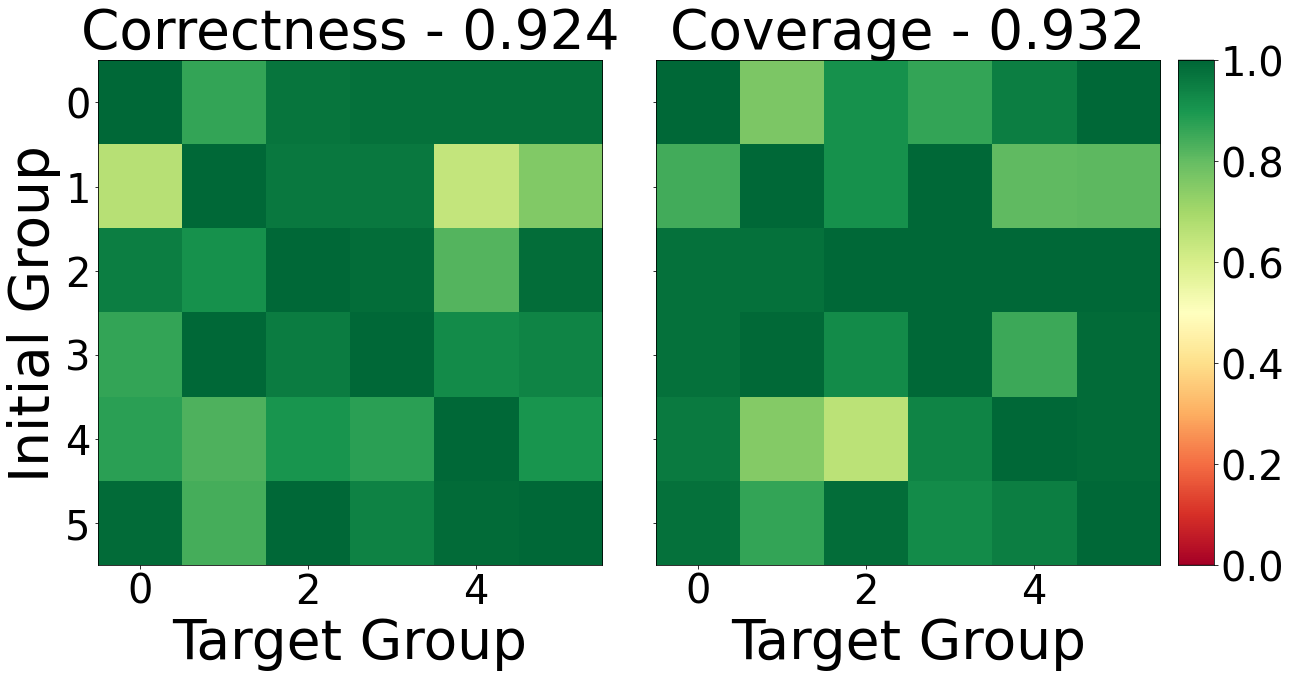

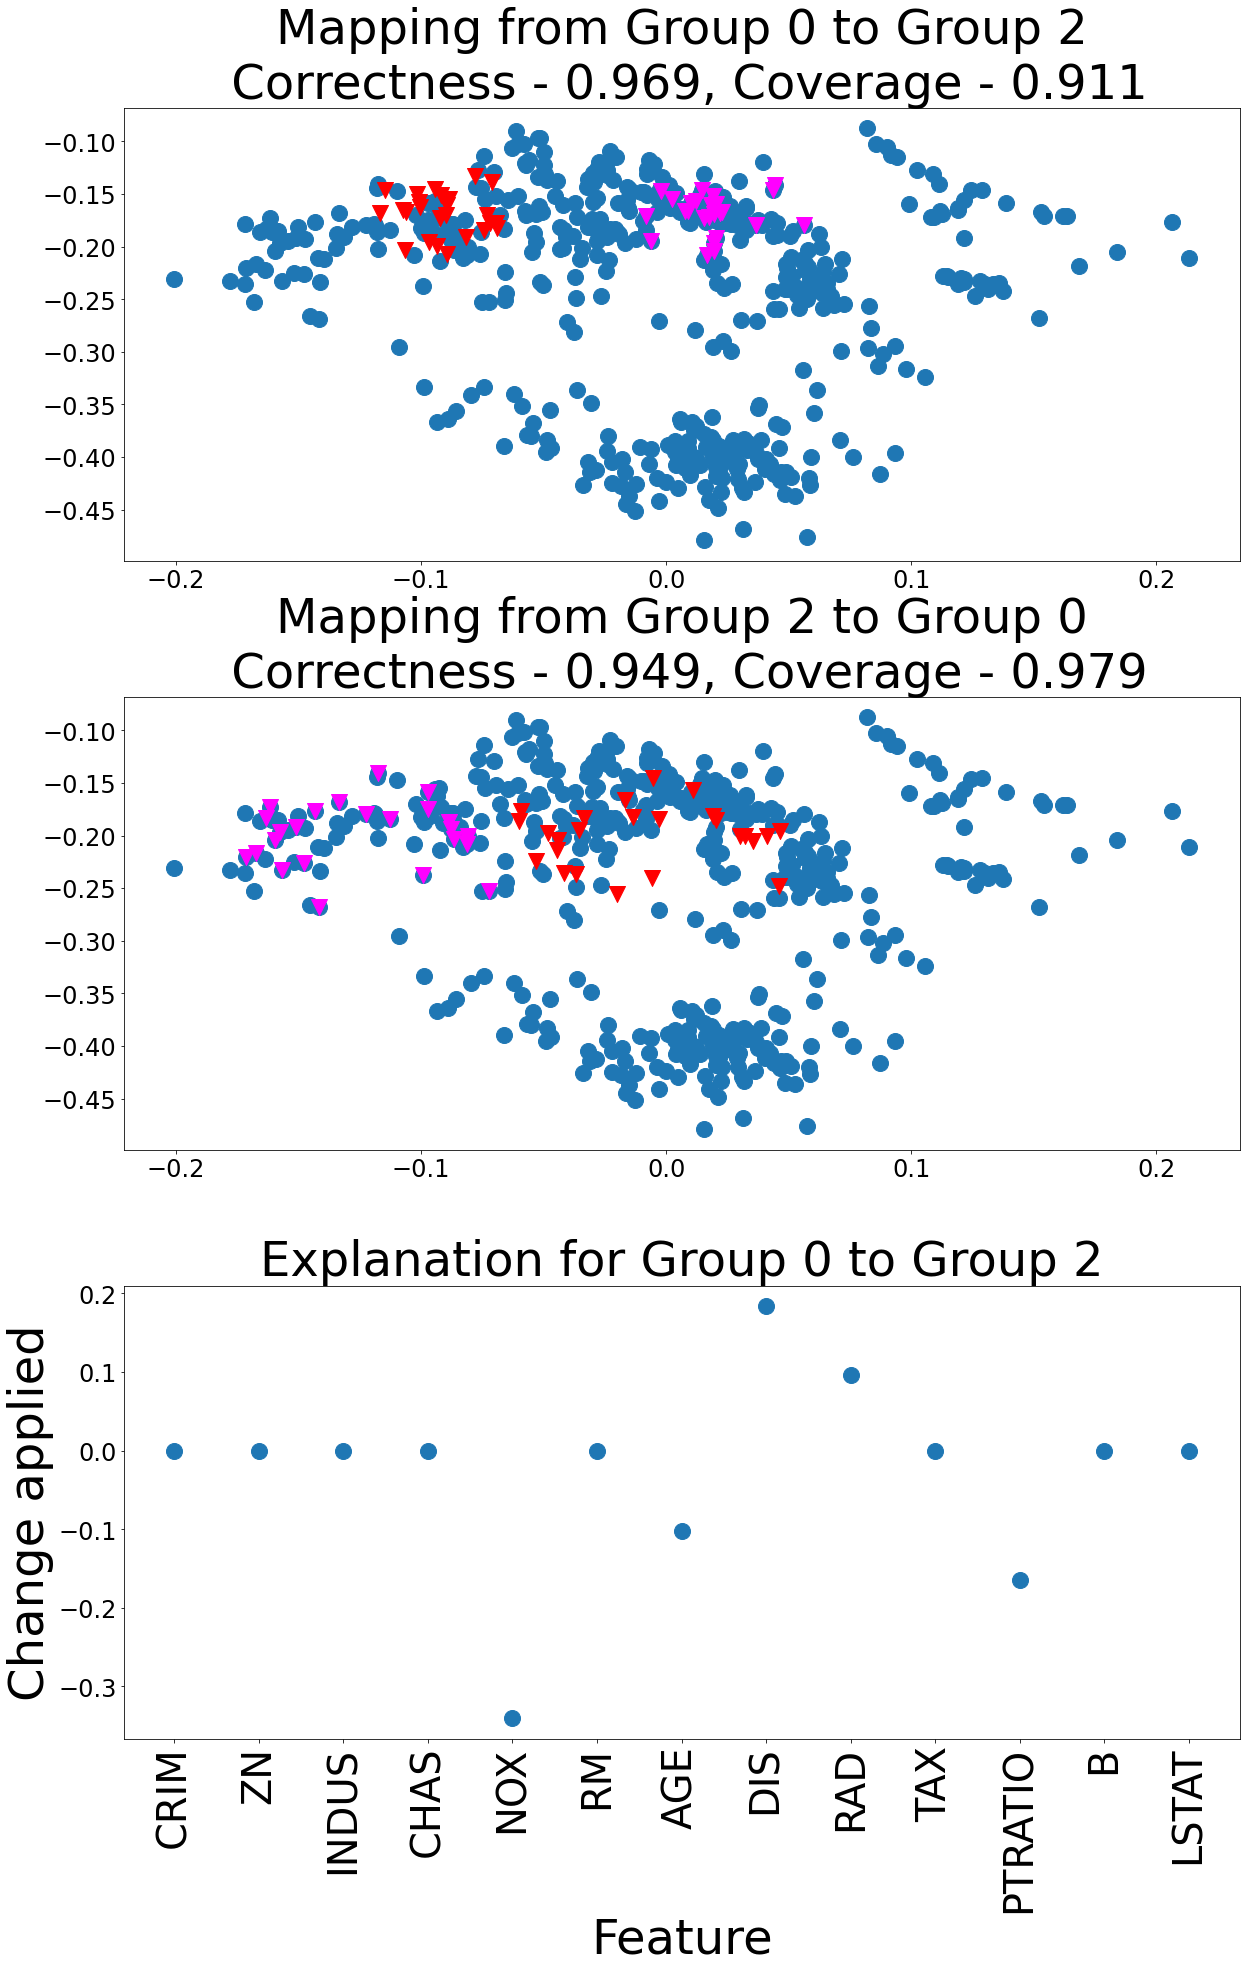

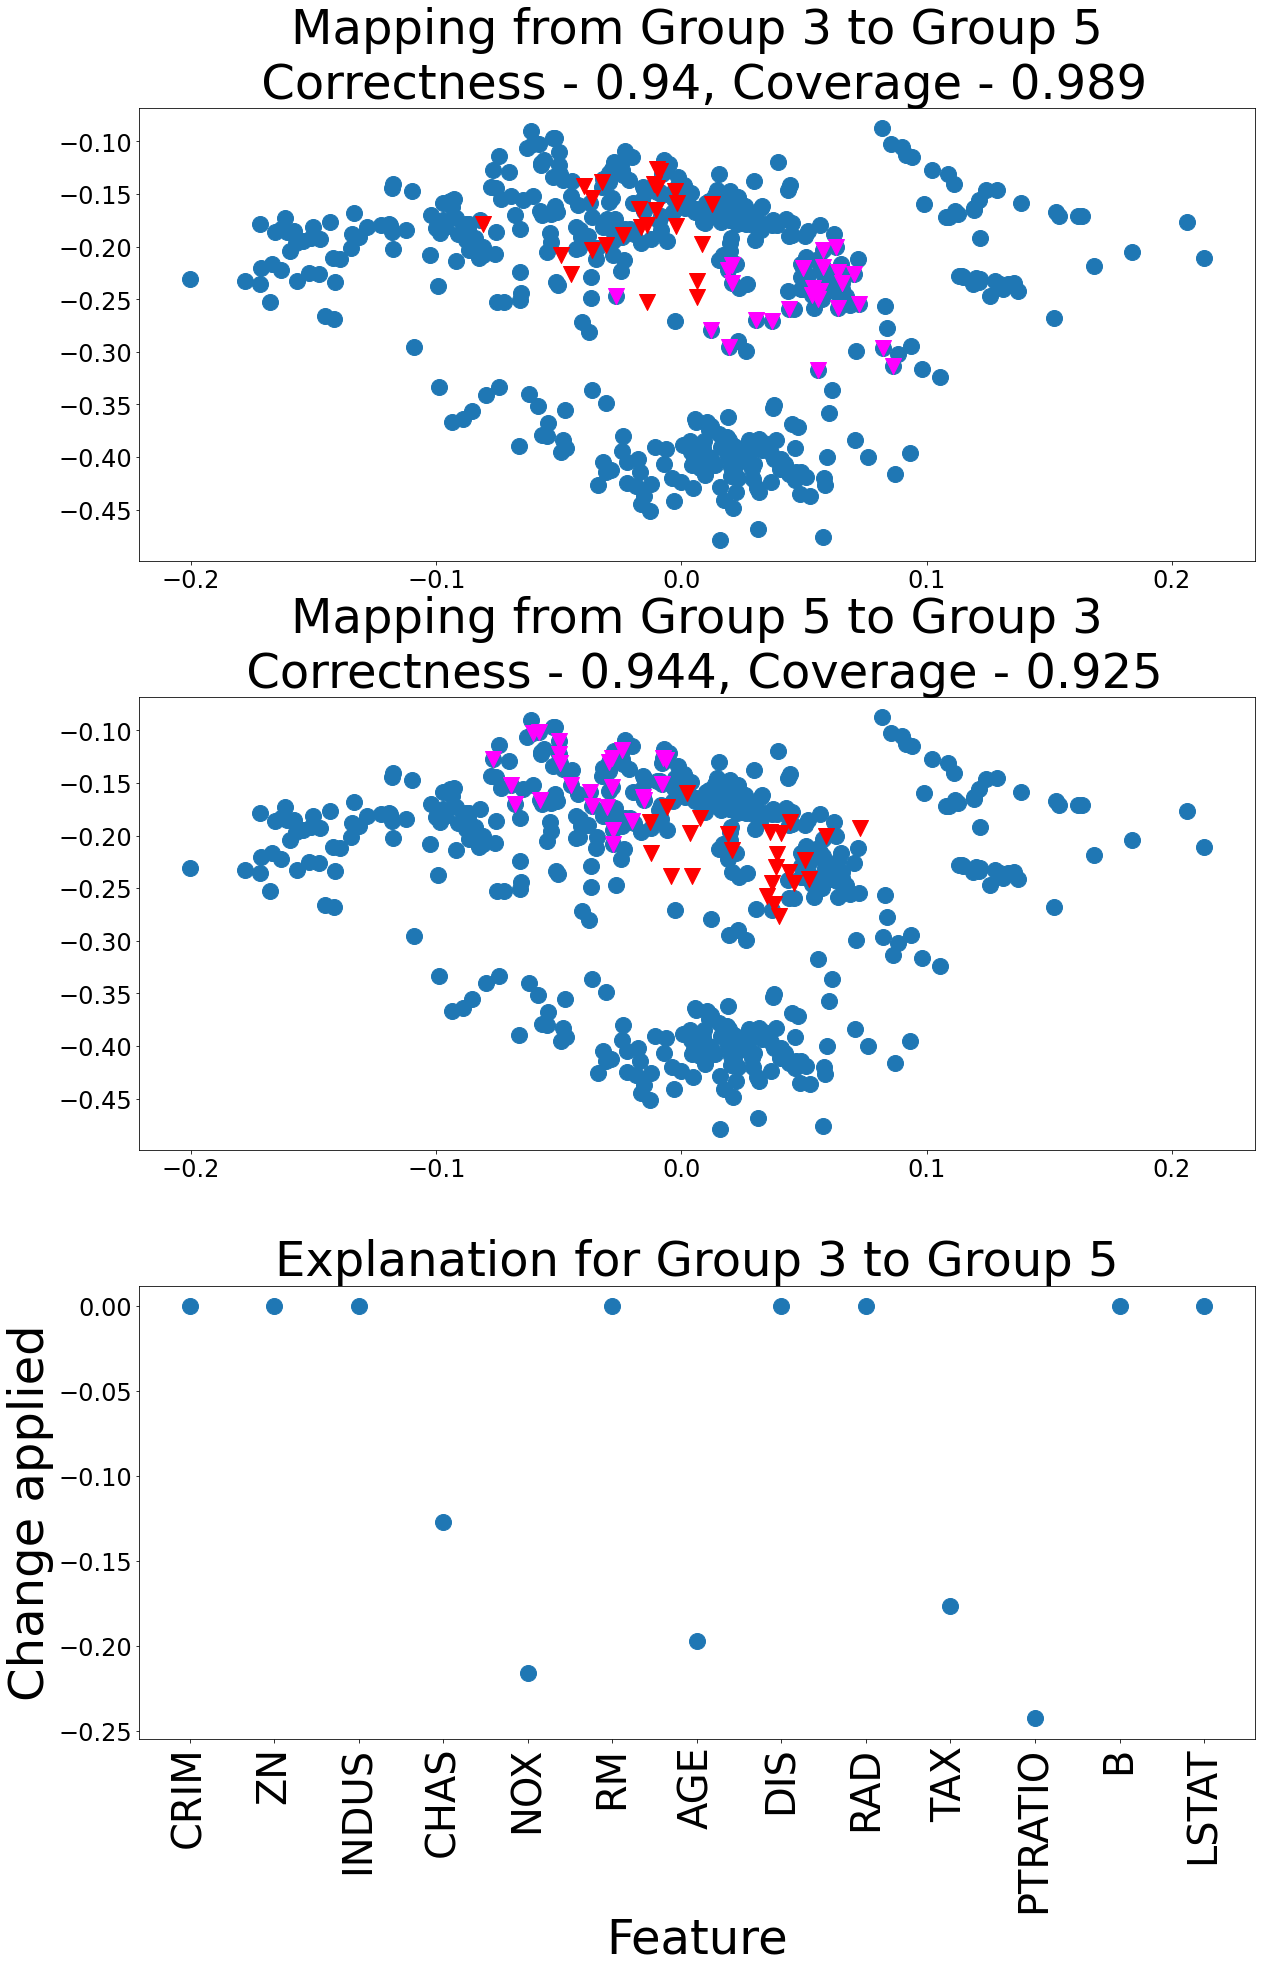

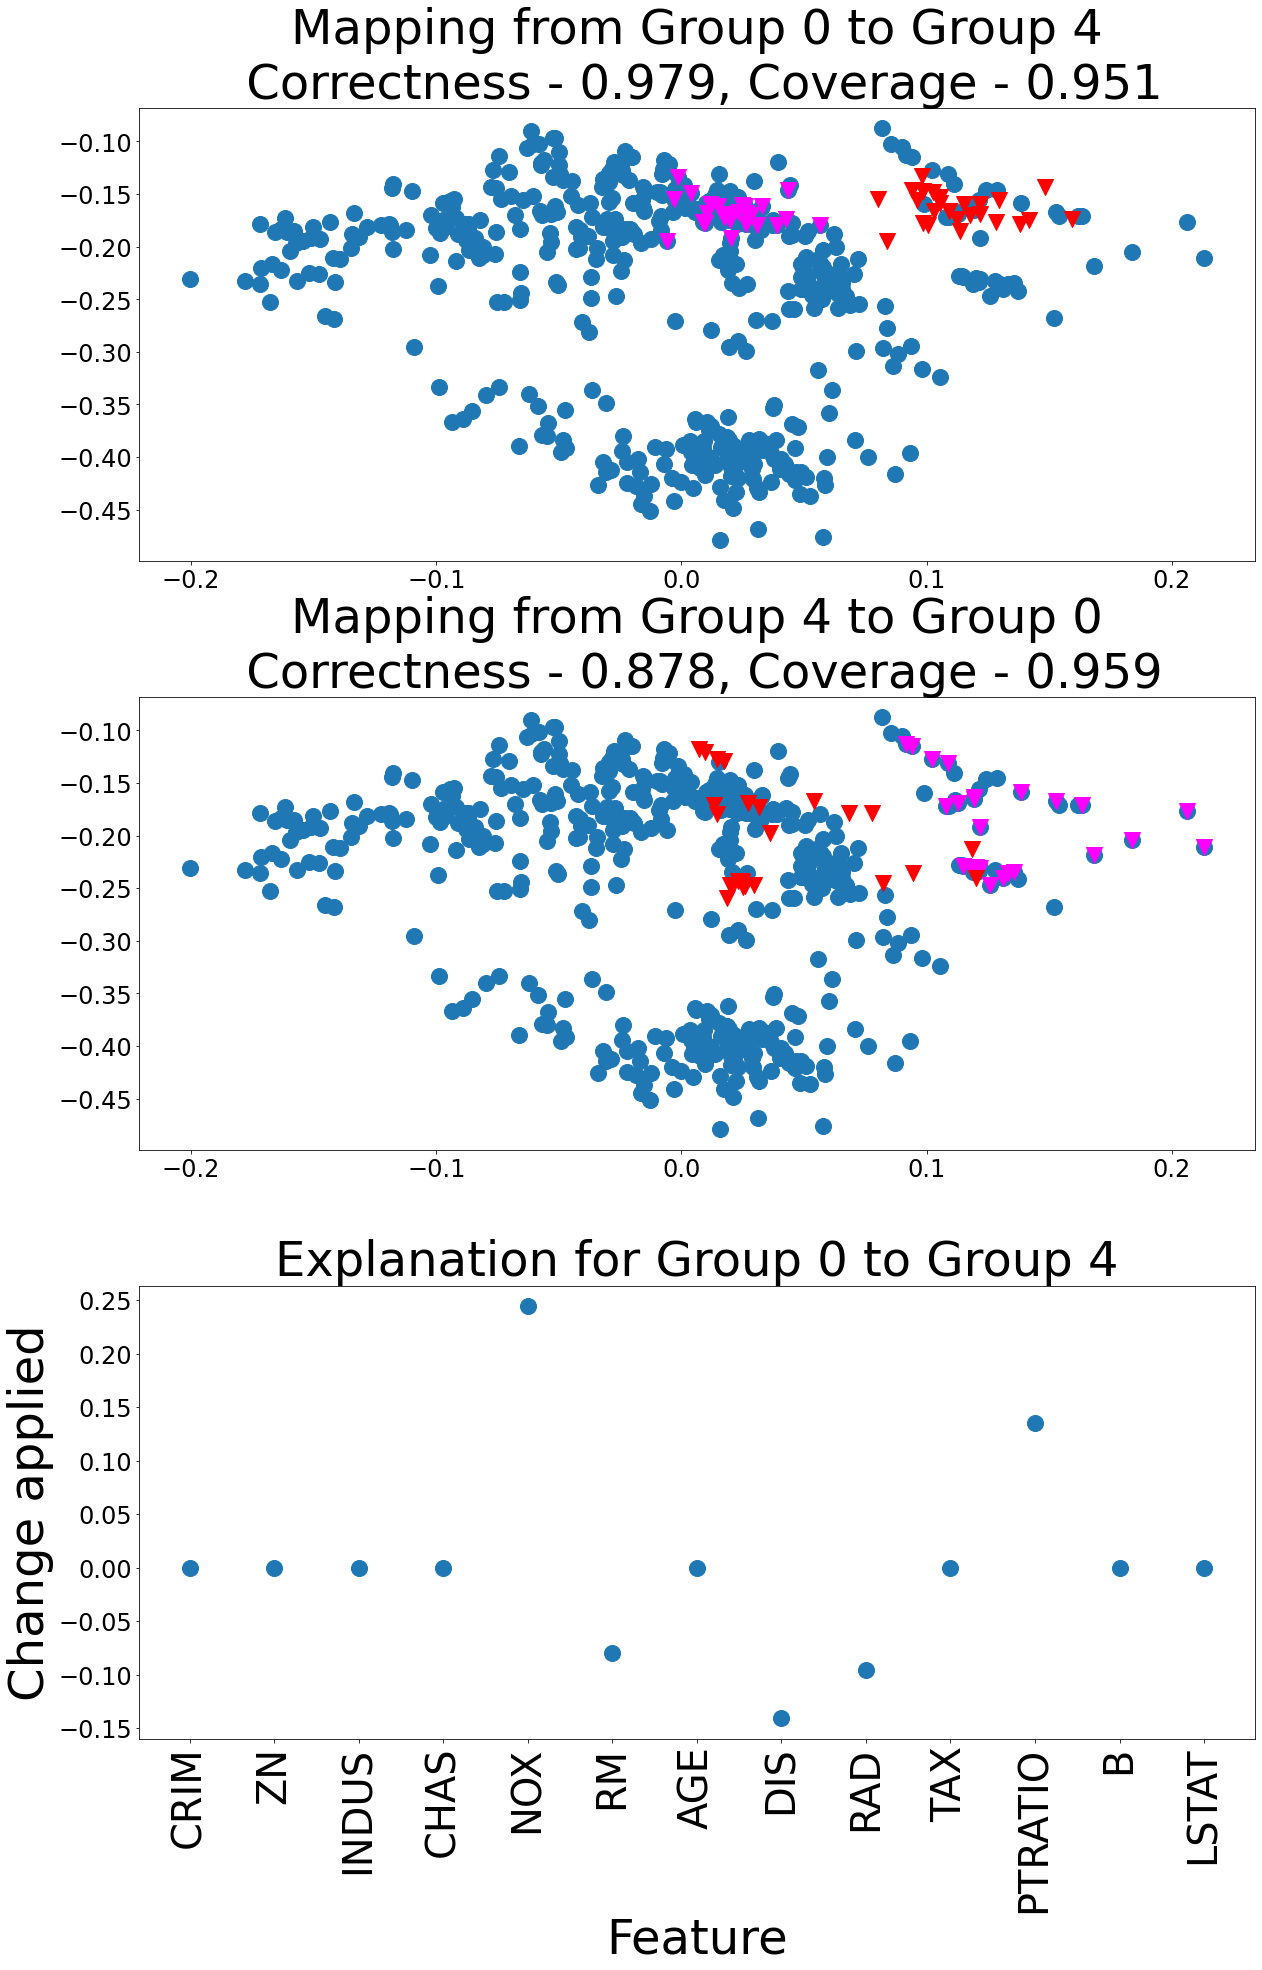

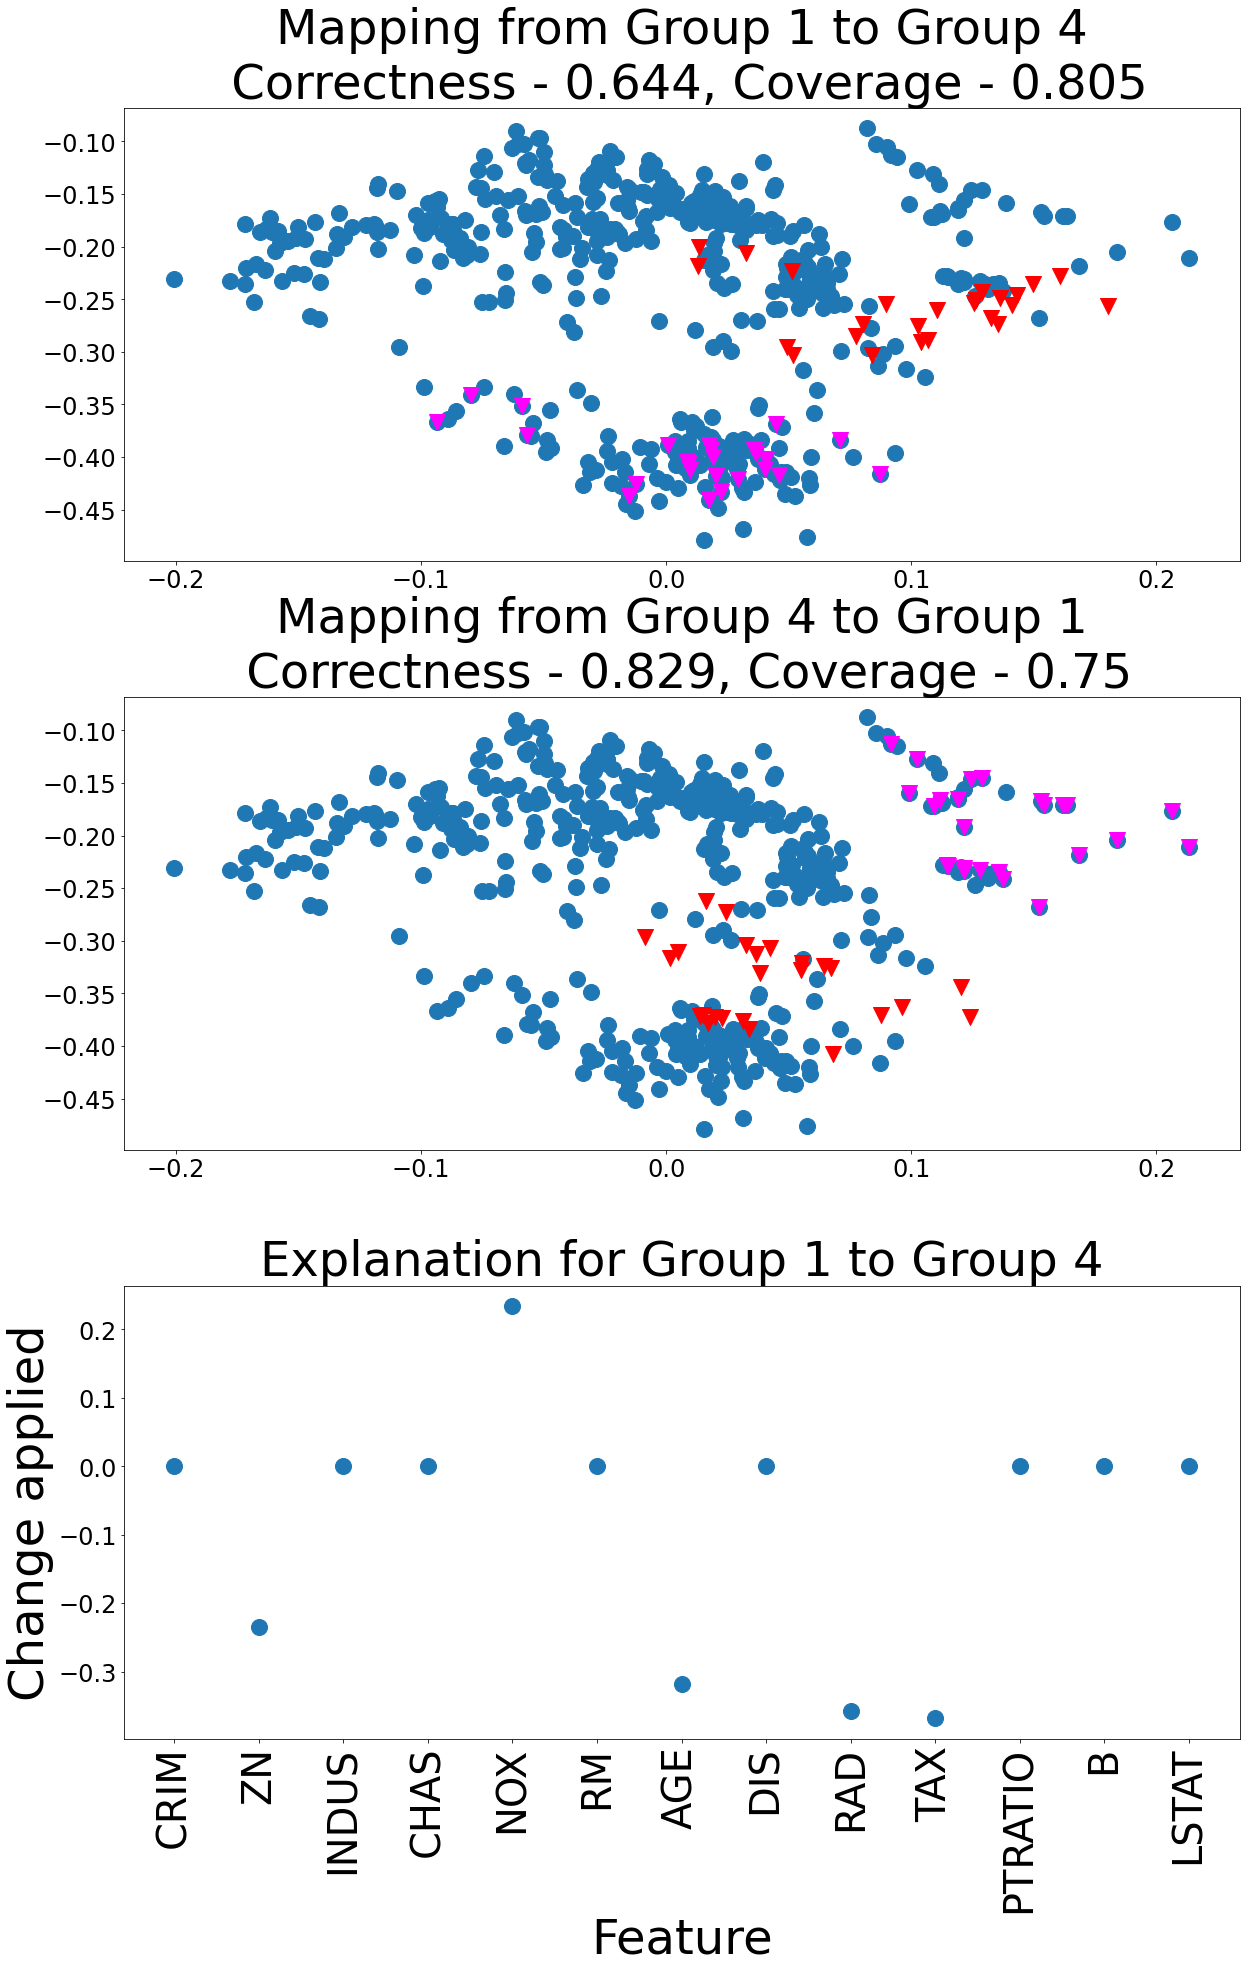

In [15]:
# Evaluate the explanations
# from eldr.plotter.myplot import *
k = 5
epsilon = 0.05
import torch
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

deltas_ = np.load("deltas" + str(k) + ".npy")
np.set_printoptions(suppress=True)
print(deltas_)

a, b = Explainer.metrics(torch.tensor(x), indices, torch.from_numpy(deltas_), epsilon, k = k)

plot_metrics(a, b, name = "housing-metrics.png")

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 0, 2, k = k, num_points = 25, name = "housing-0to2.png", feature_names = feature_names)

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 3, 5, k = k,  num_points = 25, name = "housing-3to5.png", feature_names = feature_names)

plot_explanation(model, x, data_rep, indices, deltas_, a, b, 0, 4, k = k,  num_points = 25, name = "housing-0to4.png", feature_names = feature_names)
plot_explanation(model, x, data_rep, indices, deltas_, a, b, 1, 4, k = k,  num_points = 25, name = "housing-1to4.png", feature_names = feature_names)